# Initial setup

This analysis using ema is based on the work of Enayat A. Moallemi created on 22 May 2018 at the Fraunhofer ISI, Karlsruhe. In that instance, the analysis was done for the MATISSE model.

In [1]:
"""
Based on Enayat A. Moallemi version from May 2018

edited by Angela M. Rojas A. <angelara@student.unimelb.edu.au>

Created on February 2020

"""

import sys
import os

sys.path.append(r'C:\Users\angel\Documents\GitHub\gr4sp\experiments\EMAworkbench')

sys.path.append(r'C:\Users\angel\Documents\GitHub\gr4sp\experiments')

#from ema_workbench.analysis.plotting_util import BOXPLOT, KDE, VIOLIN
from ema_workbench.analysis.plotting import envelopes
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import matplotlib.cm as cm
import seaborn as sns
from ema_workbench.analysis import prim
#import pareto
import os
import glob
import numpy as np
import pandas as pd
import os
import glob



C:\Users\angel\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\angel\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning:

can't resolve package from __spec__ or __package__, falling back on __name__ and __path__



## Load the results

In [72]:
from ema_workbench import load_results

#results = load_results(r'C:\Users\angel\Documents\GitHub\gr4sp\experiments\data\gr4sp_2020-Feb-20-years.tar.gz')
#results = load_results(r'C:\Users\angel\Documents\GitHub\gr4sp\experiments\data\gr4sp_2020-Feb-07_EET_allV3.tar.gz')
#results = load_results(r'C:\Users\angel\Documents\GitHub\gr4sp\experiments\data\gr4sp_2020-Feb-25-LHS.tar.gz')
results = load_results(r'C:/Users/angel/Documents/GitHub/gr4sp/experiments/simulationData/gr4sp_2020-Aug-22-SOBOL.tar.gz')

experiments, outcomes = results

[MainProcess/INFO] results loaded succesfully from C:\Users\angel\Documents\GitHub\gr4sp\experiments\simulationData\gr4sp_2020-Aug-22-SOBOL.tar.gz


In [73]:
experiments.describe()

annualCpi  annualInflation  capacityFactorChangeBrownCoal  \
count  130000.000000    130000.000000                  130000.000000   
mean        2.999400         2.998800                       0.000400   
std         1.414714         1.415067                       6.057316   
min         1.000000         1.000000                     -10.000000   
25%         2.000000         2.000000                      -5.000000   
50%         3.000000         3.000000                       0.000000   
75%         4.000000         4.000000                       5.000000   
max         5.000000         5.000000                      10.000000   

       capacityFactorChangeOcgt  capacityFactorChangeWater    consumption  \
count             130000.000000              130000.000000  130000.000000   
mean                  -0.003400                   0.003000       2.000200   
std                    6.057893                   6.057959       1.415279   
min                  -10.000000                 -10.000000       0.000000   
25%                   -5.000000                  -5.000000       1.000000   
50%                    0.000000                   0.000000       2.000000   
75%                    5.000000                   5.000000       3.000000   
max                   10.000000                  10.000000       4.000000   

       domesticConsumptionPercentage  energyEfficiency  \
count                   130000.00000     130000.000000   
mean                        27.49920          0.999600   
std                          4.60979          0.816581   
min                         20.00000          0.000000   
25%                         23.75000          0.000000   
50%                         27.50000          1.000000   
75%                         31.25000          2.000000   
max                         35.00000          2.000000   

       generationRolloutPeriod  generatorRetirement  ...  \
count             130000.00000        130000.000000  ...   
mean                   5.00060            -0.001400  ...   
std                    3.16074             3.161689  ...   
min                    0.00000            -5.000000  ...   
25%                    2.00000            -3.000000  ...   
50%                    5.00000             0.000000  ...   
75%                    8.00000             3.000000  ...   
max                   10.00000             5.000000  ...   

       priceChangePercentageOcgt  priceChangePercentageWater  \
count              130000.000000                 130000.0000   
mean                   -0.006400                     -0.0136   
std                    17.606372                     17.6068   
min                   -30.000000                    -30.0000   
25%                   -15.000000                    -15.0000   
50%                     0.000000                      0.0000   
75%                    15.000000                     15.0000   
max                    30.000000                     30.0000   

       priceChangePercentageWind      rooftopPV  scheduleMinCapMarketGen  \
count              130000.000000  130000.000000            130000.000000   
mean                   -0.008000       6.000400                20.004200   
std                    17.606474       0.816581                 6.057728   
min                   -30.000000       5.000000                10.000000   
25%                   -15.000000       5.000000                15.000000   
50%                     0.000000       6.000000                20.000000   
75%                    15.000000       7.000000                25.000000   
max                    30.000000       7.000000                30.000000   

       semiScheduleGenSpotMarket  semiScheduleMinCapMarketGen   solarUptake  \
count              130000.000000                 130000.00000  130000.00000   
mean                    9.000200                     15.04673       1.99940   
std                     0.816459                      8.63168       1.41429   
min                     8.

## Load BAU

In [74]:
bau_scenario_id = max(experiments['scenario']) + 1

new_row = pd.DataFrame({'annualCpi': 0.03, 'annualInflation': 0.03, 'capacityFactorChangeBrownCoal': 0,
       'capacityFactorChangeWater': 0,'capacityFactorChangeOcgt': 0, 'consumption': 0, 'energyEfficiency': 0,
       'generationRolloutPeriod':1, 'generatorRetirement':0,
       'includePublicallyAnnouncedGen':0, 'learningCurve':0.05,
       'nonScheduleGenSpotMarket': 10, 'nonScheduleMinCapMarketGen':0.1,
       'priceChangePercentageBrownCoal':0, 'priceChangePercentageOcgt':0,
       'priceChangePercentageWater':0, 'priceChangePercentageWind':0, 'rooftopPV':7,
       'domesticConsumptionPercentage':0,
       'scheduleMinCapMarketGen':30, 'semiScheduleGenSpotMarket':8,
       'semiScheduleMinCapMarketGen':30, 'solarUptake':0,
       'technologicalImprovement':0.01, 'wholesaleTariffContribution':28.37, 'scenario': bau_scenario_id,
       'policy': "None", 'model': 'Gr4sp'}, index =[0]) 
# simply concatenate both dataframes 
experiments = pd.concat([experiments,new_row],sort=True).reset_index(drop = True) 

# rename none in policy column into constant value 0. PRIM fails otherwise.
if "None" in exp["policy"].unique():
    experiments["policy"] = experiments["policy"].replace("None",int(0))

C:\Users\angel\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



In [75]:
bau_results_df = pd.read_csv(r'C:/Users/angel/Documents/GitHub/gr4sp/experiments/simulationData/VICSimDataYearSummary_seed_1598338715914.csv')

In [76]:
seed_bau = bau_scenario_id + 1
outcomes['TIMEYear'] = np.append(outcomes['TIMEYear'],
                                          [bau_results_df['Time (Year)'].values], axis=0)
outcomes['consumptionYear'] = np.append(outcomes['consumptionYear'],
                                                 [bau_results_df['Consumption (KWh) per household'].values], axis=0)
outcomes['tariffsYear'] = np.append(outcomes['tariffsYear'],
                                                 [bau_results_df[' Avg Tariff (c/KWh) per household'].values], axis=0)
outcomes['wholesalePriceYear'] = np.append(outcomes['wholesalePriceYear'],
                                                 [bau_results_df['Wholesale ($/MWh)'].values], axis=0)
outcomes['GHGYear'] = np.append(outcomes['GHGYear'],
                                                 [bau_results_df['GHG Emissions (tCO2-e) per household'].values], axis=0)
outcomes['numConsumersYear'] = np.append(outcomes['numConsumersYear'],
                                                 [bau_results_df['Number of Domestic Consumers (households)'].values], axis=0)
outcomes['primarySpotProductionYear'] = np.append(outcomes['primarySpotProductionYear'],
                                                 [bau_results_df['System Production Primary Spot'].values], axis=0)
outcomes['secondarySpotProductionYear'] = np.append(outcomes['secondarySpotProductionYear'],
                                                 [bau_results_df['System Production Secondary Spot'].values], axis=0)
outcomes['offSpotProductionYear'] = np.append(outcomes['offSpotProductionYear'],
                                                 [bau_results_df['System Production Off Spot'].values], axis=0)
outcomes['renewableContributionYear'] = np.append(outcomes['renewableContributionYear'],
                                                 [bau_results_df['Percentage Renewable Production'].values], axis=0)
outcomes['rooftopPVProductionYear'] = np.append(outcomes['rooftopPVProductionYear'],
                                                 [bau_results_df['System Production Rooftop PV'].values], axis=0)
outcomes['coalProductionYear'] = np.append(outcomes['coalProductionYear'],
                                                 [bau_results_df['System Production Coal'].values], axis=0)
outcomes['windProductionYear'] = np.append(outcomes['windProductionYear'],
                                                 [bau_results_df['System Production Wind'].values], axis=0)
outcomes['gasProductionYear'] = np.append(outcomes['gasProductionYear'],
                                                 [bau_results_df['System Production Gas'].values], axis=0)
outcomes['solarProductionYear'] = np.append(outcomes['solarProductionYear'],
                                                 [bau_results_df['System Production Solar'].values], axis=0)   
outcomes['waterProductionYear'] = np.append(outcomes['waterProductionYear'],
                                                 [bau_results_df['System Production Water'].values], axis=0)
outcomes['BatteryProductionYear'] = np.append(outcomes['BatteryProductionYear'],
                                                 [bau_results_df['System Production Battery'].values], axis=0)
outcomes['numActorsYear'] = np.append(outcomes['numActorsYear'],
                                                 [bau_results_df['Number of Active Actors'].values], axis=0)
outcomes['primaryUnmetDemandMwh'] = np.append(outcomes['primaryUnmetDemandMwh'],
                                                 [bau_results_df['Primary Total Unmet Demand (MWh)'].values], axis=0)
outcomes['primaryUnmetDemandHours'] = np.append(outcomes['primaryUnmetDemandHours'],
                                                 [bau_results_df['Primary Total Unmet Demand (Hours)'].values], axis=0)
outcomes['primaryUnmetDemandDays'] = np.append(outcomes['primaryUnmetDemandDays'],
                                                 [bau_results_df['Primary Total Unmet Demand (Days)'].values], axis=0)
outcomes['primaryMaxUnmetDemandMwhPerHour'] = np.append(outcomes['primaryMaxUnmetDemandMwhPerHour'],
                                                 [bau_results_df['Primary Max Unmet Demand Per Hour (MWh)'].values], axis=0)
outcomes['secondaryUnmetDemandMwh'] = np.append(outcomes['secondaryUnmetDemandMwh'],
                                                 [bau_results_df['Secondary Total Unmet Demand (MWh)'].values], axis=0)
outcomes['secondaryUnmetDemandHours'] = np.append(outcomes['secondaryUnmetDemandHours'],
                                                 [bau_results_df['Secondary Total Unmet Demand (Hours)'].values], axis=0)
outcomes['secondaryUnmetDemandDays'] = np.append(outcomes['secondaryUnmetDemandDays'],
                                                 [bau_results_df['Secondary Total Unmet Demand (Days)'].values], axis=0)
outcomes['secondaryMaxUnmetDemandMwhPerHour'] = np.append(outcomes['secondaryMaxUnmetDemandMwhPerHour'],
                                                 [bau_results_df['Secondary Max Unmet Demand Per Hour (MWh)'].values], axis=0)
                                          
outcomes['seedExperimentCsv'] = np.append(outcomes['seedExperimentCsv'], [seed_bau], axis=0)


## General parameters

In [77]:
outcomes_to_show = ['consumptionYear', 'tariffsYear', 'wholesalePriceYear', 'GHGYear', 
                    'numConsumersYear', 'primarySpotProductionYear', 'secondarySpotProductionYear', 
                    'offSpotProductionYear', 'renewableContributionYear', 'rooftopPVProductionYear', 
                    'coalProductionYear', 'waterProductionYear', 'windProductionYear', 'gasProductionYear', 
                    'solarProductionYear', 'BatteryProductionYear', 'numActorsYear', 'primaryUnmetDemandMwh', 
                    'primaryUnmetDemandHours', 'primaryUnmetDemandDays', 'primaryMaxUnmetDemandMwhPerHour', 
                    'secondaryUnmetDemandMwh', 'secondaryUnmetDemandHours', 'secondaryUnmetDemandDays', 
                    'secondaryMaxUnmetDemandMwhPerHour']

# 23 levers/uncertainties selected after EET (last test July 2020)
# 25 uncertainties selected aftet EET including change on domestic demand and unmet demand output (August 2020)
uncertainties = experiments.columns[:-3]

#from startYear
startYear = 2000
startYearShift = (startYear - 1998)

time = outcomes['TIMEYear'][0, startYearShift:]

points_of_interest = [*range(2000,2051,10)] 
points_of_interest = [ x - startYear for x in points_of_interest]

# Filter outcomes taking into account the startYear, and removing Seed Experiment info. 
# Seed it is useful if I want to retrieve more info from the csv files, or redo the experiments with the
# simulation parameters
outcomes_filtered = {k:v[:, startYearShift:] for k,v in outcomes.items() if k != 'seedExperimentCsv'}


## Aggregate Household data

GHG emissions and Consumption per household type converted to total sector


In [78]:
ooi = 'GHGYear'
data_GHG_household = outcomes_filtered[ooi]

In [79]:
""" Converts household data in tCO2e into total residential data in MtCO2e"""
data_GHG_residential = (data_GHG_household * outcomes_filtered['numConsumersYear']) / 1000000.0

""" Applies scaling factor used in simulation, so that data represents total emissions, not only residential (30%)"""
data_GHG_total = data_GHG_residential / 0.3

"""Overwrite GHG with the data of interest"""
outcomes_filtered[ooi] = data_GHG_total

In [80]:
ooi = 'consumptionYear'
data_consumption_household = outcomes_filtered[ooi]

In [81]:
""" Converts household data in KWh into total residential data in MWh"""
data_consumption_residential = (data_consumption_household * outcomes_filtered['numConsumersYear']) / 1000.0

""" Applies scaling factor used in simulation, so that data represents total consumption, not only residential"""
data_consumption_total = data_consumption_residential / 0.3

"""Overwrite Consumption with the data of interest"""
outcomes_filtered[ooi] = data_consumption_total

# Target functions

In [82]:
def target_always_after(outcomes,ooi,targetYear,targetVal,above):
    data = outcomes[ooi]
    num_exp = len(data)
    achieved = np.zeros(num_exp, dtype=bool)

    for i in range(num_exp):
        achieved[i] = False
        exp_run = data[i]
        for j in range( len(exp_run) ):
            if (startYear + j) >= targetYear:
                if above is True:
                    achieved[i] = exp_run[j] >= targetVal
                else:
                    achieved[i] = exp_run[j] < targetVal
                    
                #If the target is not achieved after the TargetYear, then mark experiment as False
                if achieved[i] == False:
                    break
    return achieved

def target_at_year(outcomes,ooi,targetYear,targetVal,above):
    data = outcomes[ooi]
    num_exp = len(data)
    achieved = np.zeros(num_exp, dtype=bool)

    for i in range(num_exp):
        achieved[i] = False
        exp_run = data[i]
        
        idx = targetYear - startYear
        if above is True:
            achieved[i] = exp_run[idx] >= targetVal
        else:
            achieved[i] = exp_run[idx] < targetVal                        
                
    return achieved

# Scenario discovery

## GHG emissions


Truncate experiments and outcomes for a selected policy and a selected outcome over mean in time series

In [83]:
#Subset of levers/uncertainties
#selected_levers = list(['rooftopPV', 'annualCpi','capacityFactorChangeBrownCoal','capacityFactorChangeWater','semiScheduleMinCapMarketGen'])    
selected_uncertainties = uncertainties

ooi = 'GHGYear'

data = outcomes_filtered[ooi]


num_exp = len(data)
out_avg_ooi = np.zeros(num_exp)

for i in range(num_exp):
    out_avg_ooi[i] = data[i].mean()

exp = pd.DataFrame(experiments)

exp = exp.loc[ :, selected_uncertainties] 

The following section uses PRIM, feature scoring and dimensional stacking to find the cases that represent futures in three main groups: Low Carbon, Just Transition and Sustainable Transition.

It uses targets (e.g. cases for which emissions are the lowest at year x) to filter out the cases and find out the corresponding input variables and ranges for the cases to happen.

The first case is on GHG emissions. To find out the targets for exploration, first let's analyse the envelope diagram (see below) showing how the transition may unfold:

### Open Exploration: Visual Analysis

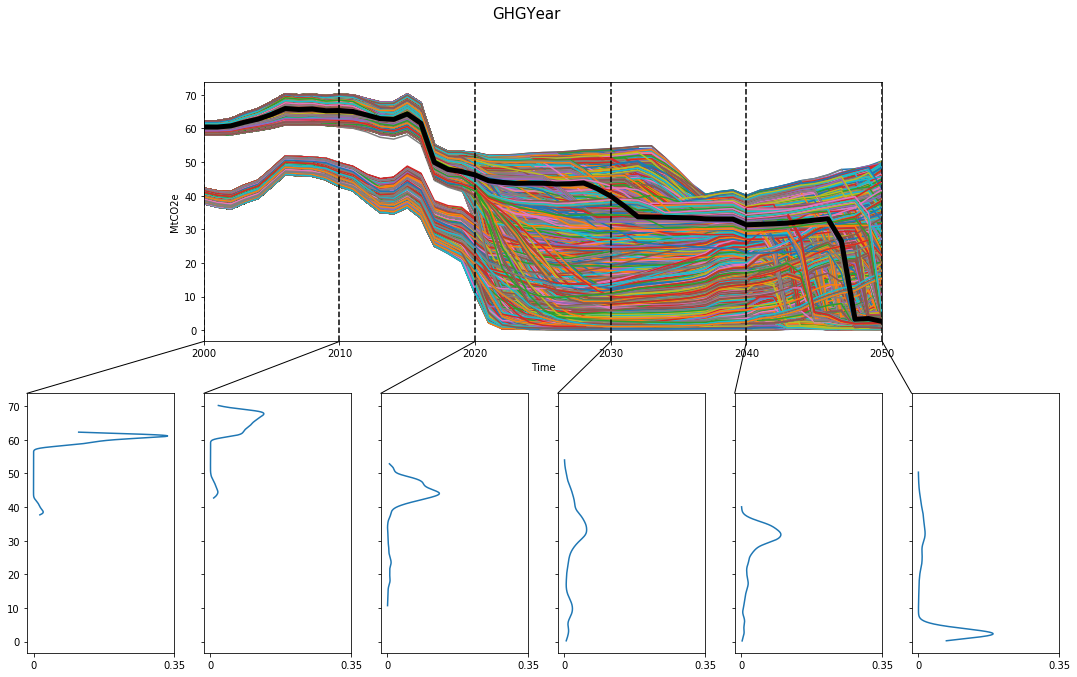

In [83]:
from EMAworkbench.ema_workbench.analysis.plotting import multiple_densities, PlotType
from EMAworkbench.ema_workbench.analysis.plotting_util import Density 

fig, ax_env = multiple_densities(experiments, outcomes_filtered, outcomes_to_show = ooi,
                                 points_in_time=points_of_interest, density = Density.KDE, grouping_specifiers=None, 
                                 titles={ooi}, ylabels={ooi: "MtCO2e"}, legend=True,
                                 fill=False, plot_type=PlotType.ENV_LIN)

#Change x labels to years
ax_env[ooi]['main plot'].set_xticklabels(time[range(0,len(time),10)])

#Add BAU in the plot with a gray wide line
ax_env[ooi]['main plot'].plot(outcomes_filtered[ooi][-1], 'k-',linewidth=5 )

## Show labels
# labels = ax_env['F']['main plot'].get_xticklabels()
# for l in labels:
#     print (l.get_text)

fig[0].suptitle("{}".format(ooi), fontsize=15)
fig[0].set_size_inches(18.5, 10.5)

plt.savefig('{}/fig{}.png'.format(r'C:\\Users\\angel\\Documents\\GitHub\\gr4sp\\experiments\\notebookGr4sp\\outputs\\figs', 'envelope_line_density_%s'%(ooi)),
                dpi=300, bbox_inches='tight')
    

Densities (PDF): {'37.7 to 39.9': '0.025', '39.9 to 42.2': '0.012', '57.8 to 60.0': '0.121', '60.0 to 62.3': '0.290'}
% in Bin: {'37.7 to 39.9': '5.5%', '39.9 to 42.2': '2.6%', '42.2 to 44.4': '0.2%', '44.4 to 46.6': '0.0%', '46.6 to 48.9': '0.0%', '48.9 to 51.1': '0.0%', '51.1 to 53.3': '0.0%', '53.3 to 55.6': '0.0%', '55.6 to 57.8': '0.0%', '57.8 to 60.0': '27.0%', '60.0 to 62.3': '64.7%'}

Densities (PDF): {'42.7 to 45.2': '0.018', '45.2 to 47.7': '0.013', '47.7 to 50.2': '0.003', '60.2 to 62.7': '0.061', '62.7 to 65.2': '0.097', '65.2 to 67.7': '0.121', '67.7 to 70.2': '0.088'}
% in Bin: {'42.7 to 45.2': '4.4%', '45.2 to 47.7': '3.1%', '47.7 to 50.2': '0.7%', '50.2 to 52.7': '0.0%', '52.7 to 55.2': '0.0%', '55.2 to 57.7': '0.0%', '57.7 to 60.2': '0.0%', '60.2 to 62.7': '15.2%', '62.7 to 65.2': '24.3%', '65.2 to 67.7': '30.3%', '67.7 to 70.2': '21.9%'}

Densities (PDF): {'14.5 to 18.4': '0.004', '18.4 to 22.2': '0.006', '22.2 to 26.0': '0.008', '26.0 to 29.9': '0.003', '29.9 to 33.7

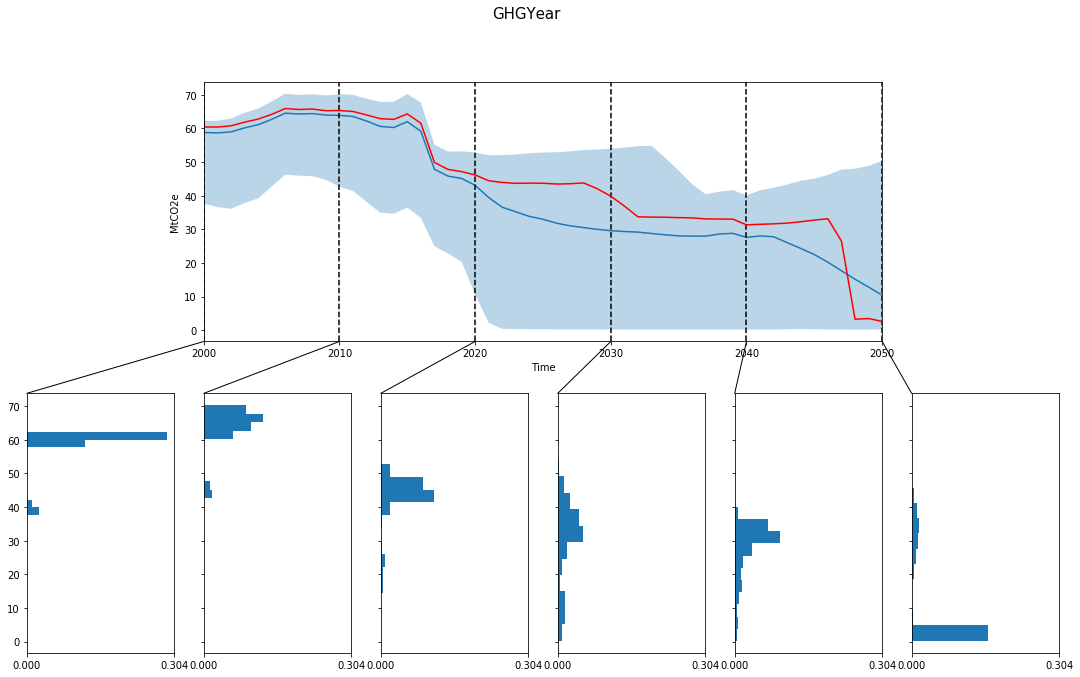

In [15]:
from EMAworkbench.ema_workbench.analysis.plotting import multiple_densities, PlotType
from EMAworkbench.ema_workbench.analysis.plotting_util import Density 

fig, ax_env = multiple_densities(experiments, outcomes_filtered, outcomes_to_show = ooi,
                                 points_in_time=points_of_interest, density = Density.HIST, grouping_specifiers=None,
                                 titles={ooi}, ylabels={ooi: "MtCO2e"}, legend=True,
                                 fill=True, plot_type=PlotType.ENVELOPE)

#Change x labels to years
ax_env[ooi]['main plot'].set_xticklabels(time[range(0,len(time),10)])

#Add BAU in the plot with a gray red line
ax_env[ooi]['main plot'].plot(outcomes_filtered[ooi][-1], 'r-')

## Show labels
# labels = ax_env['F']['main plot'].get_xticklabels()
# for l in labels:
#     print (l.get_text)

fig[0].suptitle("{}".format(ooi), fontsize=15)
fig[0].set_size_inches(18.5, 10.5)

plt.savefig('{}/fig{}.png'.format(r'C:\\Users\\angel\\Documents\\GitHub\\gr4sp\\experiments\\notebookGr4sp\\outputs\\figs', '_envelope_density_%s'%(ooi)),
                dpi=300, bbox_inches='tight')


#### Filter bottom cluster below BAU in the region 2000 - 2020

In [80]:
filter_below = target_at_year( outcomes_filtered, ooi, 2000, 50, True) #True means above target
#outcomes_filtered = {k:v[:, startYearShift:] for k,v in outcomes.items() if k != 'seedExperimentCsv'}

outcomes_bau_cluster = {k:v[filter_below, :] for k,v in outcomes_filtered.items()}

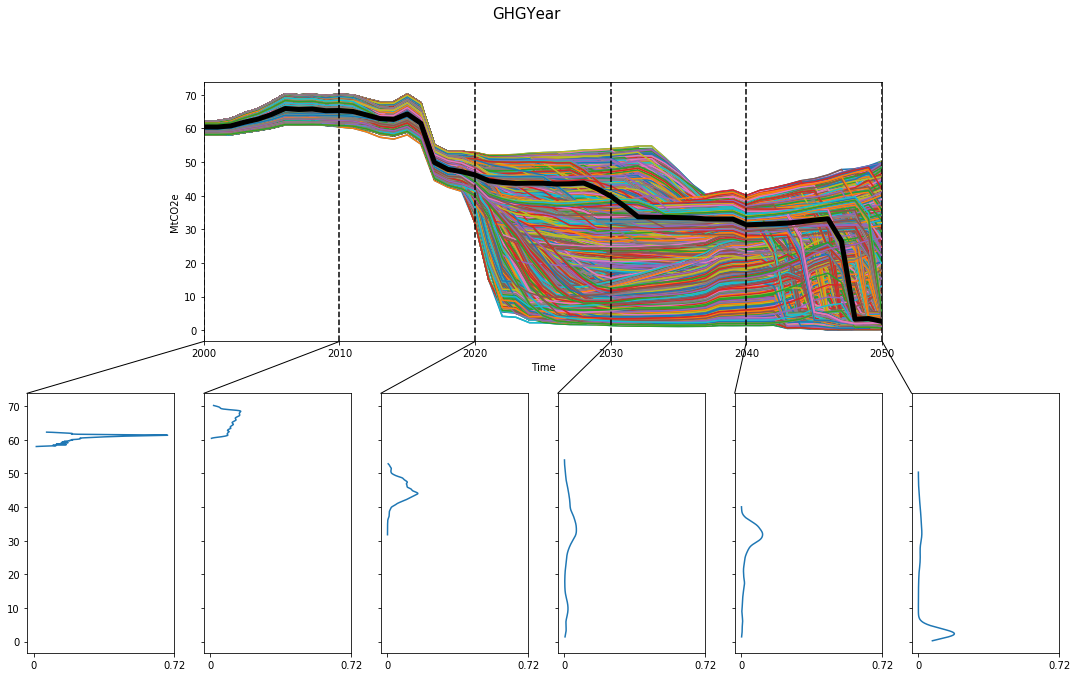

In [81]:
from EMAworkbench.ema_workbench.analysis.plotting import multiple_densities, PlotType
from EMAworkbench.ema_workbench.analysis.plotting_util import Density 

fig, ax_env = multiple_densities(experiments, outcomes_bau_cluster, outcomes_to_show = ooi,
                                 points_in_time=points_of_interest, density = Density.KDE, grouping_specifiers=None, 
                                 titles={ooi}, ylabels={ooi: "MtCO2e"}, legend=True,
                                 fill=False, plot_type=PlotType.ENV_LIN)

#Change x labels to years
ax_env[ooi]['main plot'].set_xticklabels(time[range(0,len(time),10)])

#Add BAU in the plot with a gray wide line
ax_env[ooi]['main plot'].plot(outcomes_filtered[ooi][-1], 'k-',linewidth=5 )

## Show labels
# labels = ax_env['F']['main plot'].get_xticklabels()
# for l in labels:
#     print (l.get_text)

fig[0].suptitle("{}".format(ooi), fontsize=15)
fig[0].set_size_inches(18.5, 10.5)

plt.savefig('{}/fig{}.png'.format(r'C:\\Users\\angel\\Documents\\GitHub\\gr4sp\\experiments\\notebookGr4sp\\outputs\\figs', 'filtered_envelope_line_density_%s'%(ooi)),
                dpi=300, bbox_inches='tight')
    

Densities (PDF): {'58.0 to 58.4': '0.079', '58.4 to 58.8': '0.123', '58.8 to 59.2': '0.182', '59.2 to 59.6': '0.143', '59.6 to 59.9': '0.196', '59.9 to 60.3': '0.203', '60.3 to 60.7': '0.264', '60.7 to 61.1': '0.373', '61.1 to 61.5': '0.650', '61.5 to 61.9': '0.204', '61.9 to 62.3': '0.159'}
% in Bin: {'58.0 to 58.4': '3.1%', '58.4 to 58.8': '4.8%', '58.8 to 59.2': '7.1%', '59.2 to 59.6': '5.6%', '59.6 to 59.9': '7.6%', '59.9 to 60.3': '7.9%', '60.3 to 60.7': '10.2%', '60.7 to 61.1': '14.5%', '61.1 to 61.5': '25.2%', '61.5 to 61.9': '7.9%', '61.9 to 62.3': '6.2%'}

Densities (PDF): {'60.4 to 61.3': '0.044', '61.3 to 62.2': '0.089', '62.2 to 63.1': '0.099', '63.1 to 64.0': '0.100', '64.0 to 64.9': '0.107', '64.9 to 65.8': '0.106', '65.8 to 66.6': '0.143', '66.6 to 67.5': '0.136', '67.5 to 68.4': '0.149', '68.4 to 69.3': '0.112', '69.3 to 70.2': '0.042'}
% in Bin: {'60.4 to 61.3': '3.9%', '61.3 to 62.2': '7.9%', '62.2 to 63.1': '8.7%', '63.1 to 64.0': '8.9%', '64.0 to 64.9': '9.5%', '64.

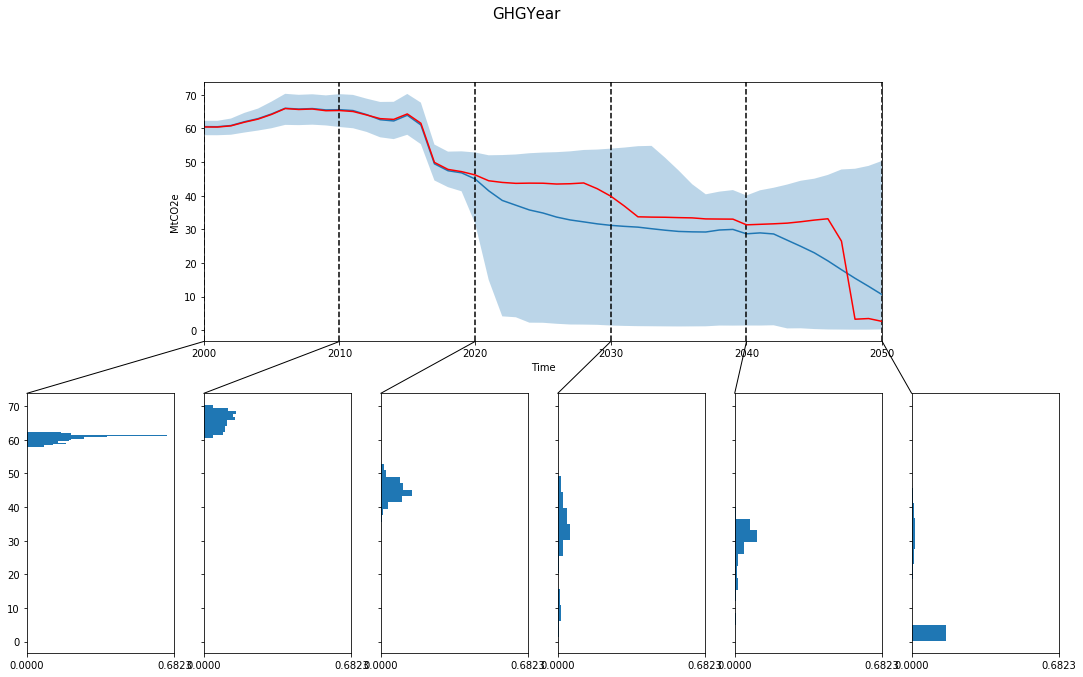

In [82]:
from EMAworkbench.ema_workbench.analysis.plotting import multiple_densities, PlotType
from EMAworkbench.ema_workbench.analysis.plotting_util import Density 

fig, ax_env = multiple_densities(experiments, outcomes_bau_cluster, outcomes_to_show = ooi,
                                 points_in_time=points_of_interest, density = Density.HIST, grouping_specifiers=None,
                                 titles={ooi}, ylabels={ooi: "MtCO2e"}, legend=True,
                                 fill=True, plot_type=PlotType.ENVELOPE)

#Change x labels to years
ax_env[ooi]['main plot'].set_xticklabels(time[range(0,len(time),10)])

#Add BAU in the plot with a gray red line
ax_env[ooi]['main plot'].plot(outcomes_filtered[ooi][-1], 'r-')

## Show labels
# labels = ax_env['F']['main plot'].get_xticklabels()
# for l in labels:
#     print (l.get_text)

fig[0].suptitle("{}".format(ooi), fontsize=15)
fig[0].set_size_inches(18.5, 10.5)

plt.savefig('{}/fig{}.png'.format(r'C:\\Users\\angel\\Documents\\GitHub\\gr4sp\\experiments\\notebookGr4sp\\outputs\\figs', 'filtered_envelope_density_%s'%(ooi)),
                dpi=300, bbox_inches='tight')


As the envelope shows, there are two main groups at the first years of analysis where GHG emissions either increase or decrease. However, as time passes, GHG emissions can vary widely. 
Taking the first year of analysis, year 2020, we can investigate the cases where GHG emissions per year per household fall below 30.89 MtonsCO2-e. This is 20% lower than the emissions in BAU for 2005, which were 38.62 MtCO2-e

### Scenario Discovery: Prim - Low Carbon Scenario
* Low carbon emissions is the objective. Therefore, low emissions scenarios, with a high generation autonomy (in primary and secondary markets) and high percentage of renewable energy in the system are going to be explored. 

This section has two parts: the hypothetical past and the future pathways. 
1. Hypothetical past: Fins out what Victoria could have done to get into the lower cluster of pathways with low carbon emissions.

2. Victoria's Climate Change Act 2017: “These targets build on the progress that Victoria is already making; emissions are projected to fall to 18% below 2005 levels in 2020.”
The Panel recommends interim targets of:
•	32-39% below 2005 levels in 2025
•	45-60% below 2005 levels in 2030

In [151]:
from EMAworkbench.ema_workbench.analysis import prim
from EMAworkbench.ema_workbench.util import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO);
 
x = exp
ooi = 'GHGYear'
#y = (out_avg_ooi < 4.)
#y = target_at_year( outcomes_filtered, ooi, 2030, 24, False) #False is below target
y = target_at_year( outcomes_filtered, ooi, 2025, 38, False) #False is below target

#Threshold for density
prim_alg = prim.Prim(x, y, threshold=0.5)
box1 = prim_alg.find_box()

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] 130001 points remaining, containing 73840 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.15656802639979692, coverage: 0.27565005417118094, density: 1.0 restricted_dimensions: 5


In [152]:
box1.inspect_tradeoff()

alt.VConcatChart(...)

coverage    0.508248
density     0.951788
id                 3
mass        0.303305
mean        0.951788
res_dim            2
Name: 3, dtype: object

                          box 3                   
                            min   max    qp values
generationRolloutPeriod     0.5  10.0  [0.0, -1.0]
semiScheduleGenSpotMarket   9.5  10.0  [0.0, -1.0]



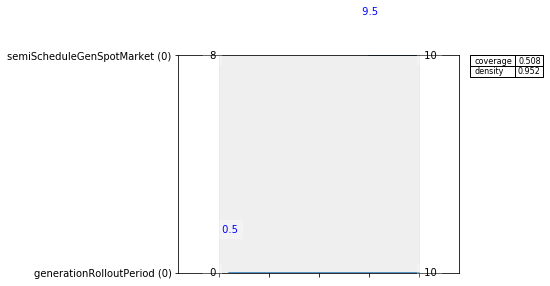

In [154]:
#%matplotlib inline
selected_box = 3

box_1 = box1.inspect(selected_box)
box_1 = box1.inspect(selected_box, style='graph')


"The quasi-p-value test, essentially a one sided binomial test, is an estimate of the likelihood that a given uncertainty is included in the definition of the subspace purely by chance." (Bryant and Lempert, 2010)
"
“qp-value” test thus answers the question: what is the probability that Tpoints drawn from the above binomial distribution would have H or more high valued points? When the ratio $H_{-j}$/$T_{-j}$ is close to H/T this number is high, the additional contribution of parameter $r_j$ is low, and thus possibly due to chance. The opposite is the case when H/T is much larger than  $H_{-j}$/$T_{-j}$." (Bryant and Lempert, 2010)

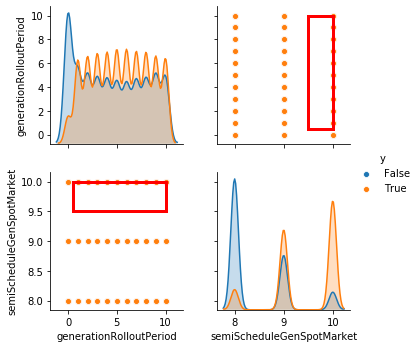

In [155]:
box1.select(selected_box)
fig = box1.show_pairs_scatter(selected_box)

plt.show()


### Feature Scoring

In [156]:
from EMAworkbench.ema_workbench.analysis import feature_scoring

fs, alg = feature_scoring.get_ex_feature_scores(x, y, mode=feature_scoring.RuleInductionType.CLASSIFICATION)
fs.sort_values(ascending=False, by=1)



[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category


1
0                                       
semiScheduleGenSpotMarket       0.442933
generationRolloutPeriod         0.091105
nonScheduleGenSpotMarket        0.071145
consumption                     0.049871
priceChangePercentageWater      0.042154
domesticConsumptionPercentage   0.033612
priceChangePercentageBrownCoal  0.030894
semiScheduleMinCapMarketGen     0.025520
capacityFactorChangeBrownCoal   0.023289
includePublicallyAnnouncedGen   0.023217
capacityFactorChangeWater       0.017431
nonScheduleMinCapMarketGen      0.017053
generatorRetirement             0.015898
energyEfficiency                0.013511
learningCurve                   0.013461
rooftopPV                       0.012970
capacityFactorChangeOcgt        0.012960
priceChangePercentageOcgt       0.012922
annualInflation                 0.012806
annualCpi                       0.012664
priceChangePercentageWind       0.012577
scheduleMinCapMarketGen         0.012008

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category


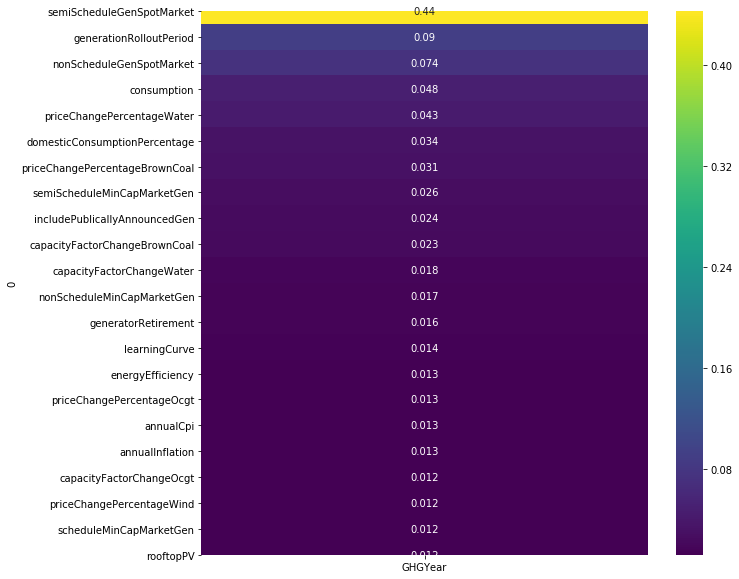

In [157]:
x = exp
y_all = {}

#plot using ALL simulations
#y_all['GHGYear'] = data

#plot using average of ALL simulations
#y_all['GHGYear'] = out_avg_ooi

#Plot using only target simulations
y_all['GHGYear'] = y

fig, ax = plt.subplots(figsize=(10,10))
fs = feature_scoring.get_feature_scores_all(x, y_all)
sns.heatmap(fs, cmap='viridis', annot=True, ax=ax)
plt.show()

### Dimensional Stacking


[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category


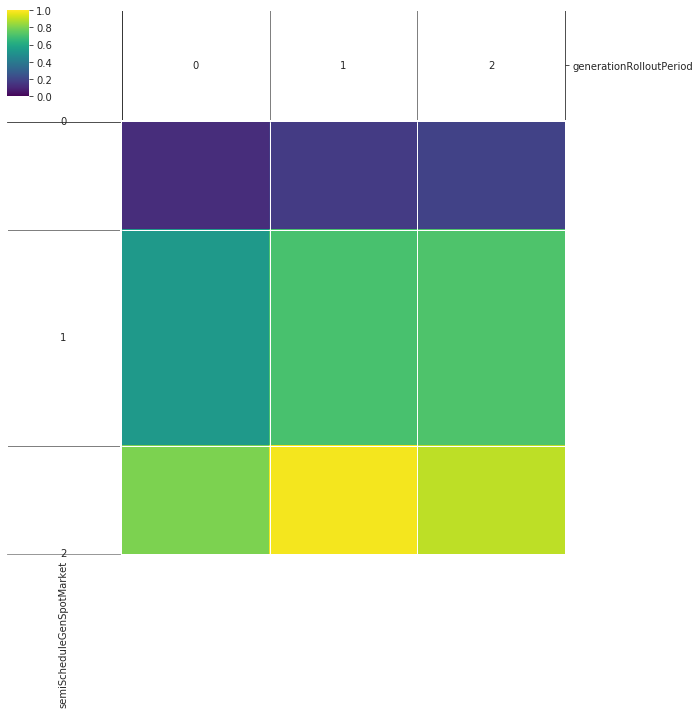

In [159]:

from EMAworkbench.ema_workbench.analysis import dimensional_stacking

x = exp
dimensional_stacking.create_pivot_plot(x,y, 1, nbins=3)
plt.show()



## Wholesale Price

In [85]:
# Subset Sobol levers
#selected_levers = list(['rooftopPV','annualCpi', 'generationRolloutPeriod', 'generatorRetirement','capacityFactorChangeBrownCoal','semiScheduleMinCapMarketGen'])    

select_uncertainties = uncertainties
ooi = 'wholesalePriceYear'
data = outcomes_filtered[ooi]

num_exp = len(data)
out_avg_ooi = np.zeros(num_exp)

for i in range(num_exp):
    out_avg_ooi[i] = data[i].mean()

exp = pd.DataFrame(experiments)

exp = exp.loc[ :, select_uncertainties] 

### Open Exploration: Visual Analysis

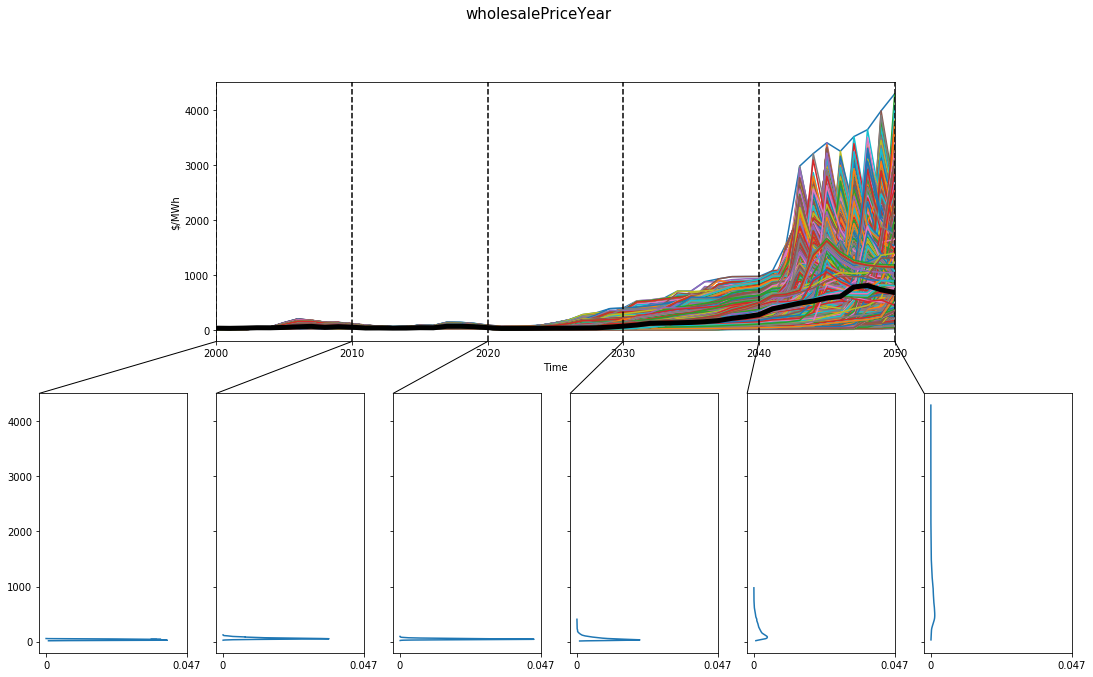

In [86]:
from EMAworkbench.ema_workbench.analysis.plotting import multiple_densities, PlotType
from EMAworkbench.ema_workbench.analysis.plotting_util import Density 

# fig, ax_env = multiple_densities(experiments, outcomes_filtered, outcomes_to_show = ooi,
#                                  points_in_time=points_of_interest,  density = Density.KDE,
#                                  grouping_specifiers=None , titles={ooi}, ylabels={ooi: "$/MWh"}, legend=True,
#                                  fill=False, plot_type=PlotType.ENV_LIN)

fig, ax_env = multiple_densities(experiments, outcomes_filtered, outcomes_to_show = ooi,
                                 points_in_time=points_of_interest,  density = Density.KDE,
                                 grouping_specifiers=None , titles={ooi}, ylabels={ooi: "$/MWh"}, legend=True,
                                 fill=False, plot_type=PlotType.ENV_LIN)
#Change x labels to years
ax_env[ooi]['main plot'].set_xticklabels(time[range(0,len(time),10)])
#Add BAU in the plot with a black wide line
ax_env[ooi]['main plot'].plot(outcomes_filtered[ooi][-1], 'k-',linewidth=5 )

fig[0].suptitle("{}".format(ooi), fontsize=15)
fig[0].set_size_inches(18.5, 10.5)

plt.savefig('{}/fig{}.png'.format(r'C:\\Users\\angel\\Documents\\GitHub\\gr4sp\\experiments\\notebookGr4sp\\outputs\\figs', '_envelope_line_density_%s'%(ooi)),
                dpi=300, bbox_inches='tight')

Densities (PDF): {'16.0 to 19.7': '0.004', '19.7 to 23.4': '0.017', '23.4 to 27.1': '0.037', '27.1 to 30.8': '0.030', '30.8 to 34.5': '0.034', '34.5 to 38.2': '0.036', '38.2 to 41.9': '0.037', '41.9 to 45.6': '0.034', '45.6 to 49.3': '0.028', '49.3 to 53.0': '0.012', '53.0 to 56.7': '0.001'}
% in Bin: {'16.0 to 19.7': '1.6%', '19.7 to 23.4': '6.4%', '23.4 to 27.1': '13.7%', '27.1 to 30.8': '11.0%', '30.8 to 34.5': '12.6%', '34.5 to 38.2': '13.3%', '38.2 to 41.9': '13.8%', '41.9 to 45.6': '12.5%', '45.6 to 49.3': '10.3%', '49.3 to 53.0': '4.4%', '53.0 to 56.7': '0.4%'}

Densities (PDF): {'34.7 to 43.5': '0.009', '43.5 to 52.2': '0.028', '52.2 to 60.9': '0.032', '60.9 to 69.6': '0.018', '69.6 to 78.3': '0.012', '78.3 to 87.0': '0.008', '87.0 to 95.7': '0.004', '95.7 to 104.5': '0.003'}
% in Bin: {'26.0 to 34.7': '0.7%', '34.7 to 43.5': '8.0%', '43.5 to 52.2': '24.8%', '52.2 to 60.9': '27.6%', '60.9 to 69.6': '15.9%', '69.6 to 78.3': '10.1%', '78.3 to 87.0': '6.7%', '87.0 to 95.7': '3.4%'

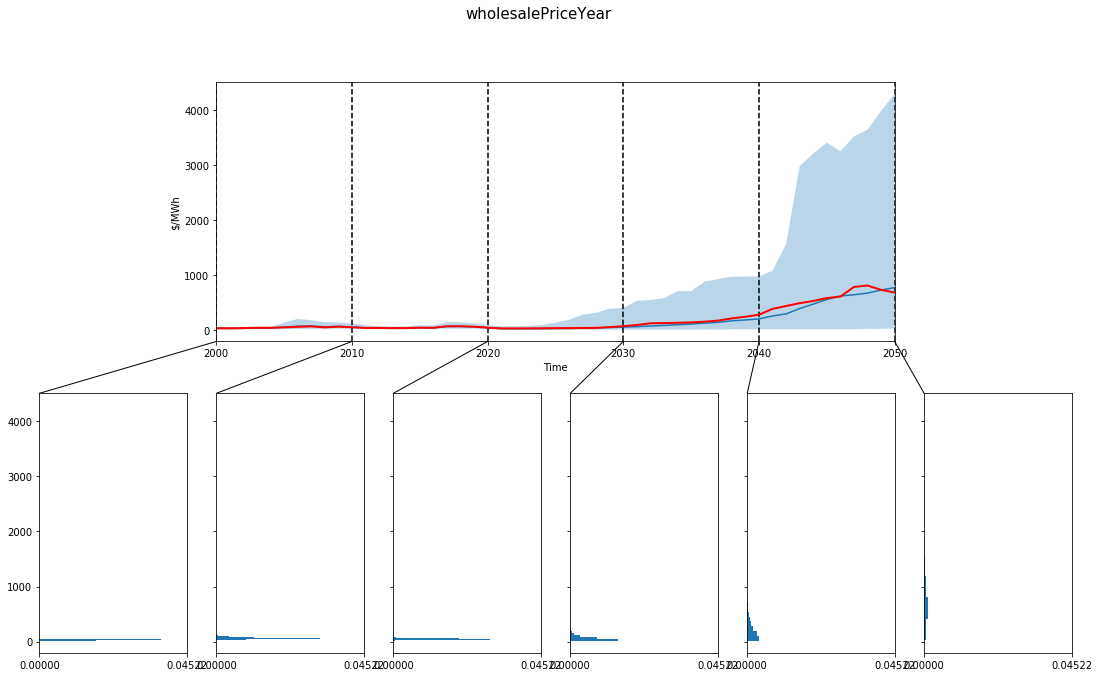

In [87]:
from EMAworkbench.ema_workbench.analysis.plotting import multiple_densities, PlotType
from EMAworkbench.ema_workbench.analysis.plotting_util import Density

# fig, ax_env = multiple_densities(experiments, outcomes_filtered, outcomes_to_show = ooi,
#                                  points_in_time=points_of_interest,  density = Density.HIST,
#                                  grouping_specifiers=None , titles={ooi}, ylabels={ooi: "$/MWh"}, legend=True,
#                                  fill=True, plot_type=PlotType.ENVELOPE)

fig, ax_env = multiple_densities(experiments, outcomes_filtered, outcomes_to_show = ooi,
                                 points_in_time=points_of_interest,  density = Density.HIST,
                                 grouping_specifiers=None , titles={ooi}, ylabels={ooi: "$/MWh"}, legend=True,
                                 fill=True, plot_type=PlotType.ENVELOPE)

#Change x labels to years
ax_env[ooi]['main plot'].set_xticklabels(time[range(0,len(time),10)])
#Add BAU in the plot with a red wide line
ax_env[ooi]['main plot'].plot(outcomes_filtered[ooi][-1], 'r-',linewidth=2 )

fig[0].suptitle("{}".format(ooi), fontsize=15)
fig[0].set_size_inches(18.5, 10.5)

plt.savefig('{}/fig{}.png'.format(r'C:\\Users\\angel\\Documents\\GitHub\\gr4sp\\experiments\\notebookGr4sp\\outputs\\figs', '_envelope_density_%s'%(ooi)),
                dpi=300, bbox_inches='tight')



Wholesale prices: 20-25% by 2025 on 2017 levels
Spot price in 2017 ~103 $/MWh (OpenNem) in simulation BAU VIC 48.05. In 2025 should be below 38.44-36.03 (20-25%)

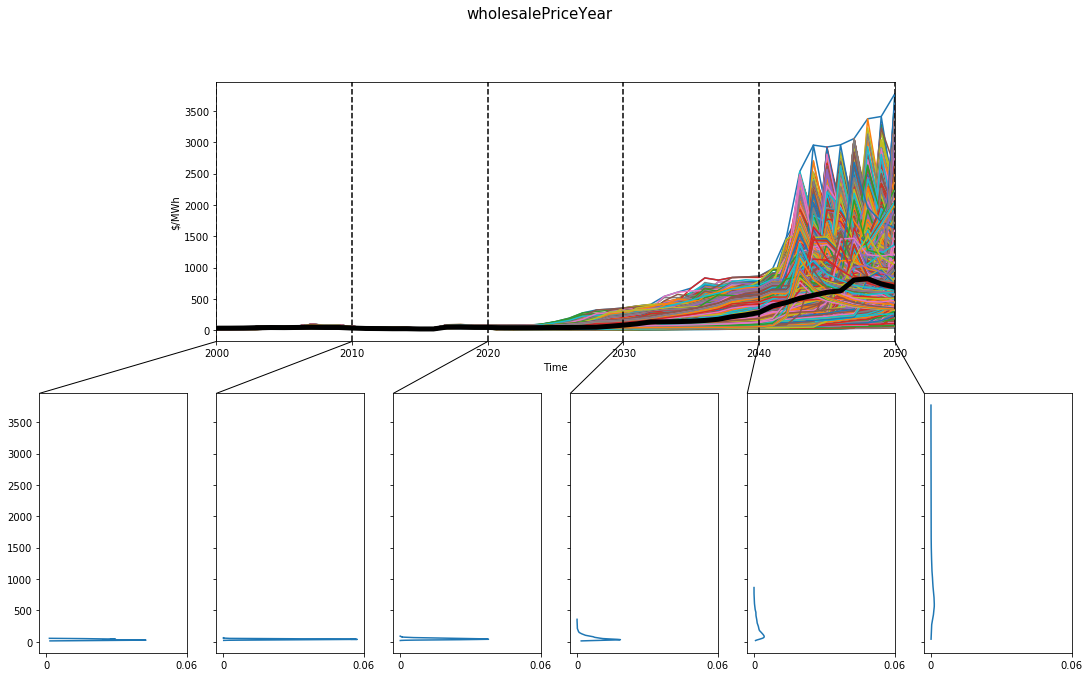

In [285]:
from EMAworkbench.ema_workbench.analysis.plotting import multiple_densities, PlotType
from EMAworkbench.ema_workbench.analysis.plotting_util import Density 

# fig, ax_env = multiple_densities(experiments, outcomes_filtered, outcomes_to_show = ooi,
#                                  points_in_time=points_of_interest,  density = Density.KDE,
#                                  grouping_specifiers=None , titles={ooi}, ylabels={ooi: "$/MWh"}, legend=True,
#                                  fill=False, plot_type=PlotType.ENV_LIN)

fig, ax_env = multiple_densities(experiments, outcomes_filtered, outcomes_to_show = ooi,
                                 points_in_time=points_of_interest,  density = Density.KDE,
                                 grouping_specifiers=None , titles={ooi}, ylabels={ooi: "$/MWh"}, legend=True,
                                 fill=False, plot_type=PlotType.ENV_LIN)
#Change x labels to years
ax_env[ooi]['main plot'].set_xticklabels(time[range(0,len(time),10)])
#Add BAU in the plot with a black wide line
ax_env[ooi]['main plot'].plot(outcomes_filtered[ooi][-1], 'k-',linewidth=5 )

fig[0].suptitle("{}".format(ooi), fontsize=15)
fig[0].set_size_inches(18.5, 10.5)

plt.savefig('{}/fig{}.png'.format(r'C:\\Users\\angel\\Documents\\GitHub\\gr4sp\\experiments\\notebookGr4sp\\outputs\\figs', 'filtered_envelope_line_density_%s'%(ooi)),
                dpi=300, bbox_inches='tight')

Densities (PDF): {'16.0 to 19.7': '0.004', '19.7 to 23.4': '0.017', '23.4 to 27.1': '0.037', '27.1 to 30.8': '0.030', '30.8 to 34.5': '0.034', '34.5 to 38.2': '0.036', '38.2 to 41.9': '0.037', '41.9 to 45.6': '0.034', '45.6 to 49.3': '0.028', '49.3 to 53.0': '0.012', '53.0 to 56.7': '0.001'}
% in Bin: {'16.0 to 19.7': '1.6%', '19.7 to 23.4': '6.4%', '23.4 to 27.1': '13.7%', '27.1 to 30.8': '11.0%', '30.8 to 34.5': '12.6%', '34.5 to 38.2': '13.3%', '38.2 to 41.9': '13.8%', '41.9 to 45.6': '12.5%', '45.6 to 49.3': '10.3%', '49.3 to 53.0': '4.4%', '53.0 to 56.7': '0.4%'}

Densities (PDF): {'34.7 to 43.5': '0.009', '43.5 to 52.2': '0.028', '52.2 to 60.9': '0.032', '60.9 to 69.6': '0.018', '69.6 to 78.3': '0.012', '78.3 to 87.0': '0.008', '87.0 to 95.7': '0.004', '95.7 to 104.5': '0.003'}
% in Bin: {'26.0 to 34.7': '0.7%', '34.7 to 43.5': '8.0%', '43.5 to 52.2': '24.8%', '52.2 to 60.9': '27.6%', '60.9 to 69.6': '15.9%', '69.6 to 78.3': '10.1%', '78.3 to 87.0': '6.7%', '87.0 to 95.7': '3.4%'

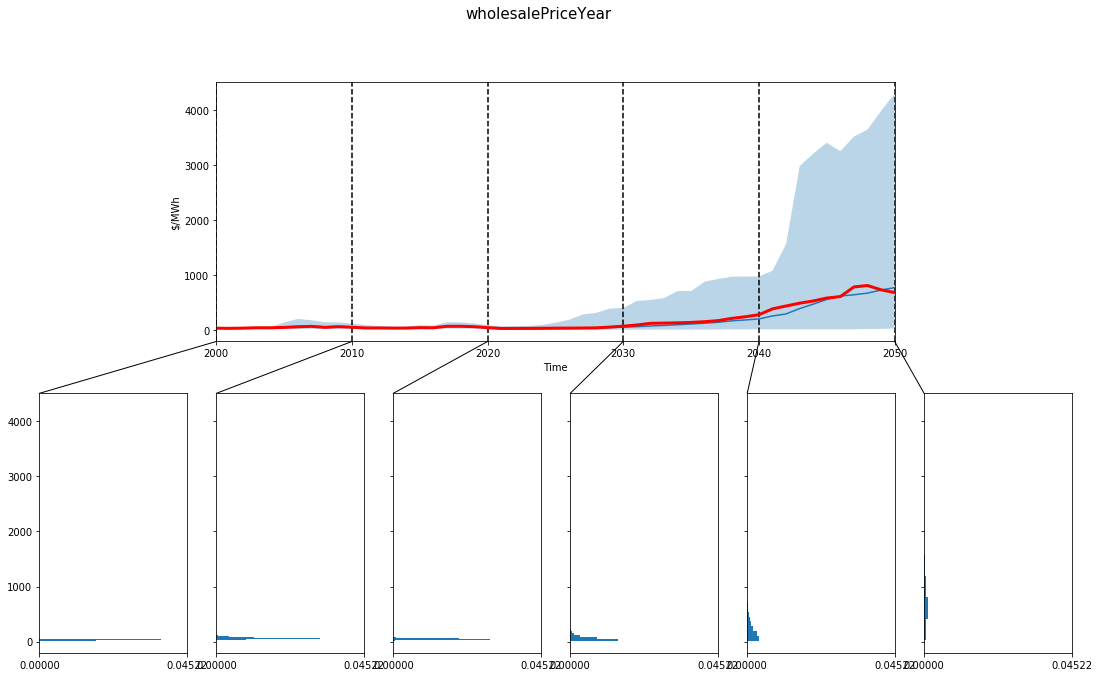

In [88]:
from EMAworkbench.ema_workbench.analysis.plotting import multiple_densities, PlotType
from EMAworkbench.ema_workbench.analysis.plotting_util import Density

# fig, ax_env = multiple_densities(experiments, outcomes_filtered, outcomes_to_show = ooi,
#                                  points_in_time=points_of_interest,  density = Density.HIST,
#                                  grouping_specifiers=None , titles={ooi}, ylabels={ooi: "$/MWh"}, legend=True,
#                                  fill=True, plot_type=PlotType.ENVELOPE)

fig, ax_env = multiple_densities(experiments, outcomes_filtered, outcomes_to_show = ooi,
                                 points_in_time=points_of_interest,  density = Density.HIST,
                                 grouping_specifiers=None , titles={ooi}, ylabels={ooi: "$/MWh"}, legend=True,
                                 fill=True, plot_type=PlotType.ENVELOPE)

#Change x labels to years
ax_env[ooi]['main plot'].set_xticklabels(time[range(0,len(time),10)])
#Add BAU in the plot with a red wide line
ax_env[ooi]['main plot'].plot(outcomes_filtered[ooi][-1], 'r-',linewidth=3 )

fig[0].suptitle("{}".format(ooi), fontsize=15)
fig[0].set_size_inches(18.5, 10.5)

plt.savefig('{}/fig{}.png'.format(r'C:\\Users\\angel\\Documents\\GitHub\\gr4sp\\experiments\\notebookGr4sp\\outputs\\figs', '_envelope_density_%s'%(ooi)),
                dpi=300, bbox_inches='tight')



Wholesale prices: 20-25% by 2025 on 2017 levels
Spot price in 2017 ~103 $/MWh (OpenNem) in simulation BAU VIC 48.05. In 2025 should be below 38.44-36.03 (20-25%)

In [32]:
from EMAworkbench.ema_workbench.analysis import prim
from EMAworkbench.ema_workbench.util import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO); 
x = exp
#y = out_avg_ooi > 80

y = target_at_year( outcomes_filtered, ooi, 2030, 46, False) #False is below target

prim_alg = prim.Prim(x, y, threshold=.8, threshold_type=prim.ABOVE)
box1 = prim_alg.find_box()

[MainProcess/INFO] 49153 points remaining, containing 21903 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.06913108050373325, coverage: 0.15513856549331143, density: 1.0 restricted_dimensions: 7


In [33]:
box1.inspect_tradeoff()

alt.VConcatChart(...)

We can see that the targets are __not ambitious enough__, and is sufficient to __delay slightly the rollout of renewables__, and **avoid the earliest retirement of brown coal**

coverage    0.508163
density     0.815028
id                 3
mass        0.303786
mean        0.815028
res_dim            3
Name: 3, dtype: object

                              box 3                                     
                                min   max                      qp values
includePublicallyAnnouncedGen   0.5   1.0                    [0.0, -1.0]
semiScheduleGenSpotMarket       8.5  10.0                    [0.0, -1.0]
generationRolloutPeriod         0.5  10.0  [5.407118507059046e-68, -1.0]



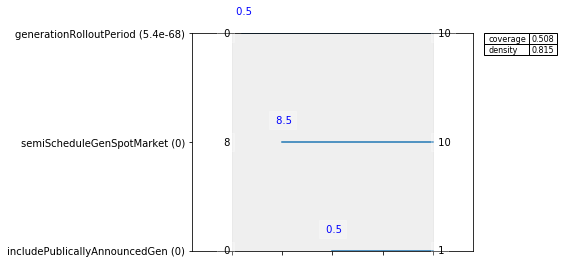

In [19]:
%matplotlib inline
box_1 = box1.inspect(3)
box_1 = box1.inspect(3, style='graph')

### Feature Scoring

In [20]:
from EMAworkbench.ema_workbench.analysis import feature_scoring

fs, alg = feature_scoring.get_ex_feature_scores(x, y, mode=feature_scoring.RuleInductionType.CLASSIFICATION)
fs.sort_values(ascending=False, by=1)


1
0                                       
generatorRetirement             0.231507
semiScheduleGenSpotMarket       0.220452
consumption                     0.085820
includePublicallyAnnouncedGen   0.080848
generationRolloutPeriod         0.066415
priceChangePercentageWater      0.036840
annualInflation                 0.035610
semiScheduleMinCapMarketGen     0.019934
energyEfficiency                0.019555
priceChangePercentageBrownCoal  0.019515
capacityFactorChangeBrownCoal   0.017290
capacityFactorChangeWater       0.015921
nonScheduleGenSpotMarket        0.015054
priceChangePercentageOcgt       0.014438
solarUptake                     0.013859
nonScheduleMinCapMarketGen      0.013788
technologicalImprovement        0.013543
learningCurve                   0.013395
rooftopPV                       0.013375
annualCpi                       0.013333
priceChangePercentageWind       0.013225
wholesaleTariffContribution     0.013187
scheduleMinCapMarketGen         0.013095

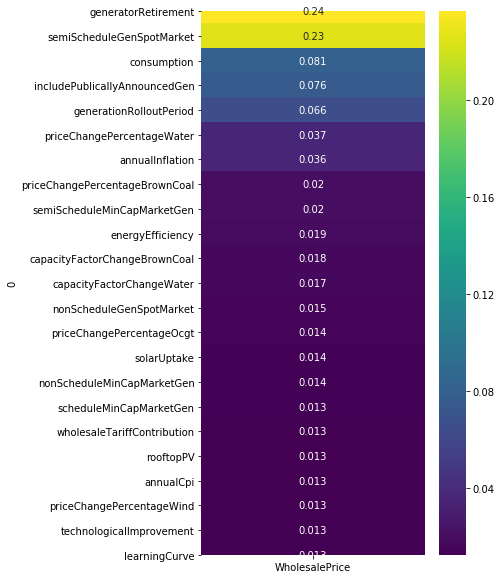

In [21]:
x = exp
y_all = {}

#plot using ALL simulations
#y_all['GHGYear'] = data

#plot using average of ALL simulations
#y_all['GHGYear'] = out_avg_ooi

#Plot using only target simulations
y_all['WholesalePrice'] = y

fig, ax = plt.subplots(figsize=(5,10))
fs = feature_scoring.get_feature_scores_all(x, y_all)
sns.heatmap(fs, cmap='viridis', annot=True, ax=ax)
plt.show()

### Dimensional stacking

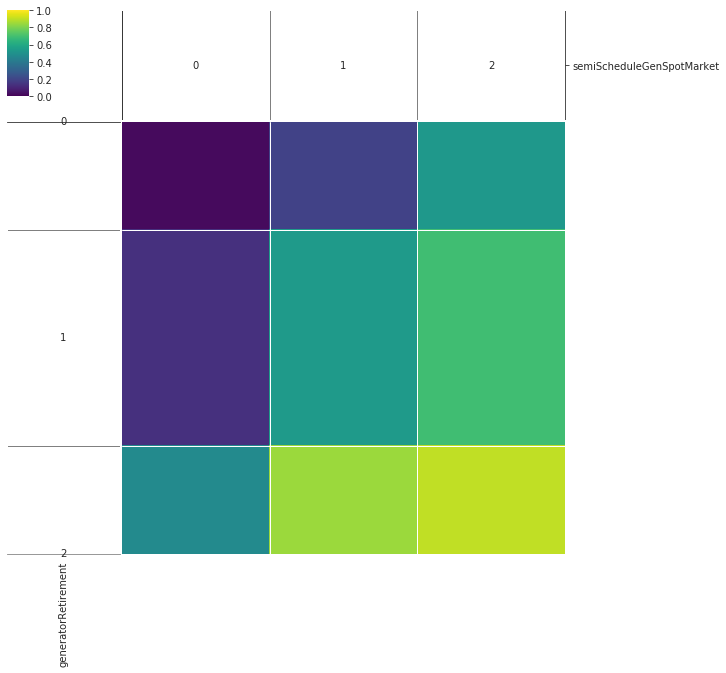

In [22]:

from EMAworkbench.ema_workbench.analysis import dimensional_stacking

x = exp
dimensional_stacking.create_pivot_plot(x,y, 1, nbins=3)
plt.show()



### A more ambitious target
Wholesale prices: 50% by 2025 on 2017 levels
Spot price in 2017 ~103 $/MWh (OpenNem) in simulation BAU VIC 48.05. In 2025 should be below 24.02 (50%)

In [30]:
from EMAworkbench.ema_workbench.analysis import prim
from EMAworkbench.ema_workbench.util import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO);
 
x = exp
#y = out_avg_ooi > 80

y = target_at_year( outcomes_filtered, ooi, 2040, 50, False) #False is below target

prim_alg = prim.Prim(x, y, threshold=.35, threshold_type=prim.ABOVE)
box1 = prim_alg.find_box()

[MainProcess/INFO] 49153 points remaining, containing 2338 cases of interest
[MainProcess/INFO] mean: 0.409373060211049, mass: 0.06555042418570586, coverage: 0.5641573994867408, density: 0.409373060211049 restricted_dimensions: 8


In [31]:
box1.inspect_tradeoff()

alt.VConcatChart(...)

In [ ]:
%matplotlib inline
box_1 = box1.inspect(3)
box_1 = box1.inspect(13, style='graph')


In [ ]:
box1.select(13)
fig = box1.show_pairs_scatter(13)

plt.show()

### Feature Scoring

In [ ]:
from EMAworkbench.ema_workbench.analysis import feature_scoring

fs, alg = feature_scoring.get_ex_feature_scores(x, y, mode=feature_scoring.RuleInductionType.CLASSIFICATION)
fs.sort_values(ascending=False, by=1)


In [ ]:
x = exp
y_all = {}

#plot using ALL simulations
#y_all['GHGYear'] = data

#plot using average of ALL simulations
#y_all['GHGYear'] = out_avg_ooi

#Plot using only target simulations
y_all['WholesalePrice'] = y

fig, ax = plt.subplots(figsize=(5,10))
fs = feature_scoring.get_feature_scores_all(x, y_all)
sns.heatmap(fs, cmap='viridis', annot=True, ax=ax)
plt.show()

### Dimensional stacking

In [ ]:

from EMAworkbench.ema_workbench.analysis import dimensional_stacking

x = exp
dimensional_stacking.create_pivot_plot(x,y, 1, nbins=3)
plt.show()



## Tariffs

In [89]:
# Subset Sool levers/uncertainties
selected_uncertainties = uncertainties

#selected_levers = levers
ooi = 'tariffsYear'
data = outcomes_filtered[ooi]

num_exp = len(data)
out_avg_ooi = np.zeros(num_exp)

for i in range(num_exp):
    out_avg_ooi[i] = data[i].mean()

exp = pd.DataFrame(experiments)

exp = exp.loc[ :, selected_uncertainties] 

: 20-25% by 2025 on 2017. tariffs in 2017: ~21 c/KWh

### Open Exploration: Visual Analysis

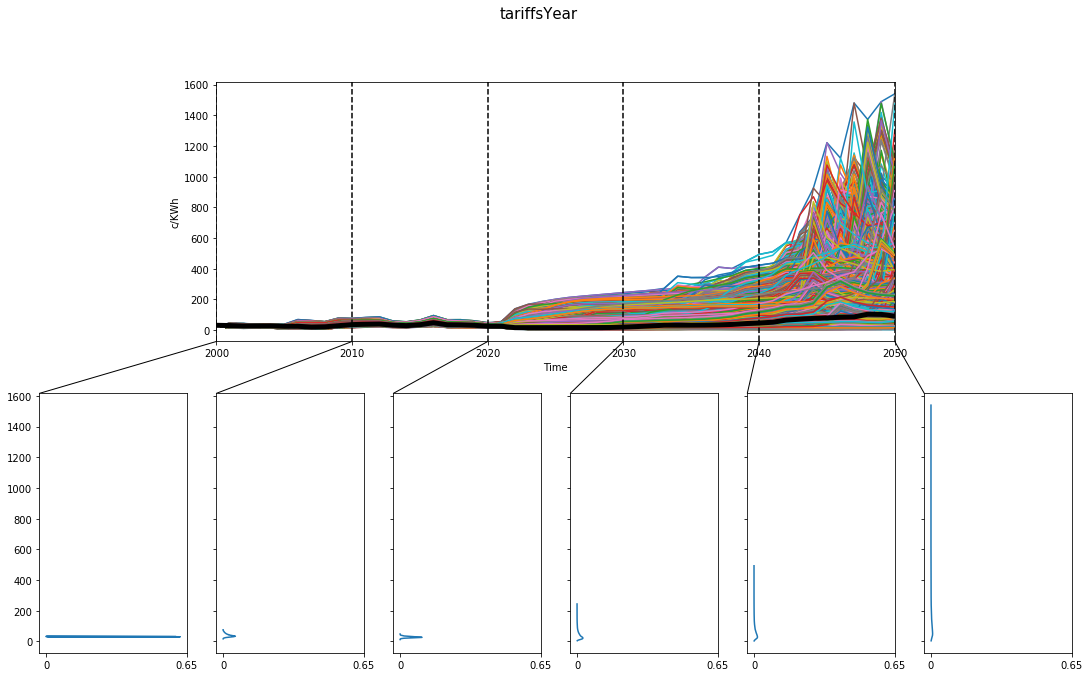

In [90]:
from EMAworkbench.ema_workbench.analysis.plotting import multiple_densities, PlotType
from EMAworkbench.ema_workbench.analysis.plotting_util import Density

fig, ax_env = multiple_densities(experiments, outcomes_filtered, outcomes_to_show = ooi,
                                 points_in_time=points_of_interest,  density = Density.KDE,
                                 grouping_specifiers=None , titles={ooi}, ylabels={ooi: "c/KWh"}, legend=True,
                                 fill=False, plot_type=PlotType.ENV_LIN)

#Change x labels to years
ax_env[ooi]['main plot'].set_xticklabels(time[range(0,len(time),10)])
#Add BAU in the plot with a black wide line
ax_env[ooi]['main plot'].plot(outcomes_filtered[ooi][-1], 'k-',linewidth=5 )


fig[0].suptitle("{}".format(ooi), fontsize=15)
fig[0].set_size_inches(18.5, 10.5)

plt.savefig('{}/fig{}.png'.format(r'C:\\Users\\angel\\Documents\\GitHub\\gr4sp\\experiments\\notebookGr4sp\\outputs\\figs', '_envelope_line_density_%s'%(ooi)),
                dpi=300, bbox_inches='tight')

Densities (PDF): {'29.8 to 30.1': '0.062', '30.1 to 30.3': '0.278', '30.3 to 30.6': '0.568', '30.6 to 30.8': '0.468', '30.8 to 31.0': '0.549', '31.0 to 31.3': '0.555', '31.3 to 31.5': '0.592', '31.5 to 31.7': '0.525', '31.7 to 32.0': '0.424', '32.0 to 32.2': '0.164', '32.2 to 32.5': '0.013'}
% in Bin: {'29.8 to 30.1': '1.5%', '30.1 to 30.3': '6.6%', '30.3 to 30.6': '13.5%', '30.6 to 30.8': '11.1%', '30.8 to 31.0': '13.1%', '31.0 to 31.3': '13.2%', '31.3 to 31.5': '14.1%', '31.5 to 31.7': '12.5%', '31.7 to 32.0': '10.1%', '32.0 to 32.2': '3.9%', '32.2 to 32.5': '0.3%'}

Densities (PDF): {'16.9 to 22.3': '0.001', '22.3 to 27.7': '0.013', '27.7 to 33.0': '0.044', '33.0 to 38.4': '0.050', '38.4 to 43.8': '0.029', '43.8 to 49.2': '0.021', '49.2 to 54.6': '0.013', '54.6 to 60.0': '0.008', '60.0 to 65.4': '0.005', '65.4 to 70.8': '0.002'}
% in Bin: {'16.9 to 22.3': '0.6%', '22.3 to 27.7': '6.8%', '27.7 to 33.0': '23.9%', '33.0 to 38.4': '27.1%', '38.4 to 43.8': '15.8%', '43.8 to 49.2': '11.2%

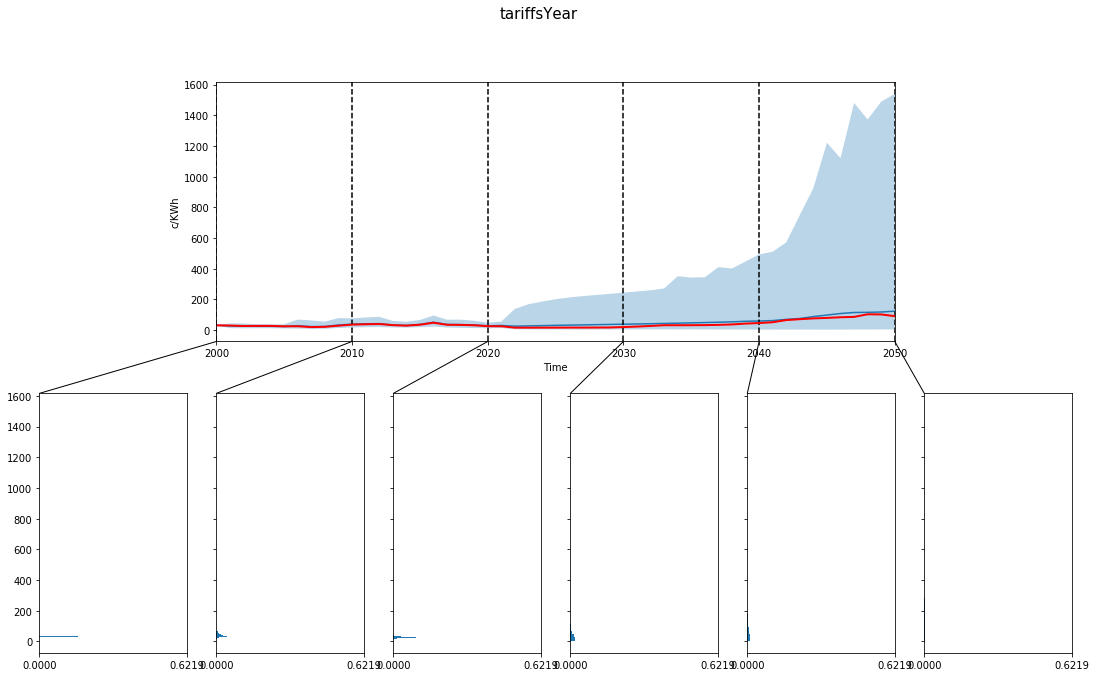

In [91]:
from EMAworkbench.ema_workbench.analysis.plotting import multiple_densities, PlotType
from EMAworkbench.ema_workbench.analysis.plotting_util import Density

fig, ax_env = multiple_densities(experiments, outcomes_filtered, outcomes_to_show = ooi,
                                 points_in_time=points_of_interest,  density = Density.HIST,
                                 grouping_specifiers=None , titles={ooi}, ylabels={ooi: "c/KWh"}, legend=True,
                                 fill=True, plot_type=PlotType.ENVELOPE)

#Change x labels to years
ax_env[ooi]['main plot'].set_xticklabels(time[range(0,len(time),10)])
#Add BAU in the plot with a red wide line
ax_env[ooi]['main plot'].plot(outcomes_filtered[ooi][-1], 'r-',linewidth=2 )


fig[0].suptitle("{}".format(ooi), fontsize=15)
fig[0].set_size_inches(18.5, 10.5)

plt.savefig('{}/fig{}.png'.format(r'C:\\Users\\angel\\Documents\\GitHub\\gr4sp\\experiments\\notebookGr4sp\\outputs\\figs', '_envelope_density_%s'%(ooi)),
                dpi=300, bbox_inches='tight')


In [51]:
from EMAworkbench.ema_workbench.analysis import prim
from EMAworkbench.ema_workbench.util import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO);

x = exp
"""
Filter by GHG
"""    
ooi = 'GHGYear'
#y = (out_avg_ooi < 4.)
#y = target_at_year( outcomes_filtered, ooi, 2030, 24, False) #False is below target
y1 = target_at_year( outcomes_filtered, ooi, 2030, 25, False) #False is below target

"""
Filter by Wholesale price
"""

ooi = 'wholesalePriceYear'    

#y = out_avg_ooi > 20

y2 = target_at_year( outcomes_filtered, ooi, 2030, 50, False) #False is below target
#y = target_at_year( outcomes_filtered, ooi, 2030, 21, False) #False is below target

"""
Filter by Tariff
"""

ooi = 'tariffsYear'    

#y = out_avg_ooi > 20

y3 = target_at_year( outcomes_filtered, ooi, 2030, 21, False) #False is below target
#y = target_at_year( outcomes_filtered, ooi, 2030, 21, False) #False is below target

"""
Combine Filters
"""
y = y1 & y2 & y3

"""
Run PRIM
"""
prim_alg = prim.Prim(x, y, threshold=0.1, threshold_type=prim.ABOVE)
box1 = prim_alg.find_box()

[MainProcess/INFO] 49153 points remaining, containing 1291 cases of interest
[MainProcess/INFO] mean: 0.23065192527640108, mass: 0.053363985921510385, coverage: 0.4686289697908598, density: 0.23065192527640108 restricted_dimensions: 13


In [52]:
box1.inspect_tradeoff()

alt.VConcatChart(...)

coverage     0.68629
density     0.139111
id                32
mass        0.129575
mean        0.139111
res_dim           11
Name: 32, dtype: object

                                   box 32             \
                                      min        max   
priceChangePercentageWind      -30.000000  12.500000   
annualInflation                  0.010020   0.040781   
priceChangePercentageWater     -30.000000  23.500000   
capacityFactorChangeBrownCoal  -10.000000   8.500000   
technologicalImprovement         0.000049   0.095996   
wholesaleTariffContribution     29.500000  45.000000   
priceChangePercentageBrownCoal -23.500000  30.000000   
generationRolloutPeriod          0.500000  10.000000   
annualCpi                        0.011992   0.049980   
learningCurve                    0.004395   0.099951   
scheduleMinCapMarketGen         10.500000  30.000000   

                                                                
                                                     qp

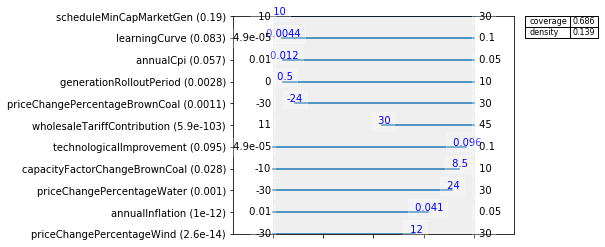

In [53]:
%matplotlib inline
box_1 = box1.inspect(32)
box_1 = box1.inspect(32, style='graph')

### Dimensional stacking

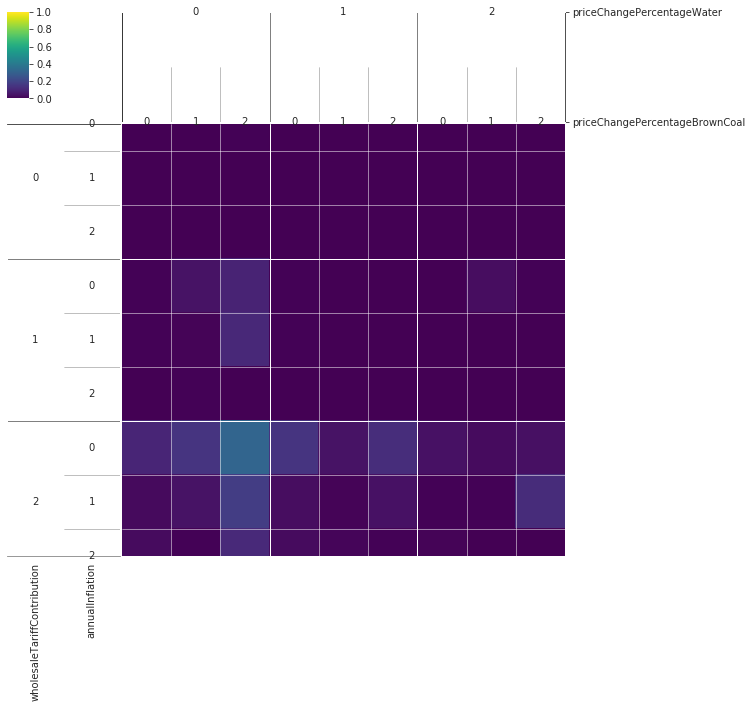

In [56]:

from EMAworkbench.ema_workbench.analysis import dimensional_stacking

x = exp
dimensional_stacking.create_pivot_plot(x,y, 2, nbins=3)
plt.show()



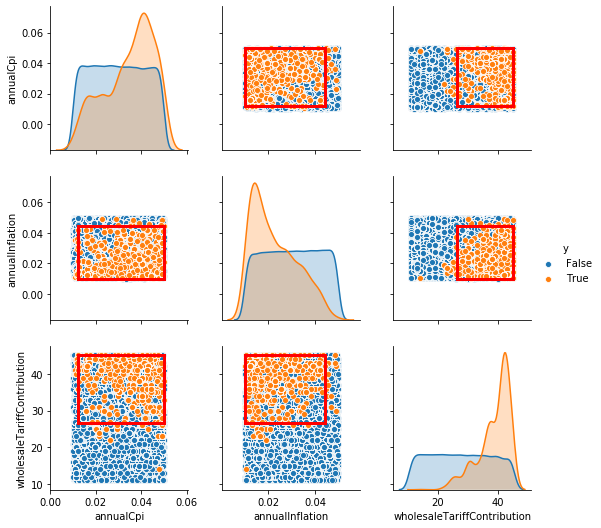

In [55]:
box1.select(12)
fig = box1.show_pairs_scatter(12)
plt.show()

In [98]:
## Primary Spot Production

In [73]:
from EMAworkbench.ema_workbench.analysis import prim
from EMAworkbench.ema_workbench.util import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO);
 
"""
Filter by GHG
"""    
#ooi = 'GHGYear'
#y = (out_avg_ooi < 4.)
#y = target_at_year( outcomes_filtered, ooi, 2030, 24, False) #False is below target
#y1 = target_at_year( outcomes_filtered, ooi, 2020, 38, False) #False is below target

"""
Filter by Tariff
"""

ooi = 'tariffsYear'    
x = exp
#y = out_avg_ooi > 20

#y2 = target_at_year( outcomes_filtered, ooi, 2030, 50, True) #False is below target
y = target_at_year( outcomes_filtered, ooi, 2030, 21, False) #False is below target

"""
Combine Filters
"""
#y = y1 & y2

"""
Run PRIM
"""
prim_alg = prim.Prim(x, y, threshold=0.5, threshold_type=prim.ABOVE)
box1 = prim_alg.find_box()

[MainProcess/INFO] 49153 points remaining, containing 10491 cases of interest
C:\Users\angel\Documents\GitHub\gr4sp\experiments\EMAworkbench\ema_workbench\analysis\scenario_discovery_util.py:226: RuntimeWarning:

invalid value encountered in less_equal

C:\Users\angel\Documents\GitHub\gr4sp\experiments\EMAworkbench\ema_workbench\analysis\scenario_discovery_util.py:227: RuntimeWarning:

invalid value encountered in less_equal

C:\Users\angel\Documents\GitHub\gr4sp\experiments\EMAworkbench\ema_workbench\analysis\scenario_discovery_util.py:306: RuntimeWarning:

invalid value encountered in long_scalars

C:\Users\angel\Anaconda3\lib\site-packages\scipy\stats\_discrete_distns.py:47: RuntimeWarning:

invalid value encountered in greater_equal

C:\Users\angel\Anaconda3\lib\site-packages\scipy\stats\_discrete_distns.py:47: RuntimeWarning:

invalid value encountered in less_equal

C:\Users\angel\Documents\GitHub\gr4sp\experiments\EMAworkbench\ema_workbench\analysis\prim.py:1198: RuntimeWarning:

AssertionError: 

In [52]:
box1.inspect_tradeoff()

alt.VConcatChart(...)

coverage    0.624395
density     0.848195
id                11
mass        0.325128
mean        0.848195
res_dim            3
Name: 11, dtype: object

                            box 11                                     
                               min   max                      qp values
semiScheduleGenSpotMarket      8.0   9.5                    [-1.0, 0.0]
priceChangePercentageWind    -30.0  27.5  [-1.0, 0.0006427886079691778]
wholesaleTariffContribution   27.5  45.0                    [0.0, -1.0]



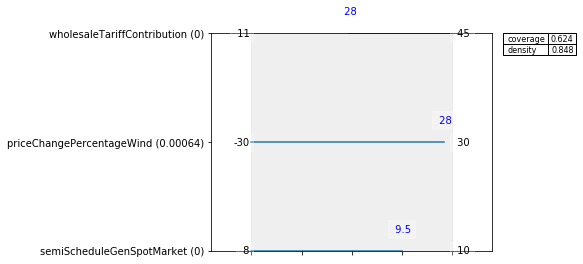

In [47]:
%matplotlib inline
box_1 = box1.inspect(11)
box_1 = box1.inspect(11, style='graph')

### Dimensional stacking

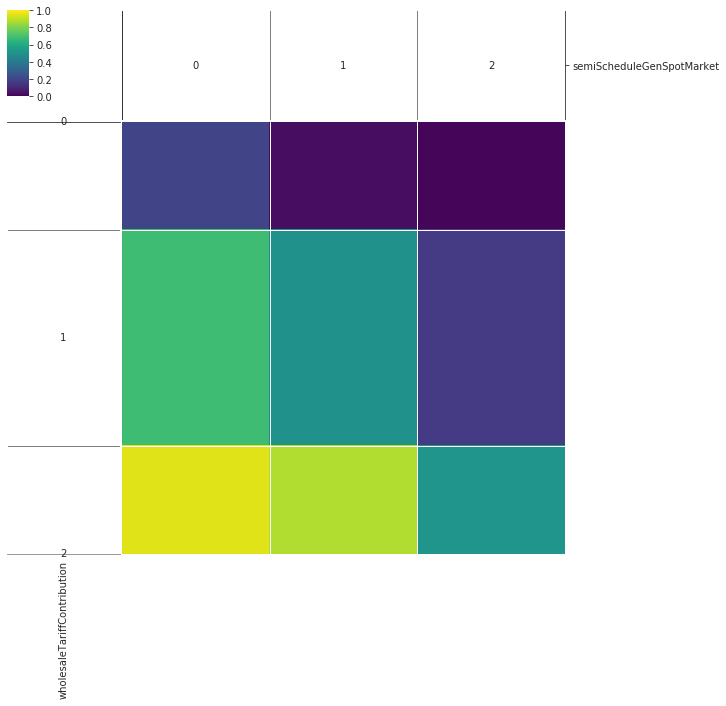

In [49]:

from EMAworkbench.ema_workbench.analysis import dimensional_stacking

x = exp
dimensional_stacking.create_pivot_plot(x,y, 1, nbins=3)
plt.show()



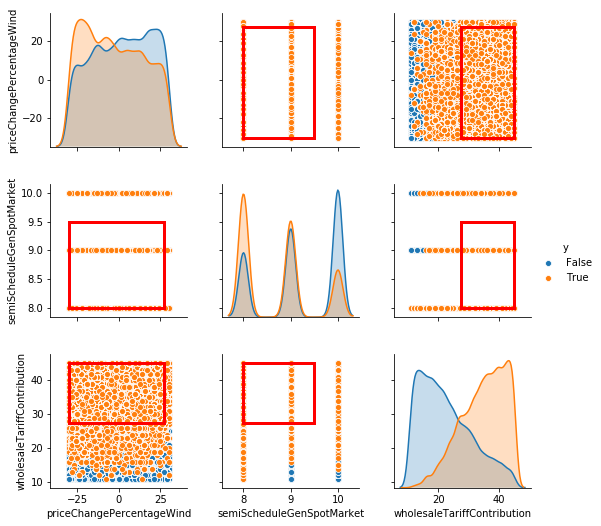

In [50]:
box1.select(11)
fig = box1.show_pairs_scatter(11)
plt.show()

## Primary Spot Production

In [99]:
# Subset Sool levers/uncertainties
selected_uncertainties = list(['annualCpi','priceChangePercentageWind','priceChangePercentageWater',
                        'semiScheduleMinCapMarketGen'])    

selected_uncertainties = uncertainties

ooi = 'primarySpotProductionYear'
data = outcomes_filtered[ooi]

num_exp = len(data)
out_avg_ooi = np.zeros(num_exp)

for i in range(num_exp):
    out_avg_ooi[i] = data[i].mean()

exp = pd.DataFrame(experiments)

exp = exp.loc[ :, selected_uncertainties] 

### Open Exploration: Visual Analysis

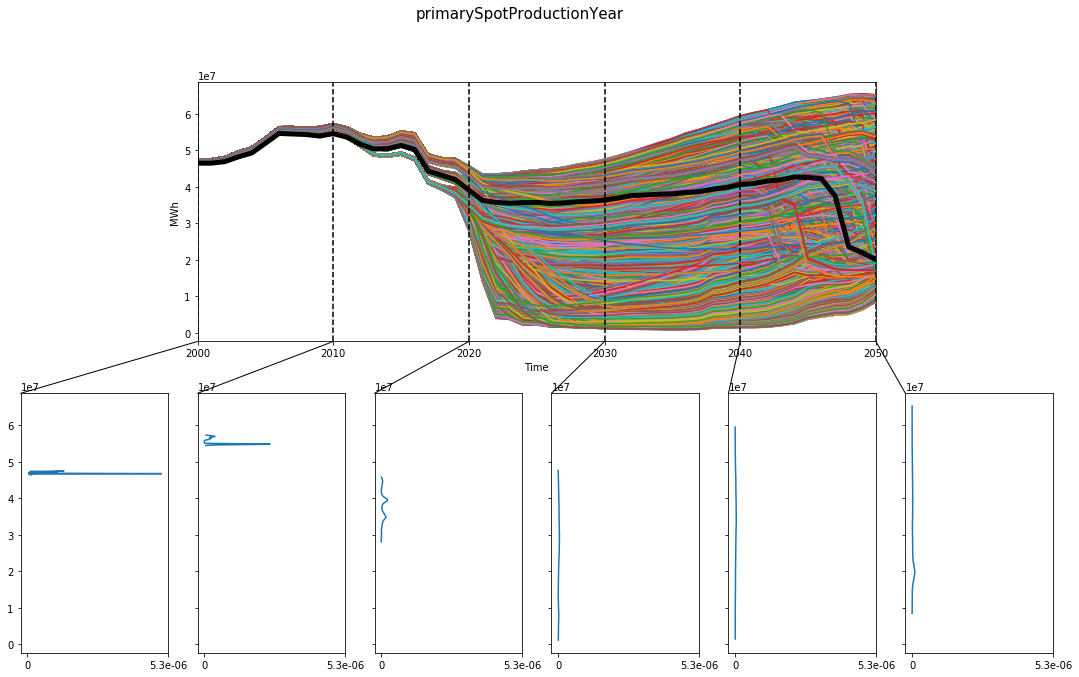

In [95]:
from EMAworkbench.ema_workbench.analysis.plotting import multiple_densities, PlotType
from EMAworkbench.ema_workbench.analysis.plotting_util import Density

fig, ax_env = multiple_densities(experiments, outcomes_filtered, outcomes_to_show = ooi,
                                 points_in_time=points_of_interest,  density = Density.KDE,
                                 grouping_specifiers=None , titles={ooi}, ylabels={ooi: "MWh"}, legend=True,
                                 fill=False, plot_type=PlotType.ENV_LIN)

#Change x labels to years
ax_env[ooi]['main plot'].set_xticklabels(time[range(0,len(time),10)])
#Add BAU in the plot with a black wide line
ax_env[ooi]['main plot'].plot(outcomes_filtered[ooi][-1], 'k-',linewidth=5 )

fig[0].suptitle("{}".format(ooi), fontsize=15)
fig[0].set_size_inches(18.5, 10.5)

plt.savefig('{}/fig{}.png'.format(r'C:\\Users\\angel\\Documents\\GitHub\\gr4sp\\experiments\\notebookGr4sp\\outputs\\figs', '_envelope_line_density_%s'%(ooi)),
                dpi=300, bbox_inches='tight')

Densities (PDF): {}
% in Bin: {'46430802.2 to 46527995.9': '1.6%', '46527995.9 to 46625189.5': '1.4%', '46625189.5 to 46722383.2': '16.3%', '46722383.2 to 46819576.9': '47.1%', '46819576.9 to 46916770.5': '0.4%', '46916770.5 to 47013964.2': '3.0%', '47013964.2 to 47111157.9': '1.5%', '47111157.9 to 47208351.5': '7.1%', '47208351.5 to 47305545.2': '5.8%', '47305545.2 to 47402738.9': '2.8%', '47402738.9 to 47499932.5': '12.9%'}

Densities (PDF): {}
% in Bin: {'54465842.9 to 54726599.8': '3.9%', '54726599.8 to 54987356.7': '62.7%', '54987356.7 to 55248113.6': '0.0%', '55248113.6 to 55508870.5': '0.0%', '55508870.5 to 55769627.4': '0.0%', '55769627.4 to 56030384.3': '0.5%', '56030384.3 to 56291141.2': '4.8%', '56291141.2 to 56551898.1': '6.9%', '56551898.1 to 56812655.0': '5.7%', '56812655.0 to 57073411.9': '10.8%', '57073411.9 to 57334168.8': '4.6%'}

Densities (PDF): {}
% in Bin: {'28072759.3 to 29683402.9': '1.1%', '29683402.9 to 31294046.5': '1.6%', '31294046.5 to 32904690.0': '3.7%', 

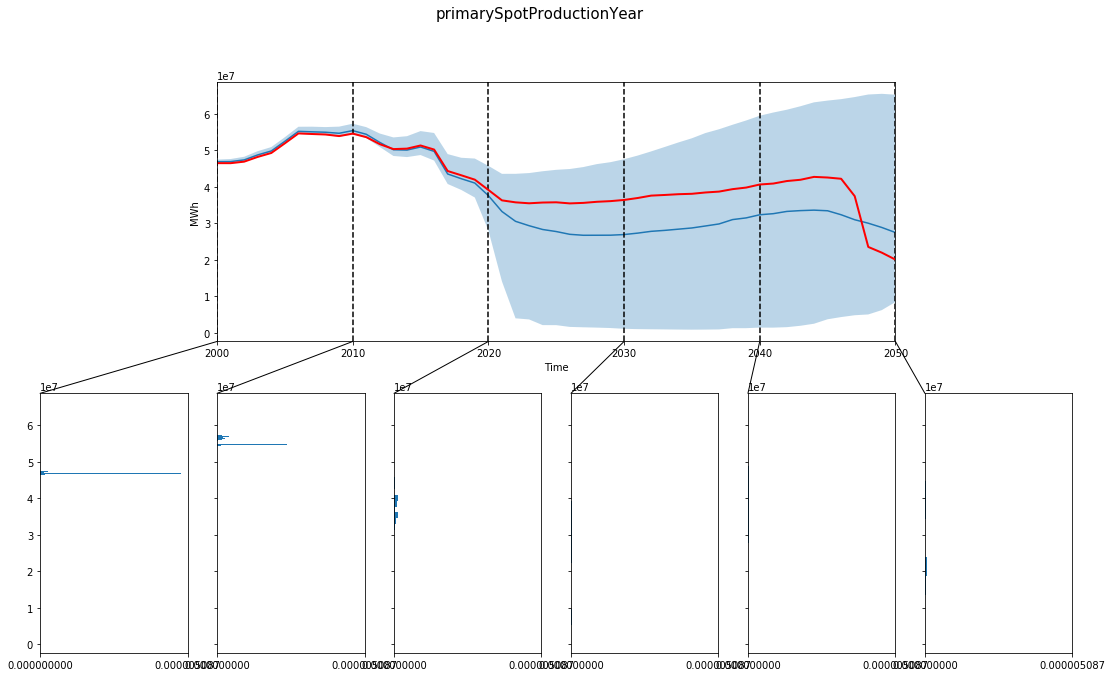

In [100]:
from EMAworkbench.ema_workbench.analysis.plotting import multiple_densities, PlotType
from EMAworkbench.ema_workbench.analysis.plotting_util import Density

fig, ax_env = multiple_densities(experiments, outcomes_filtered, outcomes_to_show = ooi,
                                 points_in_time=points_of_interest,  density = Density.HIST,
                                 grouping_specifiers=None , titles={ooi}, ylabels={ooi: "MWh"}, legend=True,
                                 fill=True, plot_type=PlotType.ENVELOPE)

#Change x labels to years
ax_env[ooi]['main plot'].set_xticklabels(time[range(0,len(time),10)])
#Add BAU in the plot with a red wide line
ax_env[ooi]['main plot'].plot(outcomes_filtered[ooi][-1], 'r-',linewidth=2 )

fig[0].suptitle("{}".format(ooi), fontsize=15)
fig[0].set_size_inches(18.5, 10.5)

plt.savefig('{}/fig{}.png'.format(r'C:\\Users\\angel\\Documents\\GitHub\\gr4sp\\experiments\\notebookGr4sp\\outputs\\figs', '_envelope_density_%s'%(ooi)),
                dpi=300, bbox_inches='tight')

In [ ]:
from EMAworkbench.ema_workbench.analysis import prim
from EMAworkbench.ema_workbench.util import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO);
 
x = exp
#y = out_avg_ooi > 40000000
y = target_at_year( outcomes_filtered, ooi, 2035, 40000000, False) #False is below target

prim_alg = prim.Prim(x, y, threshold=0.3)
box1 = prim_alg.find_box()

In [ ]:
box1.inspect_tradeoff()

In [ ]:
%matplotlib inline
box_1 = box1.inspect(2)
box_1 = box1.inspect(2, style='graph')

In [ ]:
box1.select(2)
fig = box1.show_pairs_scatter(2)
plt.show()

## Secondary Spot Production

In [101]:
# Subset Sool levers/uncertainties
selected_uncertainties = list(['annualCpi','priceChangePercentageWind','priceChangePercentageWater',
                        'semiScheduleMinCapMarketGen'])    

selected_uncertainties = uncertainties

ooi = 'secondarySpotProductionYear'
data = outcomes_filtered[ooi]

num_exp = len(data)
out_avg_ooi = np.zeros(num_exp)

for i in range(num_exp):
    out_avg_ooi[i] = data[i].mean()

exp = pd.DataFrame(experiments)

exp = exp.loc[ :, selected_uncertainties] 

### Open Exploration: Visual Analysis

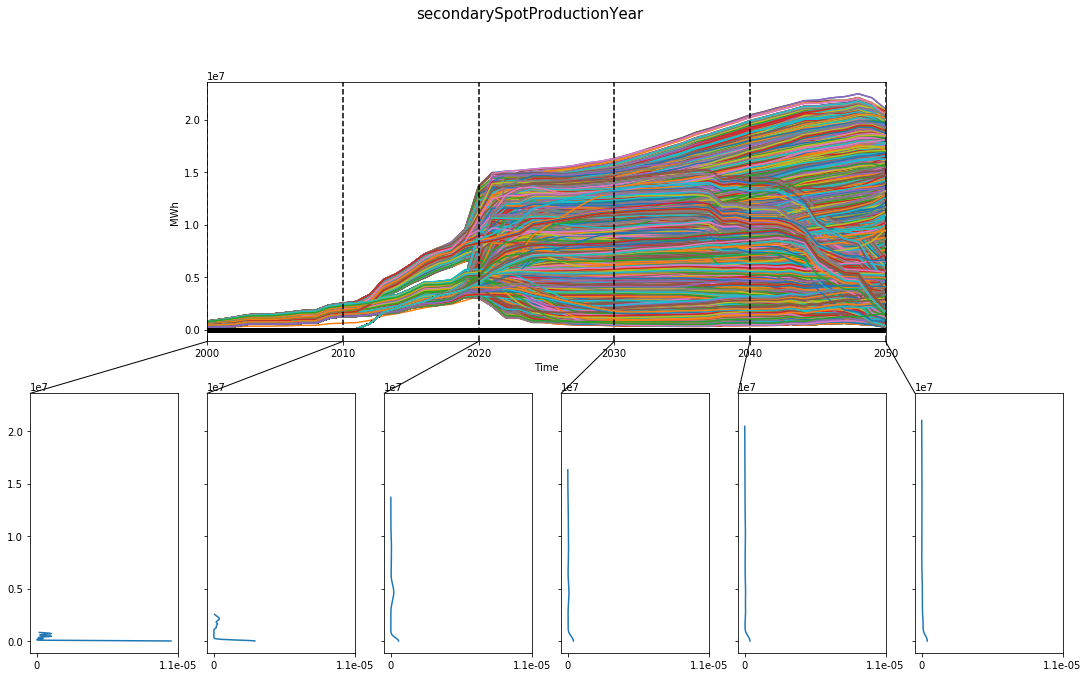

In [102]:
from EMAworkbench.ema_workbench.analysis.plotting import multiple_densities, PlotType
from EMAworkbench.ema_workbench.analysis.plotting_util import Density

fig, ax_env = multiple_densities(experiments, outcomes_filtered, outcomes_to_show = ooi,
                                 points_in_time=points_of_interest,  density = Density.KDE,
                                 grouping_specifiers=None , titles={ooi}, ylabels={ooi: "MWh"}, legend=True,
                                 fill=False, plot_type=PlotType.ENV_LIN)

#Change x labels to years
ax_env[ooi]['main plot'].set_xticklabels(time[range(0,len(time),10)])
#Add BAU in the plot with a black wide line
ax_env[ooi]['main plot'].plot(outcomes_filtered[ooi][-1], 'k-',linewidth=5 )


fig[0].suptitle("{}".format(ooi), fontsize=15)
fig[0].set_size_inches(18.5, 10.5)

plt.savefig('{}/fig{}.png'.format(r'C:\\Users\\angel\\Documents\\GitHub\\gr4sp\\experiments\\notebookGr4sp\\outputs\\figs', '_envelope_line_density_%s'%(ooi)),
                dpi=300, bbox_inches='tight')

Densities (PDF): {}
% in Bin: {'0.0 to 74045.9': '66.7%', '74045.9 to 148091.9': '0.0%', '148091.9 to 222137.8': '0.6%', '222137.8 to 296183.7': '2.7%', '296183.7 to 370229.6': '1.2%', '370229.6 to 444275.6': '4.7%', '444275.6 to 518321.5': '6.2%', '518321.5 to 592367.4': '1.7%', '592367.4 to 666413.3': '3.5%', '666413.3 to 740459.3': '8.4%', '740459.3 to 814505.2': '4.4%'}

Densities (PDF): {}
% in Bin: {'0.0 to 229977.3': '66.7%', '229977.3 to 459954.7': '0.0%', '459954.7 to 689932.0': '0.0%', '689932.0 to 919909.4': '0.0%', '919909.4 to 1149886.7': '0.0%', '1149886.7 to 1379864.0': '3.9%', '1379864.0 to 1609841.4': '4.4%', '1609841.4 to 1839818.7': '5.1%', '1839818.7 to 2069796.1': '7.0%', '2069796.1 to 2299773.4': '9.3%', '2299773.4 to 2529750.7': '3.6%'}

Densities (PDF): {}
% in Bin: {'0.0 to 1244054.4': '44.6%', '1244054.4 to 2488108.8': '0.0%', '2488108.8 to 3732163.2': '3.0%', '3732163.2 to 4976217.6': '25.0%', '4976217.6 to 6220272.0': '11.6%', '6220272.0 to 7464326.4': '3.2%

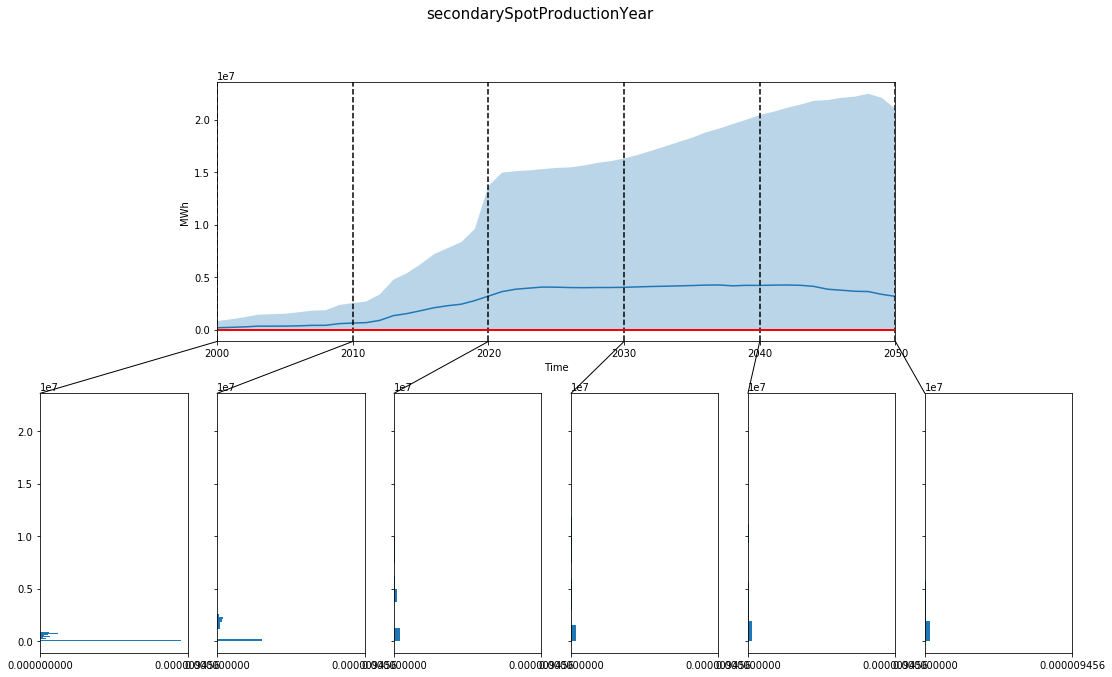

In [105]:
from EMAworkbench.ema_workbench.analysis.plotting import multiple_densities, PlotType
from EMAworkbench.ema_workbench.analysis.plotting_util import Density

fig, ax_env = multiple_densities(experiments, outcomes_filtered, outcomes_to_show = ooi,
                                 points_in_time=points_of_interest,  density = Density.HIST,
                                 grouping_specifiers=None , titles={ooi}, ylabels={ooi: "MWh"}, legend=True,
                                 fill=True, plot_type=PlotType.ENVELOPE)

#Change x labels to years
ax_env[ooi]['main plot'].set_xticklabels(time[range(0,len(time),10)])
#Add BAU in the plot with a red wide line
ax_env[ooi]['main plot'].plot(outcomes_filtered[ooi][-1], 'r-',linewidth=2 )

fig[0].suptitle("{}".format(ooi), fontsize=15)
fig[0].set_size_inches(18.5, 10.5)

plt.savefig('{}/fig{}.png'.format(r'C:\\Users\\angel\\Documents\\GitHub\\gr4sp\\experiments\\notebookGr4sp\\outputs\\figs', '_envelope_density_%s'%(ooi)),
                dpi=300, bbox_inches='tight')

In [ ]:
from EMAworkbench.ema_workbench.analysis import prim
from EMAworkbench.ema_workbench.util import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO);
 
x = exp
#y = out_avg_ooi > 40000000
y = target_at_year( outcomes_filtered, ooi, 2035, 40000000, False) #False is below target

prim_alg = prim.Prim(x, y, threshold=0.3)
box1 = prim_alg.find_box()

In [ ]:
box1.inspect_tradeoff()

In [ ]:
%matplotlib inline
box_1 = box1.inspect(2)
box_1 = box1.inspect(2, style='graph')

In [ ]:
box1.select(2)
fig = box1.show_pairs_scatter(2)
plt.show()

## Rooftop PV Production

In [106]:
# Subset Sool levers/uncertainties

selected_uncertainties = uncertainties

ooi = 'rooftopPVProductionYear'
data = outcomes_filtered[ooi]

num_exp = len(data)
out_avg_ooi = np.zeros(num_exp)

for i in range(num_exp):
    out_avg_ooi[i] = data[i].mean()

exp = pd.DataFrame(experiments)

exp = exp.loc[ :, selected_uncertainties] 

### Open Exploration: Visual Analysis

singular matrix


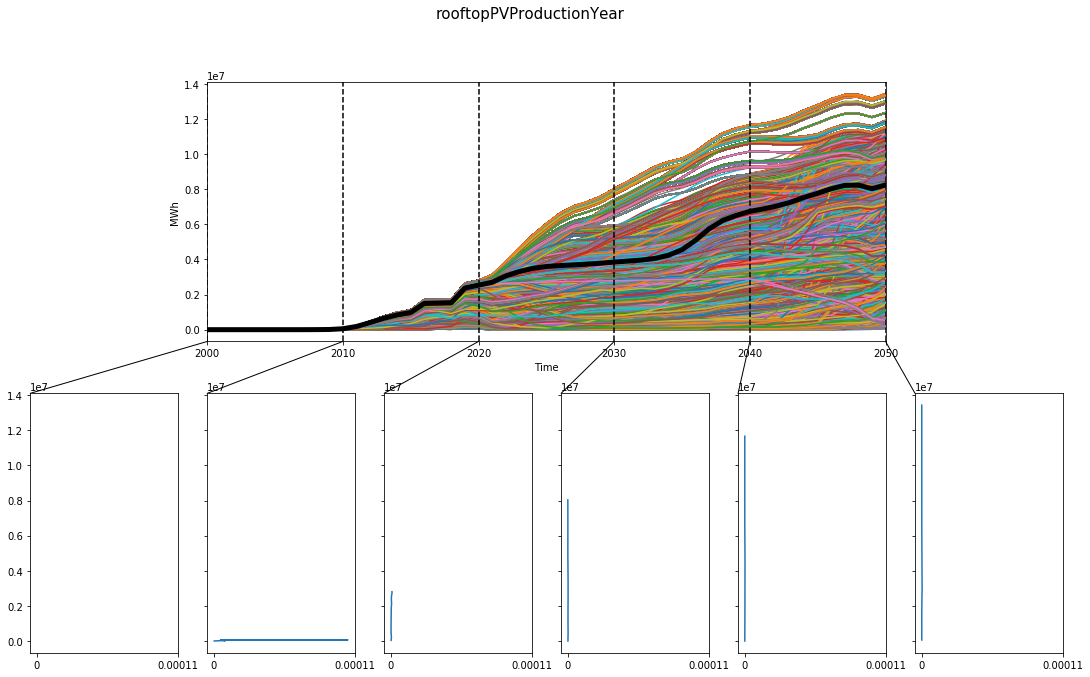

In [107]:
from EMAworkbench.ema_workbench.analysis.plotting import multiple_densities, PlotType
from EMAworkbench.ema_workbench.analysis.plotting_util import Density

fig, ax_env = multiple_densities(experiments, outcomes_filtered, outcomes_to_show = ooi,
                                 points_in_time=points_of_interest,  density = Density.KDE,
                                 grouping_specifiers=None , titles={ooi}, ylabels={ooi: "MWh"}, legend=True,
                                 fill=False, plot_type=PlotType.ENV_LIN)

#Change x labels to years
ax_env[ooi]['main plot'].set_xticklabels(time[range(0,len(time),10)])
#Add BAU in the plot with a black wide line
ax_env[ooi]['main plot'].plot(outcomes_filtered[ooi][-1], 'k-',linewidth=5 )

fig[0].suptitle("{}".format(ooi), fontsize=15)
fig[0].set_size_inches(18.5, 10.5)

plt.savefig('{}/fig{}.png'.format(r'C:\\Users\\angel\\Documents\\GitHub\\gr4sp\\experiments\\notebookGr4sp\\outputs\\figs', '_envelope_line_density_%s'%(ooi)),
                dpi=300, bbox_inches='tight')

singular matrix


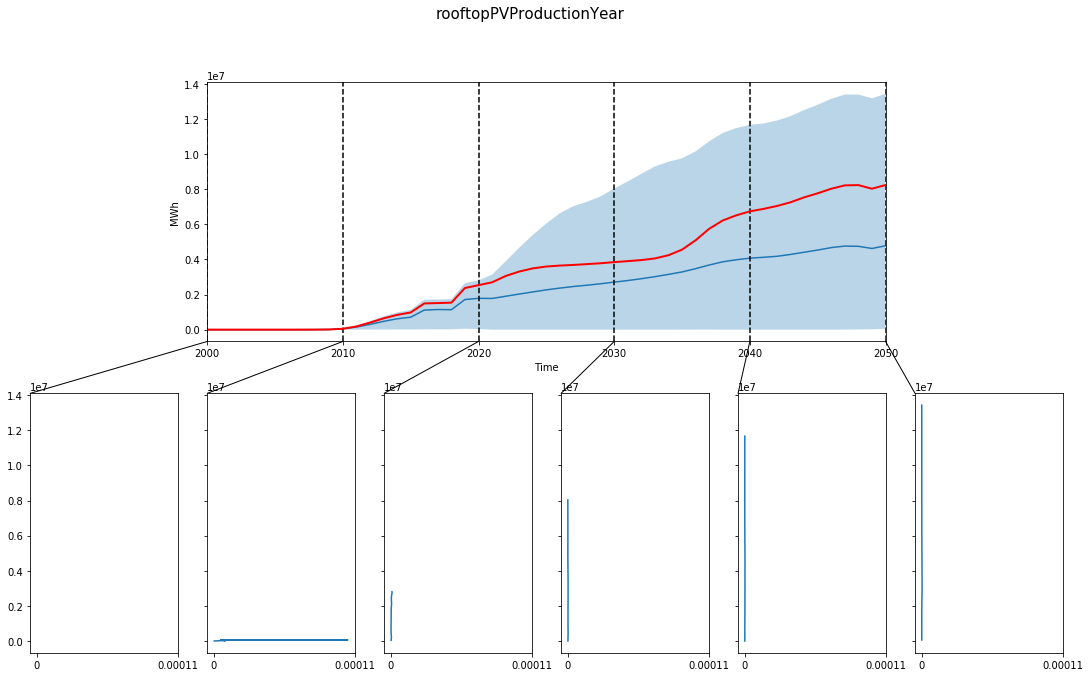

In [108]:
from EMAworkbench.ema_workbench.analysis.plotting import multiple_densities, PlotType
from EMAworkbench.ema_workbench.analysis.plotting_util import Density

fig, ax_env = multiple_densities(experiments, outcomes_filtered, outcomes_to_show = ooi,
                                 points_in_time=points_of_interest,  density = Density.KDE,
                                 grouping_specifiers=None , titles={ooi}, ylabels={ooi: "MWh"}, legend=True,
                                 fill=True, plot_type=PlotType.ENVELOPE)

#Change x labels to years
ax_env[ooi]['main plot'].set_xticklabels(time[range(0,len(time),10)])
#Add BAU in the plot with a red wide line
ax_env[ooi]['main plot'].plot(outcomes_filtered[ooi][-1], 'r-',linewidth=2 )

fig[0].suptitle("{}".format(ooi), fontsize=15)
fig[0].set_size_inches(18.5, 10.5)

plt.savefig('{}/fig{}.png'.format(r'C:\\Users\\angel\\Documents\\GitHub\\gr4sp\\experiments\\notebookGr4sp\\outputs\\figs', '_envelope_density_%s'%(ooi)),
                dpi=300, bbox_inches='tight')

In [ ]:
from EMAworkbench.ema_workbench.analysis import prim
from EMAworkbench.ema_workbench.util import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO);
 
x = exp
#y = out_avg_ooi > 40000000
y = target_at_year( outcomes_filtered, ooi, 2035, 40000000, False) #False is below target

prim_alg = prim.Prim(x, y, threshold=0.3)
box1 = prim_alg.find_box()

In [ ]:
box1.inspect_tradeoff()

In [ ]:
%matplotlib inline
box_1 = box1.inspect(2)
box_1 = box1.inspect(2, style='graph')

In [ ]:
box1.select(2)
fig = box1.show_pairs_scatter(2)
plt.show()

In [ ]:
box1.select(2)
fig = box1.show_pairs_scatter(2)
plt.show()

## Off Spot Production

In [109]:
# Subset Sool levers/unceratinties

selected_uncertainties = uncertainties

ooi = 'offSpotProductionYear'
data = outcomes_filtered[ooi]

num_exp = len(data)
out_avg_ooi = np.zeros(num_exp)

for i in range(num_exp):
    out_avg_ooi[i] = data[i].mean()

exp = pd.DataFrame(experiments)

exp = exp.loc[ :, selected_uncertainties] 

### Open Exploration: Visual Analysis

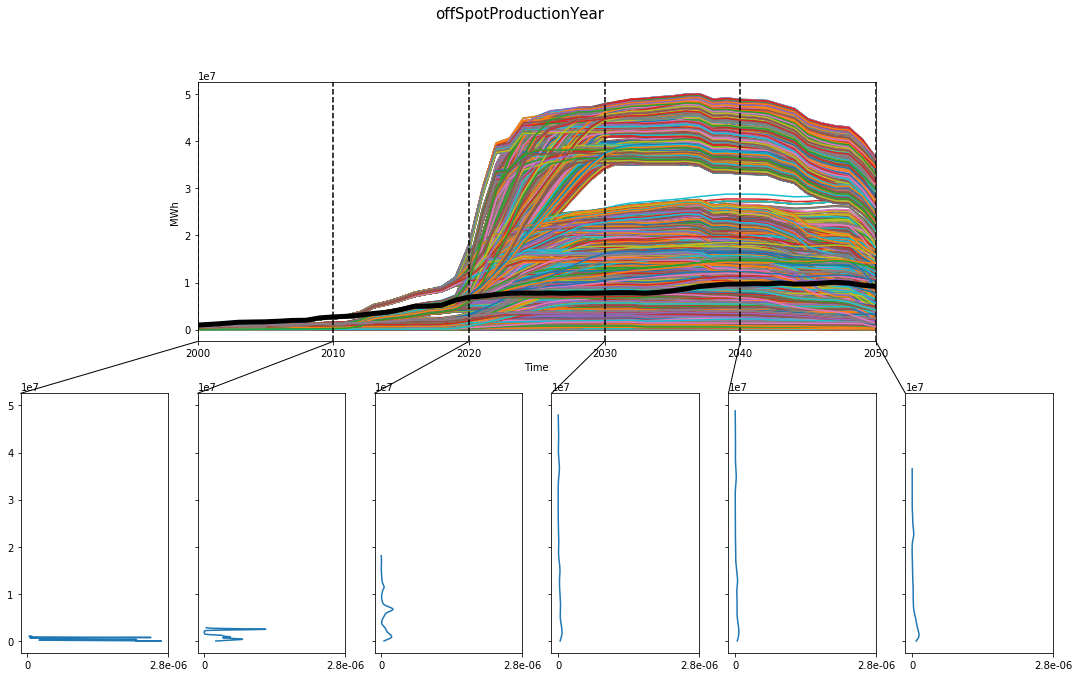

In [110]:
from EMAworkbench.ema_workbench.analysis.plotting import multiple_densities, PlotType
from EMAworkbench.ema_workbench.analysis.plotting_util import Density

fig, ax_env = multiple_densities(experiments, outcomes_filtered, outcomes_to_show = ooi,
                                 points_in_time=points_of_interest,  density = Density.KDE,
                                 grouping_specifiers=None , titles={ooi}, ylabels={ooi: "MWh"}, legend=True,
                                 fill=False, plot_type=PlotType.ENV_LIN)

#Change x labels to years
ax_env[ooi]['main plot'].set_xticklabels(time[range(0,len(time),10)])
#Add BAU in the plot with a black wide line
ax_env[ooi]['main plot'].plot(outcomes_filtered[ooi][-1], 'k-',linewidth=5 )

fig[0].suptitle("{}".format(ooi), fontsize=15)
fig[0].set_size_inches(18.5, 10.5)

plt.savefig('{}/fig{}.png'.format(r'C:\\Users\\angel\\Documents\\GitHub\\gr4sp\\experiments\\notebookGr4sp\\outputs\\figs', '_envelope_line_density_%s'%(ooi)),
                dpi=300, bbox_inches='tight')

Densities (PDF): {}
% in Bin: {'0.0 to 97193.5': '25.8%', '97193.5 to 194387.0': '5.6%', '194387.0 to 291580.6': '11.7%', '291580.6 to 388774.1': '14.2%', '388774.1 to 485967.6': '3.0%', '485967.6 to 583161.1': '6.0%', '583161.1 to 680354.7': '0.3%', '680354.7 to 777548.2': '23.6%', '777548.2 to 874741.7': '8.3%', '874741.7 to 971935.2': '0.7%', '971935.2 to 1069128.7': '0.9%'}

Densities (PDF): {}
% in Bin: {'475.4 to 257009.1': '11.3%', '257009.1 to 513542.8': '20.9%', '513542.8 to 770076.5': '10.4%', '770076.5 to 1026610.2': '13.7%', '1026610.2 to 1283143.9': '10.0%', '1283143.9 to 1539677.6': '0.4%', '1539677.6 to 1796211.3': '0.0%', '1796211.3 to 2052745.0': '0.0%', '2052745.0 to 2309278.7': '0.0%', '2309278.7 to 2565812.4': '31.0%', '2565812.4 to 2822346.1': '2.3%'}

Densities (PDF): {}
% in Bin: {'13267.8 to 1658344.7': '29.7%', '1658344.7 to 3303421.5': '14.6%', '3303421.5 to 4948498.4': '2.0%', '4948498.4 to 6593575.2': '16.8%', '6593575.2 to 8238652.0': '21.9%', '8238652.0 to

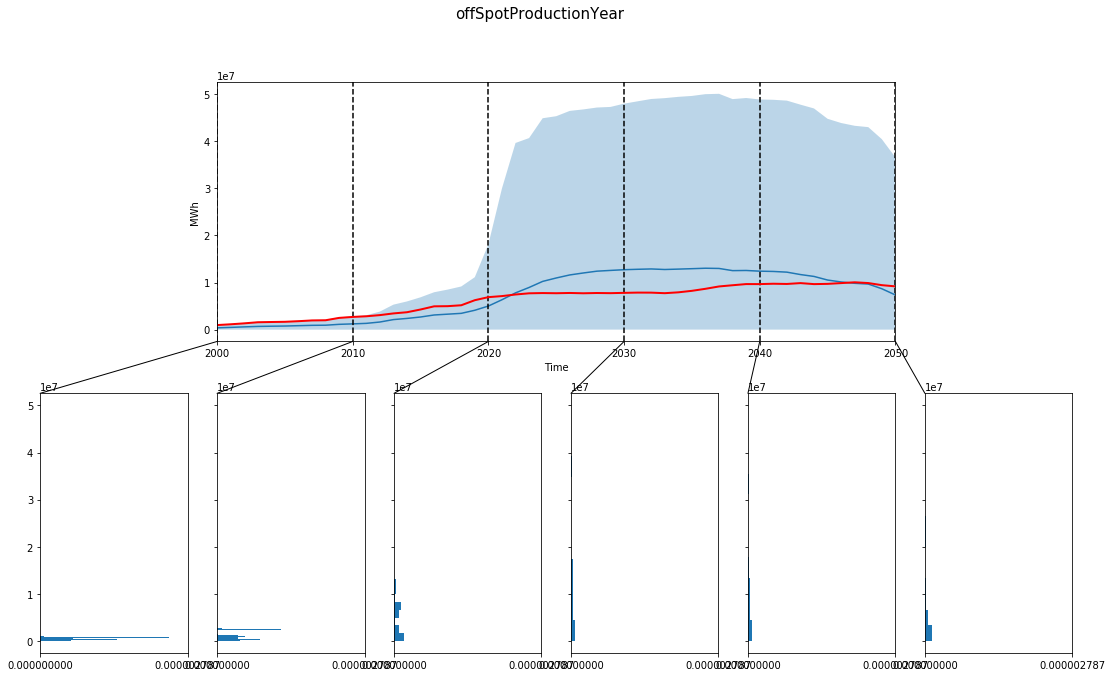

In [111]:
from EMAworkbench.ema_workbench.analysis.plotting import multiple_densities, PlotType
from EMAworkbench.ema_workbench.analysis.plotting_util import Density

fig, ax_env = multiple_densities(experiments, outcomes_filtered, outcomes_to_show = ooi,
                                 points_in_time=points_of_interest,  density = Density.HIST,
                                 grouping_specifiers=None , titles={ooi}, ylabels={ooi: "MWh"}, legend=True,
                                 fill=True, plot_type=PlotType.ENVELOPE)

#Change x labels to years
ax_env[ooi]['main plot'].set_xticklabels(time[range(0,len(time),10)])
#Add BAU in the plot with a red wide line
ax_env[ooi]['main plot'].plot(outcomes_filtered[ooi][-1], 'r-',linewidth=2 )

fig[0].suptitle("{}".format(ooi), fontsize=15)
fig[0].set_size_inches(18.5, 10.5)

plt.savefig('{}/fig{}.png'.format(r'C:\\Users\\angel\\Documents\\GitHub\\gr4sp\\experiments\\notebookGr4sp\\outputs\\figs', '_envelope_density_%s'%(ooi)),
                dpi=300, bbox_inches='tight')

In [ ]:
from EMAworkbench.ema_workbench.analysis import prim
from EMAworkbench.ema_workbench.util import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO);
 
x = exp
#y = out_avg_ooi > 40000000
y = target_at_year( outcomes_filtered, ooi, 2035, 40000000, False) #False is below target

prim_alg = prim.Prim(x, y, threshold=0.3)
box1 = prim_alg.find_box()

In [ ]:
box1.inspect_tradeoff()

In [ ]:
%matplotlib inline
box_1 = box1.inspect(2)
box_1 = box1.inspect(2, style='graph')

In [ ]:
box1.select(2)
fig = box1.show_pairs_scatter(2)
plt.show()

## Renewable Energies in the System

In [160]:
# Subset Sool levers/uncertainties

selected_uncertainties = uncertainties

ooi = 'renewableContributionYear'
data = outcomes_filtered[ooi]

num_exp = len(data)
out_avg_ooi = np.zeros(num_exp)

for i in range(num_exp):
    out_avg_ooi[i] = data[i].mean()

exp = pd.DataFrame(experiments)

exp = exp.loc[ :, selected_uncertainties] 

### Open Exploration: Visual Analysis

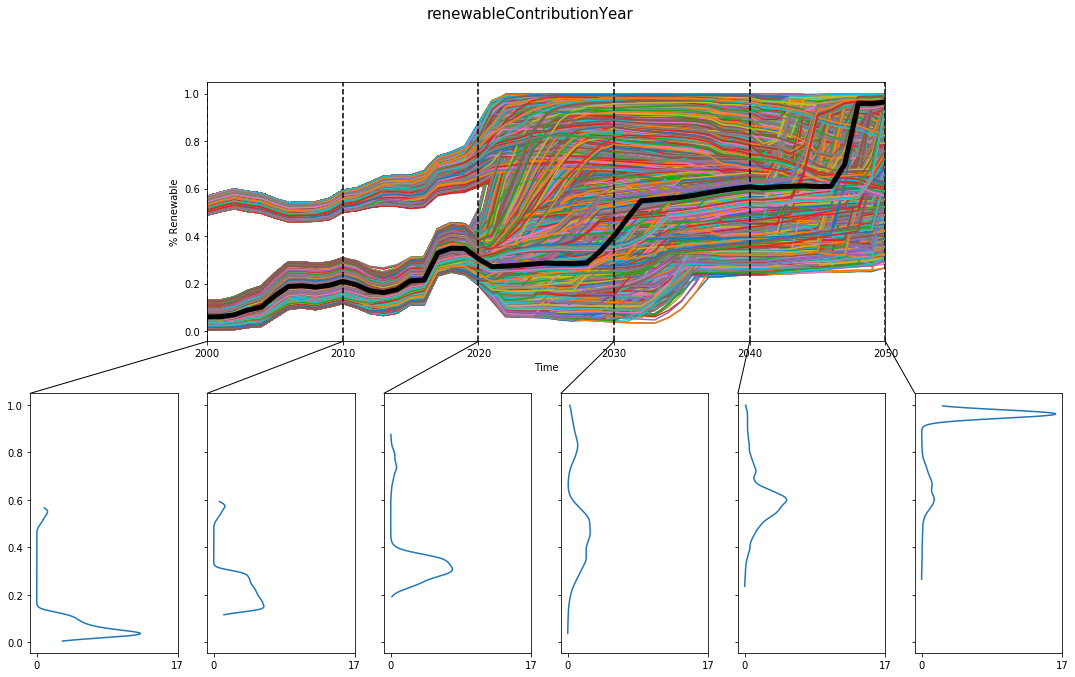

In [114]:
from EMAworkbench.ema_workbench.analysis.plotting import multiple_densities, PlotType
from EMAworkbench.ema_workbench.analysis.plotting_util import Density

fig, ax_env = multiple_densities(experiments, outcomes_filtered, outcomes_to_show = ooi,
                                 points_in_time=points_of_interest,  density = Density.KDE,
                                 grouping_specifiers=None , titles={ooi}, ylabels={ooi: "% Renewable"}, legend=True,
                                 fill=False, plot_type=PlotType.ENV_LIN)

#Change x labels to years
ax_env[ooi]['main plot'].set_xticklabels(time[range(0,len(time),10)])
#Add BAU in the plot with a black wide line
ax_env[ooi]['main plot'].plot(outcomes_filtered[ooi][-1], 'k-',linewidth=5 )

fig[0].suptitle("{}".format(ooi), fontsize=15)
fig[0].set_size_inches(18.5, 10.5)

plt.savefig('{}/fig{}.png'.format(r'C:\\Users\\angel\\Documents\\GitHub\\gr4sp\\experiments\\notebookGr4sp\\outputs\\figs', '_envelope_line_density_%s'%(ooi)),
                dpi=300, bbox_inches='tight')

Densities (PDF): {'0.0 to 0.1': '10.529', '0.1 to 0.1': '5.909', '0.1 to 0.2': '1.555', '0.5 to 0.5': '0.296', '0.5 to 0.6': '1.329'}
% in Bin: {'0.0 to 0.1': '53.7%', '0.1 to 0.1': '30.1%', '0.1 to 0.2': '7.9%', '0.2 to 0.2': '0.0%', '0.2 to 0.3': '0.0%', '0.3 to 0.3': '0.0%', '0.3 to 0.4': '0.0%', '0.4 to 0.4': '0.0%', '0.4 to 0.5': '0.0%', '0.5 to 0.5': '1.5%', '0.5 to 0.6': '6.8%'}

Densities (PDF): {'0.1 to 0.2': '4.871', '0.2 to 0.2': '4.990', '0.2 to 0.3': '4.407', '0.3 to 0.3': '1.281', '0.5 to 0.5': '0.579', '0.5 to 0.6': '1.314'}
% in Bin: {'0.1 to 0.2': '21.1%', '0.2 to 0.2': '21.6%', '0.2 to 0.3': '19.1%', '0.3 to 0.3': '5.5%', '0.3 to 0.4': '0.0%', '0.4 to 0.4': '0.0%', '0.4 to 0.5': '0.0%', '0.5 to 0.5': '2.5%', '0.5 to 0.6': '5.7%'}

Densities (PDF): {'0.2 to 0.3': '1.803', '0.3 to 0.3': '6.222', '0.3 to 0.4': '6.162', '0.4 to 0.4': '0.573', '0.4 to 0.5': '0.004', '0.5 to 0.6': '0.002', '0.6 to 0.6': '0.015', '0.6 to 0.7': '0.157', '0.7 to 0.8': '0.565', '0.8 to 0.8': '0

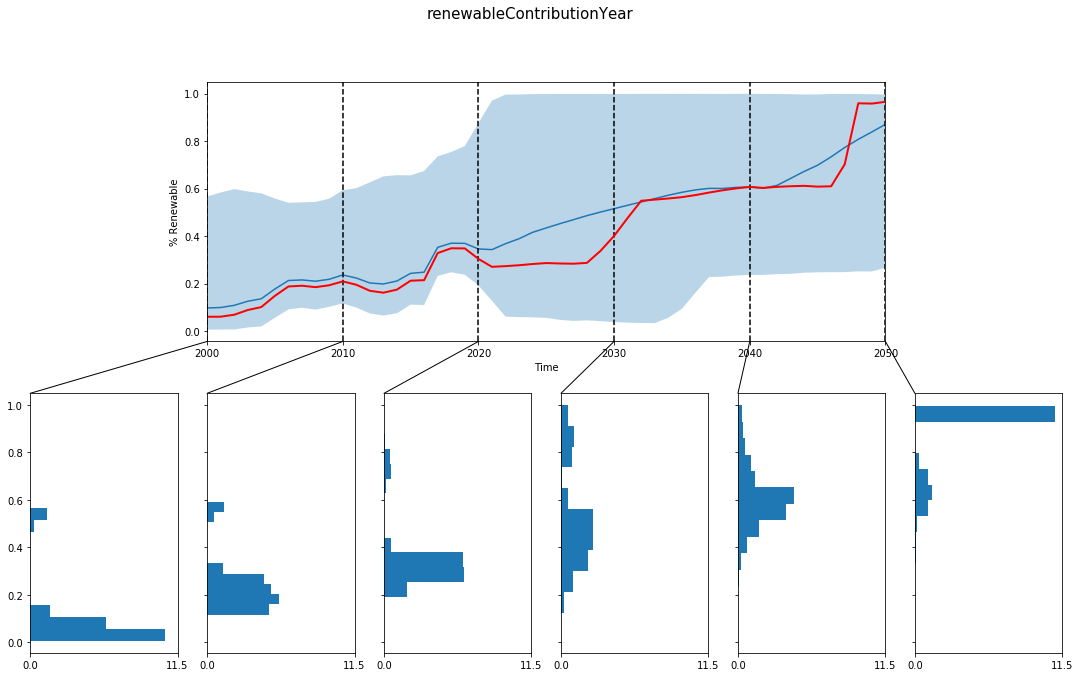

In [115]:
from EMAworkbench.ema_workbench.analysis.plotting import multiple_densities, PlotType
from EMAworkbench.ema_workbench.analysis.plotting_util import Density

fig, ax_env = multiple_densities(experiments, outcomes_filtered, outcomes_to_show = ooi,
                                 points_in_time=points_of_interest,  density = Density.HIST,
                                 grouping_specifiers=None , titles={ooi}, ylabels={ooi: "% Renewable"}, legend=True,
                                 fill=True, plot_type=PlotType.ENVELOPE)

#Change x labels to years
ax_env[ooi]['main plot'].set_xticklabels(time[range(0,len(time),10)])
#Add BAU in the plot with a red wide line
ax_env[ooi]['main plot'].plot(outcomes_filtered[ooi][-1], 'r-',linewidth=2 )

fig[0].suptitle("{}".format(ooi), fontsize=15)
fig[0].set_size_inches(18.5, 10.5)

plt.savefig('{}/fig{}.png'.format(r'C:\\Users\\angel\\Documents\\GitHub\\gr4sp\\experiments\\notebookGr4sp\\outputs\\figs', '_envelope_density_%s'%(ooi)),
                dpi=300, bbox_inches='tight')

In [163]:
from EMAworkbench.ema_workbench.analysis import prim
from EMAworkbench.ema_workbench.util import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO);
 
x = exp
#y = out_avg_ooi > 40000000
y = target_at_year( outcomes_filtered, ooi, 2025, 0.4, False) #False is below target

prim_alg = prim.Prim(x, y, threshold=0.3)
box1 = prim_alg.find_box()

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] 130001 points remaining, containing 78263 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.08488396243105822, coverage: 0.14099893947331435, density: 1.0 restricted_dimensions: 10


In [164]:
box1.inspect_tradeoff()

alt.VConcatChart(...)

coverage    0.619399
density     0.899036
id                 3
mass        0.414766
mean        0.899036
res_dim            3
Name: 3, dtype: object

                           box 3                                     
                             min   max                      qp values
nonScheduleGenSpotMarket     8.0   9.5                    [-1.0, 0.0]
semiScheduleGenSpotMarket    8.0   9.5                    [-1.0, 0.0]
priceChangePercentageWater -26.5  30.0  [6.603147467956368e-78, -1.0]



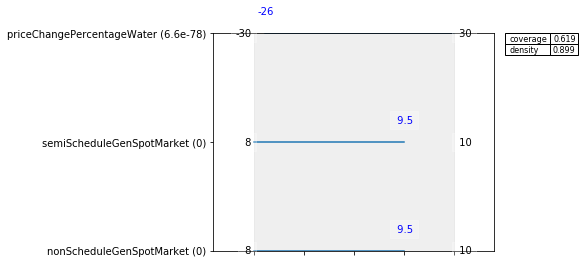

In [181]:
#%matplotlib inline
selected_box = 3

box_1 = box1.inspect(selected_box)
box_1 = box1.inspect(selected_box, style='graph')


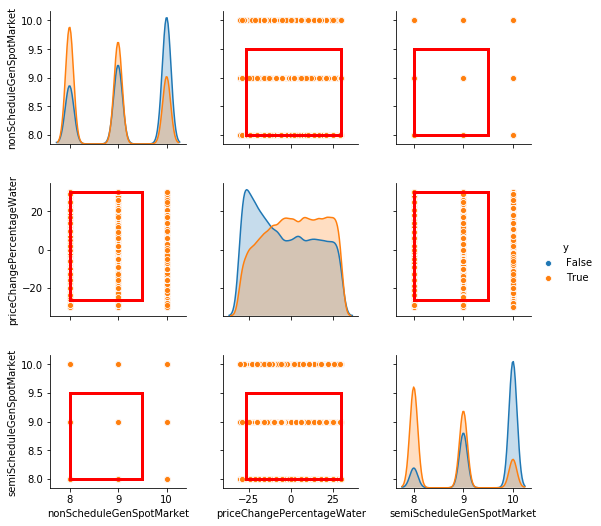

In [182]:
box1.select(selected_box)
fig = box1.show_pairs_scatter(selected_box)
plt.show()

### Feature Scoring

In [174]:
from EMAworkbench.ema_workbench.analysis import feature_scoring

fs, alg = feature_scoring.get_ex_feature_scores(x, y, mode=feature_scoring.RuleInductionType.CLASSIFICATION)
fs.sort_values(ascending=False, by=1)



[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category


1
0                                       
semiScheduleGenSpotMarket       0.373941
nonScheduleGenSpotMarket        0.141363
generationRolloutPeriod         0.081688
priceChangePercentageWater      0.062490
includePublicallyAnnouncedGen   0.054581
priceChangePercentageBrownCoal  0.049735
domesticConsumptionPercentage   0.026635
capacityFactorChangeBrownCoal   0.025096
generatorRetirement             0.021531
capacityFactorChangeWater       0.018816
semiScheduleMinCapMarketGen     0.016801
nonScheduleMinCapMarketGen      0.013654
consumption                     0.012879
rooftopPV                       0.012113
priceChangePercentageOcgt       0.011773
learningCurve                   0.011664
capacityFactorChangeOcgt        0.011318
annualCpi                       0.011006
energyEfficiency                0.010943
annualInflation                 0.010838
scheduleMinCapMarketGen         0.010718
priceChangePercentageWind       0.010416

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category


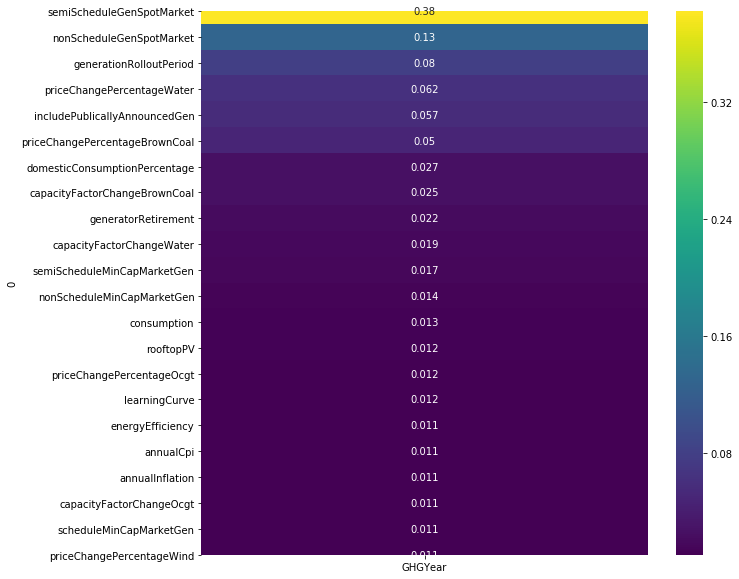

In [175]:
x = exp
y_all = {}

#plot using ALL simulations
#y_all['GHGYear'] = data

#plot using average of ALL simulations
#y_all['GHGYear'] = out_avg_ooi

#Plot using only target simulations
y_all['GHGYear'] = y

fig, ax = plt.subplots(figsize=(10,10))
fs = feature_scoring.get_feature_scores_all(x, y_all)
sns.heatmap(fs, cmap='viridis', annot=True, ax=ax)
plt.show()

### Dimensional Stacking


[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category


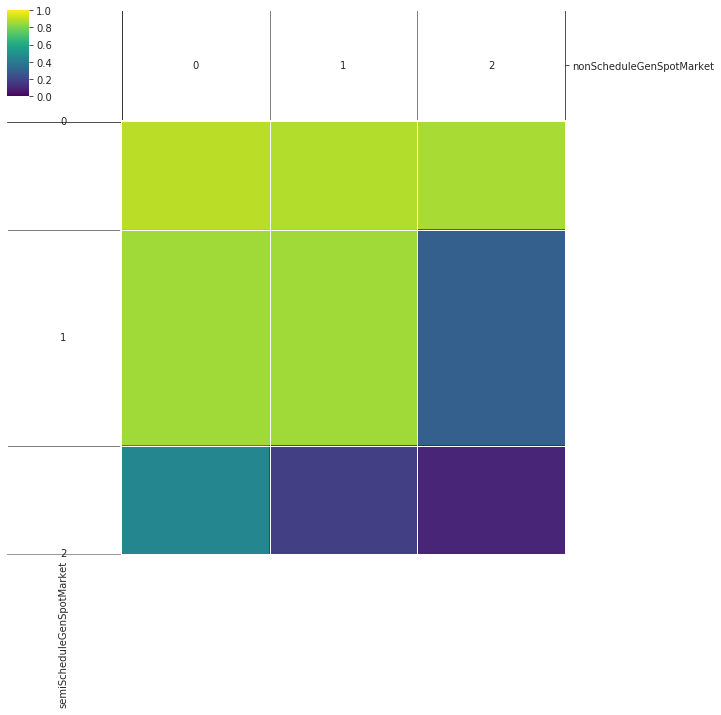

In [180]:

from EMAworkbench.ema_workbench.analysis import dimensional_stacking

x = exp
dimensional_stacking.create_pivot_plot(x,y, 1, nbins=3)
plt.show()



## Coal Production

In [116]:
# Subset Sool levers/uncertainties
selected_uncertainties = uncertainties

ooi = 'coalProductionYear'
data = outcomes_filtered[ooi]

num_exp = len(data)
out_avg_ooi = np.zeros(num_exp)

for i in range(num_exp):
    out_avg_ooi[i] = data[i].mean()

exp = pd.DataFrame(experiments)

exp = exp.loc[ :, selected_uncertainties] 

### Open Exploration: Visual Analysis

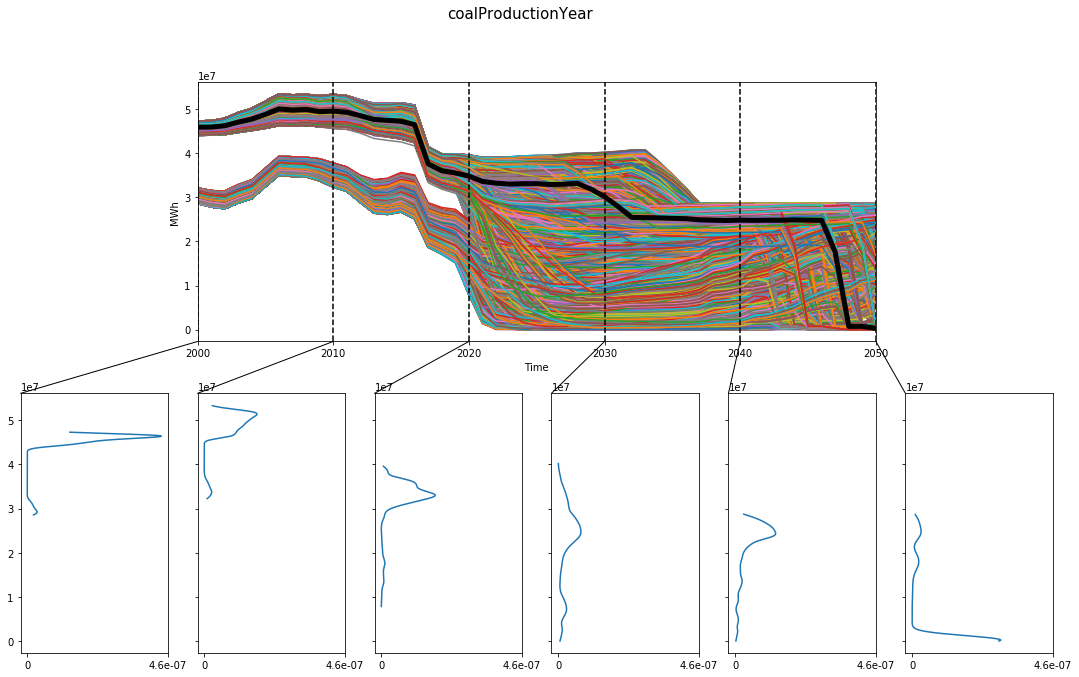

In [117]:
from EMAworkbench.ema_workbench.analysis.plotting import multiple_densities, PlotType
from EMAworkbench.ema_workbench.analysis.plotting_util import Density

fig, ax_env = multiple_densities(experiments, outcomes_filtered, outcomes_to_show = ooi,
                                 points_in_time=points_of_interest,  density = Density.KDE,
                                 grouping_specifiers=None , titles={ooi}, ylabels={ooi: "MWh"}, legend=True,
                                 fill=False, plot_type=PlotType.ENV_LIN)

#Change x labels to years
ax_env[ooi]['main plot'].set_xticklabels(time[range(0,len(time),10)])
#Add BAU in the plot with a black wide line
ax_env[ooi]['main plot'].plot(outcomes_filtered[ooi][-1], 'k-',linewidth=5 )


fig[0].suptitle("{}".format(ooi), fontsize=15)
fig[0].set_size_inches(18.5, 10.5)

plt.savefig('{}/fig{}.png'.format(r'C:\\Users\\angel\\Documents\\GitHub\\gr4sp\\experiments\\notebookGr4sp\\outputs\\figs', '_envelope_line_density_%s'%(ooi)),
                dpi=300, bbox_inches='tight')

Densities (PDF): {}
% in Bin: {'28573925.3 to 30277265.4': '5.5%', '30277265.4 to 31980605.6': '2.6%', '31980605.6 to 33683945.8': '0.2%', '33683945.8 to 35387286.0': '0.0%', '35387286.0 to 37090626.2': '0.0%', '37090626.2 to 38793966.4': '0.0%', '38793966.4 to 40497306.6': '0.0%', '40497306.6 to 42200646.8': '0.0%', '42200646.8 to 43903986.9': '0.0%', '43903986.9 to 45607327.1': '27.2%', '45607327.1 to 47310667.3': '64.5%'}

Densities (PDF): {}
% in Bin: {'32265185.4 to 34178723.9': '4.3%', '34178723.9 to 36092262.3': '3.3%', '36092262.3 to 38005800.8': '0.7%', '38005800.8 to 39919339.3': '0.0%', '39919339.3 to 41832877.8': '0.0%', '41832877.8 to 43746416.3': '0.0%', '43746416.3 to 45659954.8': '0.0%', '45659954.8 to 47573493.3': '15.4%', '47573493.3 to 49487031.8': '24.2%', '49487031.8 to 51400570.3': '30.3%', '51400570.3 to 53314108.8': '21.8%'}

Densities (PDF): {}
% in Bin: {'7826693.6 to 10715918.0': '0.2%', '10715918.0 to 13605142.4': '1.4%', '13605142.4 to 16494366.8': '2.1%', 

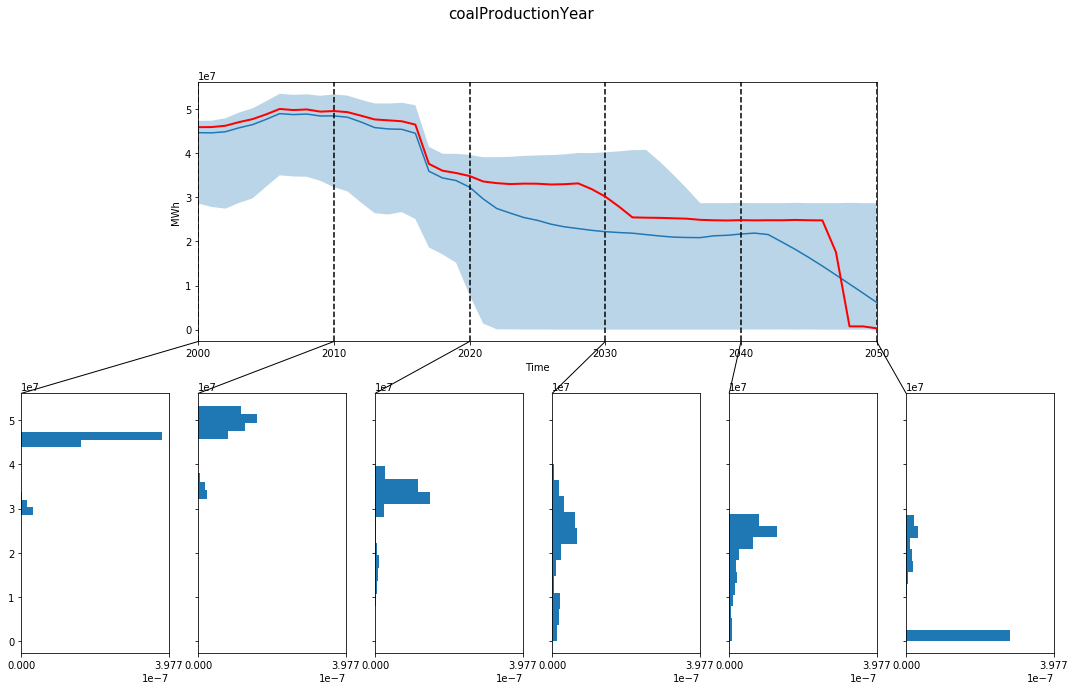

In [118]:
from EMAworkbench.ema_workbench.analysis.plotting import multiple_densities, PlotType
from EMAworkbench.ema_workbench.analysis.plotting_util import Density

fig, ax_env = multiple_densities(experiments, outcomes_filtered, outcomes_to_show = ooi,
                                 points_in_time=points_of_interest,  density = Density.HIST,
                                 grouping_specifiers=None , titles={ooi}, ylabels={ooi: "MWh"}, legend=True,
                                 fill=True, plot_type=PlotType.ENVELOPE)

#Change x labels to years
ax_env[ooi]['main plot'].set_xticklabels(time[range(0,len(time),10)])
#Add BAU in the plot with a red wide line
ax_env[ooi]['main plot'].plot(outcomes_filtered[ooi][-1], 'r-',linewidth=2 )

fig[0].suptitle("{}".format(ooi), fontsize=15)
fig[0].set_size_inches(18.5, 10.5)

plt.savefig('{}/fig{}.png'.format(r'C:\\Users\\angel\\Documents\\GitHub\\gr4sp\\experiments\\notebookGr4sp\\outputs\\figs', '_envelope_density_%s'%(ooi)),
                dpi=300, bbox_inches='tight')

In [ ]:
from EMAworkbench.ema_workbench.analysis import prim
from EMAworkbench.ema_workbench.util import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO);
 
x = exp
#y = out_avg_ooi > 40000000
y = target_at_year( outcomes_filtered, ooi, 2035, 40000000, False) #False is below target

prim_alg = prim.Prim(x, y, threshold=0.3)
box1 = prim_alg.find_box()

In [ ]:
box1.inspect_tradeoff()

In [ ]:
%matplotlib inline
box_1 = box1.inspect(2)
box_1 = box1.inspect(2, style='graph')

In [ ]:
box1.select(2)
fig = box1.show_pairs_scatter(2)
plt.show()

## Water Production

In [119]:
# Subset Sool levers

selected_uncertainties = uncertainties

ooi = 'waterProductionYear'
data = outcomes_filtered[ooi]

num_exp = len(data)
out_avg_ooi = np.zeros(num_exp)

for i in range(num_exp):
    out_avg_ooi[i] = data[i].mean()

exp = pd.DataFrame(experiments)

exp = exp.loc[ :, selected_uncertainties] 

### Open Exploration: Visual Analysis

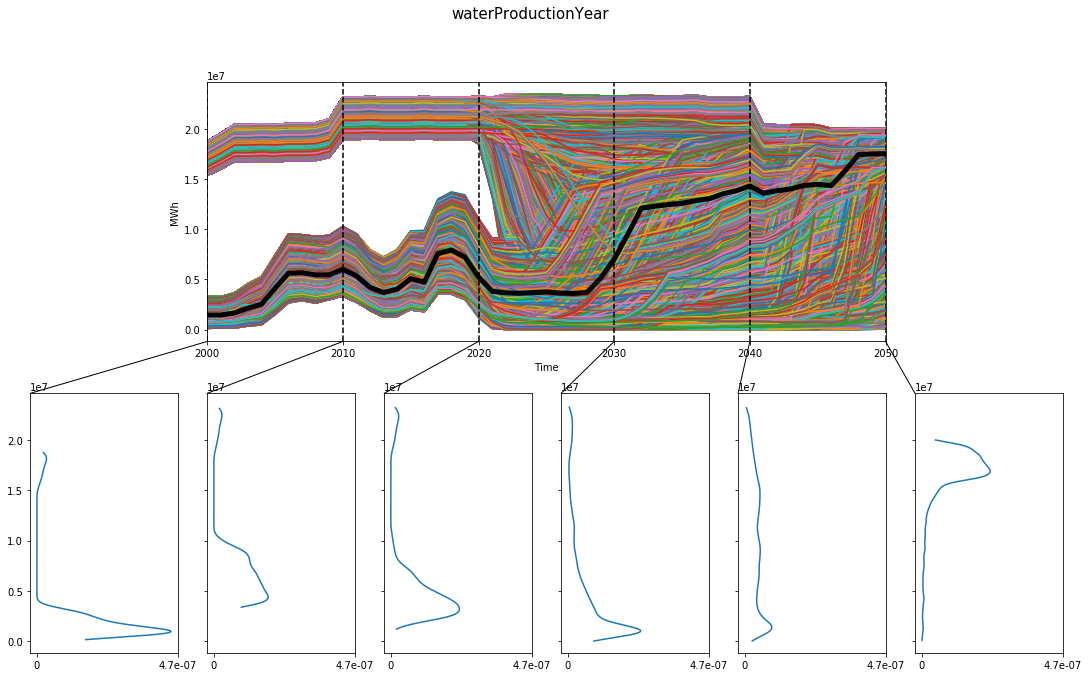

In [120]:
from EMAworkbench.ema_workbench.analysis.plotting import multiple_densities, PlotType
from EMAworkbench.ema_workbench.analysis.plotting_util import Density

fig, ax_env = multiple_densities(experiments, outcomes_filtered, outcomes_to_show = ooi,
                                 points_in_time=points_of_interest,  density = Density.KDE,
                                 grouping_specifiers=None , titles={ooi}, ylabels={ooi: "MWh"}, legend=True,
                                 fill=False, plot_type=PlotType.ENV_LIN)

#Change x labels to years
ax_env[ooi]['main plot'].set_xticklabels(time[range(0,len(time),10)])
#Add BAU in the plot with a black wide line
ax_env[ooi]['main plot'].plot(outcomes_filtered[ooi][-1], 'k-',linewidth=5 )

fig[0].suptitle("{}".format(ooi), fontsize=15)
fig[0].set_size_inches(18.5, 10.5)

plt.savefig('{}/fig{}.png'.format(r'C:\\Users\\angel\\Documents\\GitHub\\gr4sp\\experiments\\notebookGr4sp\\outputs\\figs', '_envelope_line_density_%s'%(ooi)),
                dpi=300, bbox_inches='tight')

Densities (PDF): {}
% in Bin: {'140407.4 to 1832817.8': '64.9%', '1832817.8 to 3525228.2': '26.8%', '3525228.2 to 5217638.5': '0.0%', '5217638.5 to 6910048.9': '0.0%', '6910048.9 to 8602459.3': '0.0%', '8602459.3 to 10294869.6': '0.0%', '10294869.6 to 11987280.0': '0.0%', '11987280.0 to 13679690.3': '0.0%', '13679690.3 to 15372100.7': '0.2%', '15372100.7 to 17064511.1': '2.6%', '17064511.1 to 18756921.4': '5.5%'}

Densities (PDF): {}
% in Bin: {'3368629.5 to 5167079.4': '33.1%', '5167079.4 to 6965529.4': '27.1%', '6965529.4 to 8763979.3': '21.6%', '8763979.3 to 10562429.3': '9.8%', '10562429.3 to 12360879.2': '0.0%', '12360879.2 to 14159329.1': '0.0%', '14159329.1 to 15957779.1': '0.0%', '15957779.1 to 17756229.0': '0.0%', '17756229.0 to 19554679.0': '0.4%', '19554679.0 to 21353128.9': '2.8%', '21353128.9 to 23151578.9': '5.1%'}

Densities (PDF): {}
% in Bin: {'1180111.1 to 3183826.7': '28.7%', '3183826.7 to 5187542.2': '39.2%', '5187542.2 to 7191257.8': '17.8%', '7191257.8 to 9194973.

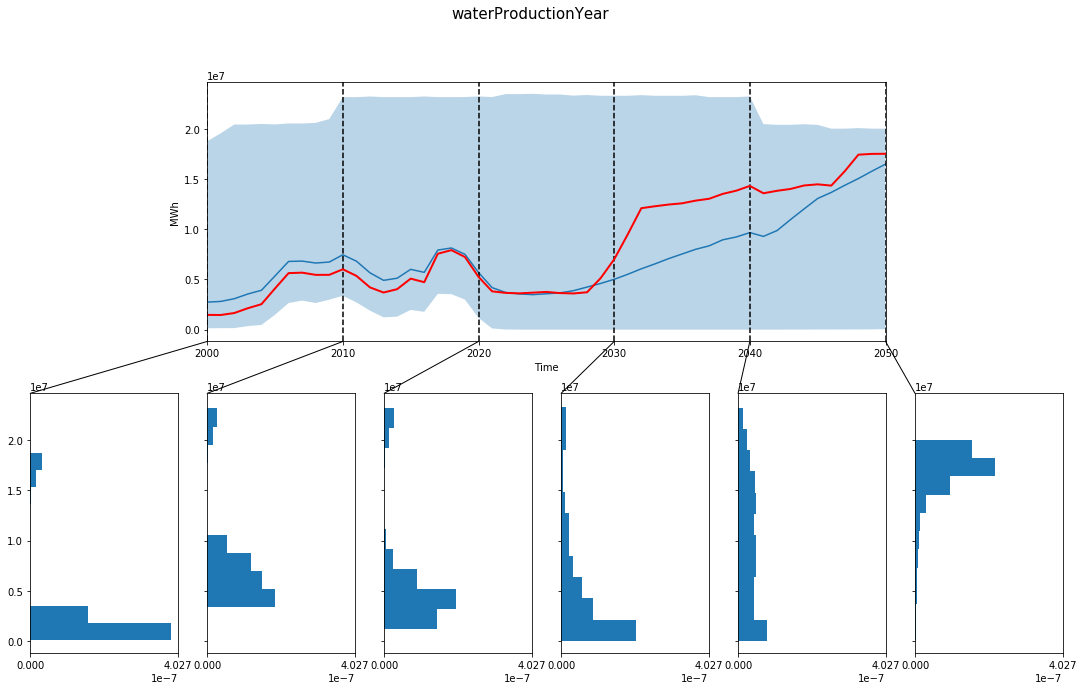

In [121]:
from EMAworkbench.ema_workbench.analysis.plotting import multiple_densities, PlotType
from EMAworkbench.ema_workbench.analysis.plotting_util import Density

fig, ax_env = multiple_densities(experiments, outcomes_filtered, outcomes_to_show = ooi,
                                 points_in_time=points_of_interest,  density = Density.HIST,
                                 grouping_specifiers=None , titles={ooi}, ylabels={ooi: "MWh"}, legend=True,
                                 fill=True, plot_type=PlotType.ENVELOPE)

#Change x labels to years
ax_env[ooi]['main plot'].set_xticklabels(time[range(0,len(time),10)])
#Add BAU in the plot with a red wide line
ax_env[ooi]['main plot'].plot(outcomes_filtered[ooi][-1], 'r-',linewidth=2 )

fig[0].suptitle("{}".format(ooi), fontsize=15)
fig[0].set_size_inches(18.5, 10.5)

plt.savefig('{}/fig{}.png'.format(r'C:\\Users\\angel\\Documents\\GitHub\\gr4sp\\experiments\\notebookGr4sp\\outputs\\figs', '_envelope_density_%s'%(ooi)),
                dpi=300, bbox_inches='tight')

In [ ]:
from EMAworkbench.ema_workbench.analysis import prim
from EMAworkbench.ema_workbench.util import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO);
 
x = exp
#y = out_avg_ooi > 40000000
y = target_at_year( outcomes_filtered, ooi, 2035, 40000000, False) #False is below target

prim_alg = prim.Prim(x, y, threshold=0.3)
box1 = prim_alg.find_box()

In [ ]:
box1.inspect_tradeoff()

In [ ]:
%matplotlib inline
box_1 = box1.inspect(2)
box_1 = box1.inspect(2, style='graph')

In [ ]:
box1.select(2)
fig = box1.show_pairs_scatter(2)
plt.show()

## Wind Production

In [122]:
# Subset Sool levers
selected_uncertainties = uncertainties

ooi = 'windProductionYear'
data = outcomes_filtered[ooi]

num_exp = len(data)
out_avg_ooi = np.zeros(num_exp)

for i in range(num_exp):
    out_avg_ooi[i] = data[i].mean()

exp = pd.DataFrame(experiments)

exp = exp.loc[ :, selected_uncertainties] 

### Open Exploration: Visual Analysis

singular matrix


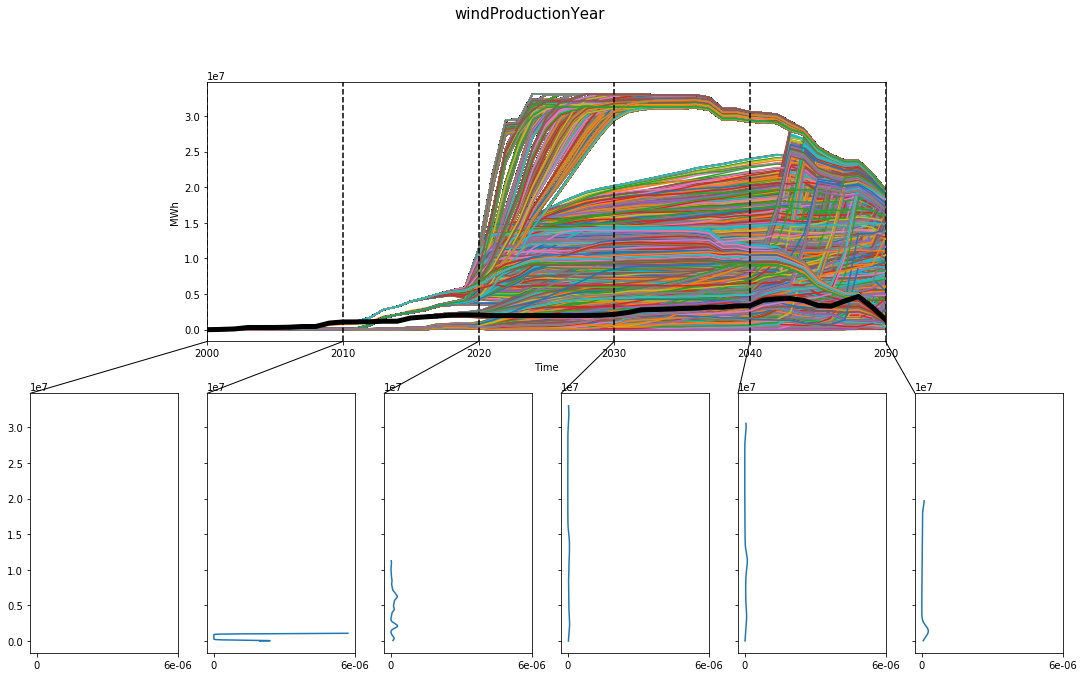

In [123]:
from EMAworkbench.ema_workbench.analysis.plotting import multiple_densities, PlotType
from EMAworkbench.ema_workbench.analysis.plotting_util import Density

fig, ax_env = multiple_densities(experiments, outcomes_filtered, outcomes_to_show = ooi,
                                 points_in_time=points_of_interest,  density = Density.KDE,
                                 grouping_specifiers=None , titles={ooi}, ylabels={ooi: "MWh"}, legend=True,
                                 fill=False, plot_type=PlotType.ENV_LIN)

#Change x labels to years
ax_env[ooi]['main plot'].set_xticklabels(time[range(0,len(time),10)])
#Add BAU in the plot with a black wide line
ax_env[ooi]['main plot'].plot(outcomes_filtered[ooi][-1], 'k-',linewidth=5 )

fig[0].suptitle("{}".format(ooi), fontsize=15)
fig[0].set_size_inches(18.5, 10.5)

plt.savefig('{}/fig{}.png'.format(r'C:\\Users\\angel\\Documents\\GitHub\\gr4sp\\experiments\\notebookGr4sp\\outputs\\figs', '_envelope_line_density_%s'%(ooi)),
                dpi=300, bbox_inches='tight')

singular matrix


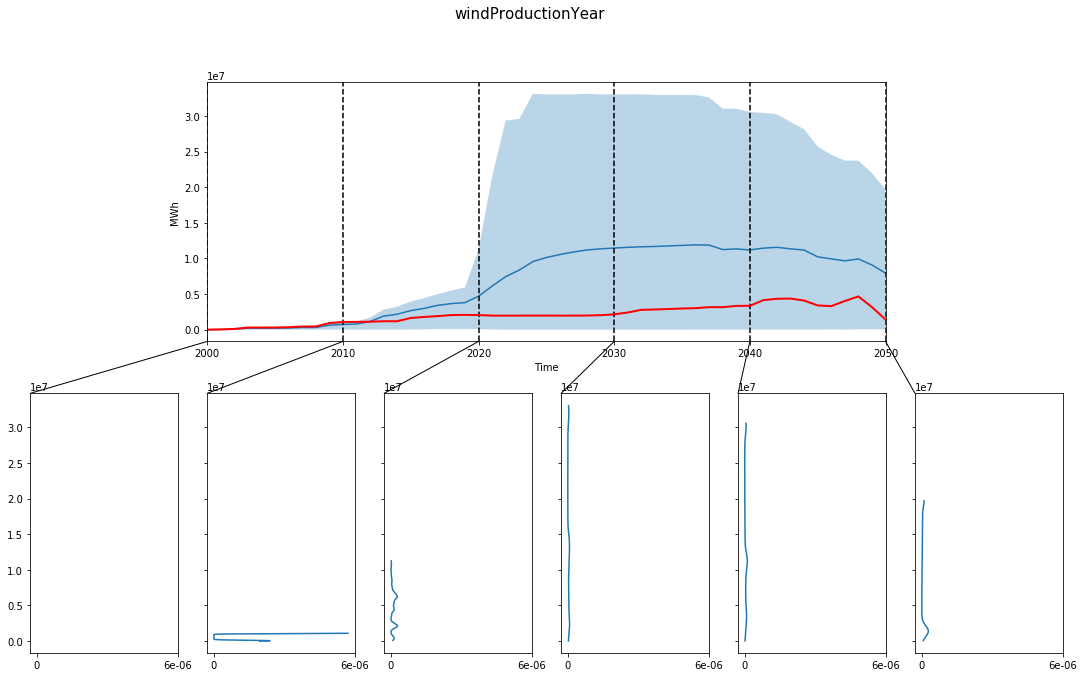

In [124]:
from EMAworkbench.ema_workbench.analysis.plotting import multiple_densities, PlotType
from EMAworkbench.ema_workbench.analysis.plotting_util import Density

fig, ax_env = multiple_densities(experiments, outcomes_filtered, outcomes_to_show = ooi,
                                 points_in_time=points_of_interest,  density = Density.KDE,
                                 grouping_specifiers=None , titles={ooi}, ylabels={ooi: "MWh"}, legend=True,
                                 fill=True, plot_type=PlotType.ENVELOPE)

#Change x labels to years
ax_env[ooi]['main plot'].set_xticklabels(time[range(0,len(time),10)])
#Add BAU in the plot with a red wide line
ax_env[ooi]['main plot'].plot(outcomes_filtered[ooi][-1], 'r-',linewidth=2 )

fig[0].suptitle("{}".format(ooi), fontsize=15)
fig[0].set_size_inches(18.5, 10.5)

plt.savefig('{}/fig{}.png'.format(r'C:\\Users\\angel\\Documents\\GitHub\\gr4sp\\experiments\\notebookGr4sp\\outputs\\figs', '_envelope_density_%s'%(ooi)),
                dpi=300, bbox_inches='tight')

In [ ]:
from EMAworkbench.ema_workbench.analysis import prim
from EMAworkbench.ema_workbench.util import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO);
 
x = exp
#y = out_avg_ooi > 40000000
y = target_at_year( outcomes_filtered, ooi, 2035, 40000000, False) #False is below target

prim_alg = prim.Prim(x, y, threshold=0.3)
box1 = prim_alg.find_box()

In [ ]:
box1.inspect_tradeoff()

In [ ]:
%matplotlib inline
box_1 = box1.inspect(2)
box_1 = box1.inspect(2, style='graph')

In [ ]:
box1.select(2)
fig = box1.show_pairs_scatter(2)
plt.show()

## Gas Production

In [125]:
# Subset Sool levers
selected_uncertainties = list(['annualCpi','priceChangePercentageWind','priceChangePercentageWater',
                        'semiScheduleMinCapMarketGen'])    

selected_uncertainties = uncertainties

ooi = 'gasProductionYear'
data = outcomes_filtered[ooi]

num_exp = len(data)
out_avg_ooi = np.zeros(num_exp)

for i in range(num_exp):
    out_avg_ooi[i] = data[i].mean()

exp = pd.DataFrame(experiments)

exp = exp.loc[ :, selected_uncertainties] 

### Open Exploration: Visual Analysis

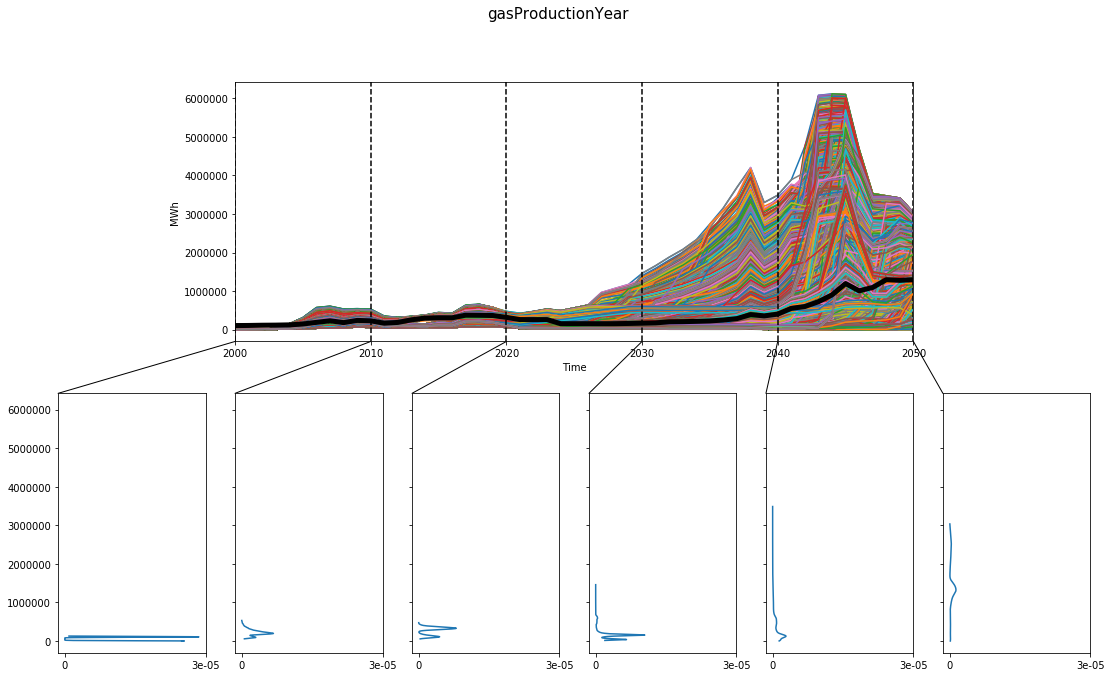

In [126]:
from EMAworkbench.ema_workbench.analysis.plotting import multiple_densities, PlotType
from EMAworkbench.ema_workbench.analysis.plotting_util import Density

fig, ax_env = multiple_densities(experiments, outcomes_filtered, outcomes_to_show = ooi,
                                 points_in_time=points_of_interest,  density = Density.KDE,
                                 grouping_specifiers=None , titles={ooi}, ylabels={ooi: "MWh"}, legend=True,
                                 fill=False, plot_type=PlotType.ENV_LIN)

#Change x labels to years
ax_env[ooi]['main plot'].set_xticklabels(time[range(0,len(time),10)])
#Add BAU in the plot with a black wide line
ax_env[ooi]['main plot'].plot(outcomes_filtered[ooi][-1], 'k-',linewidth=5 )

fig[0].suptitle("{}".format(ooi), fontsize=15)
fig[0].set_size_inches(18.5, 10.5)

plt.savefig('{}/fig{}.png'.format(r'C:\\Users\\angel\\Documents\\GitHub\\gr4sp\\experiments\\notebookGr4sp\\outputs\\figs', '_envelope_line_density_%s'%(ooi)),
                dpi=300, bbox_inches='tight')

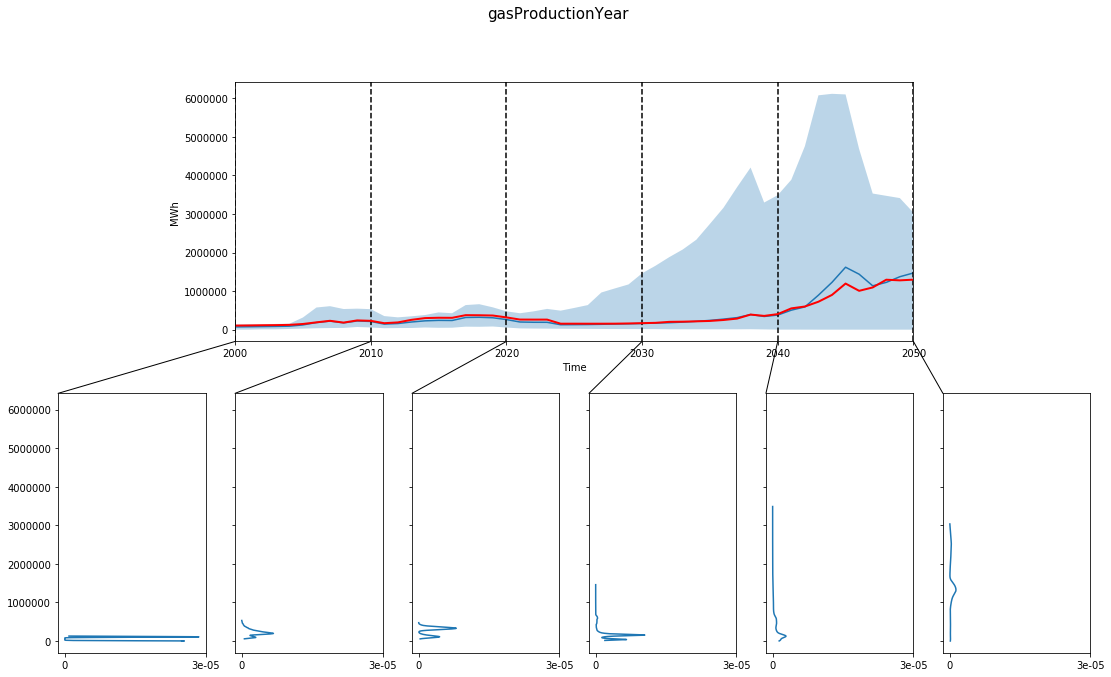

In [127]:
from EMAworkbench.ema_workbench.analysis.plotting import multiple_densities, PlotType
from EMAworkbench.ema_workbench.analysis.plotting_util import Density

fig, ax_env = multiple_densities(experiments, outcomes_filtered, outcomes_to_show = ooi,
                                 points_in_time=points_of_interest,  density = Density.KDE,
                                 grouping_specifiers=None , titles={ooi}, ylabels={ooi: "MWh"}, legend=True,
                                 fill=True, plot_type=PlotType.ENVELOPE)

#Change x labels to years
ax_env[ooi]['main plot'].set_xticklabels(time[range(0,len(time),10)])
#Add BAU in the plot with a red wide line
ax_env[ooi]['main plot'].plot(outcomes_filtered[ooi][-1], 'r-',linewidth=2 )

fig[0].suptitle("{}".format(ooi), fontsize=15)
fig[0].set_size_inches(18.5, 10.5)

plt.savefig('{}/fig{}.png'.format(r'C:\\Users\\angel\\Documents\\GitHub\\gr4sp\\experiments\\notebookGr4sp\\outputs\\figs', '_envelope_density_%s'%(ooi)),
                dpi=300, bbox_inches='tight')

In [ ]:
from EMAworkbench.ema_workbench.analysis import prim
from EMAworkbench.ema_workbench.util import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO);
 
x = exp
#y = out_avg_ooi > 40000000
y = target_at_year( outcomes_filtered, ooi, 2035, 40000000, False) #False is below target

prim_alg = prim.Prim(x, y, threshold=0.3)
box1 = prim_alg.find_box()

In [ ]:
box1.inspect_tradeoff()

In [ ]:
%matplotlib inline
box_1 = box1.inspect(2)
box_1 = box1.inspect(2, style='graph')

In [ ]:
box1.select(2)
fig = box1.show_pairs_scatter(2)
plt.show()

## Solar Production

In [128]:
# Subset Sool levers
selected_uncertainties = list(['annualCpi','priceChangePercentageWind','priceChangePercentageWater',
                        'semiScheduleMinCapMarketGen'])    

selected_uncertainties = uncertainties

ooi = 'solarProductionYear'
data = outcomes_filtered[ooi]

num_exp = len(data)
out_avg_ooi = np.zeros(num_exp)

for i in range(num_exp):
    out_avg_ooi[i] = data[i].mean()

exp = pd.DataFrame(experiments)

exp = exp.loc[ :, selected_uncertainties] 

### Open Exploration: Visual Analysis

singular matrix


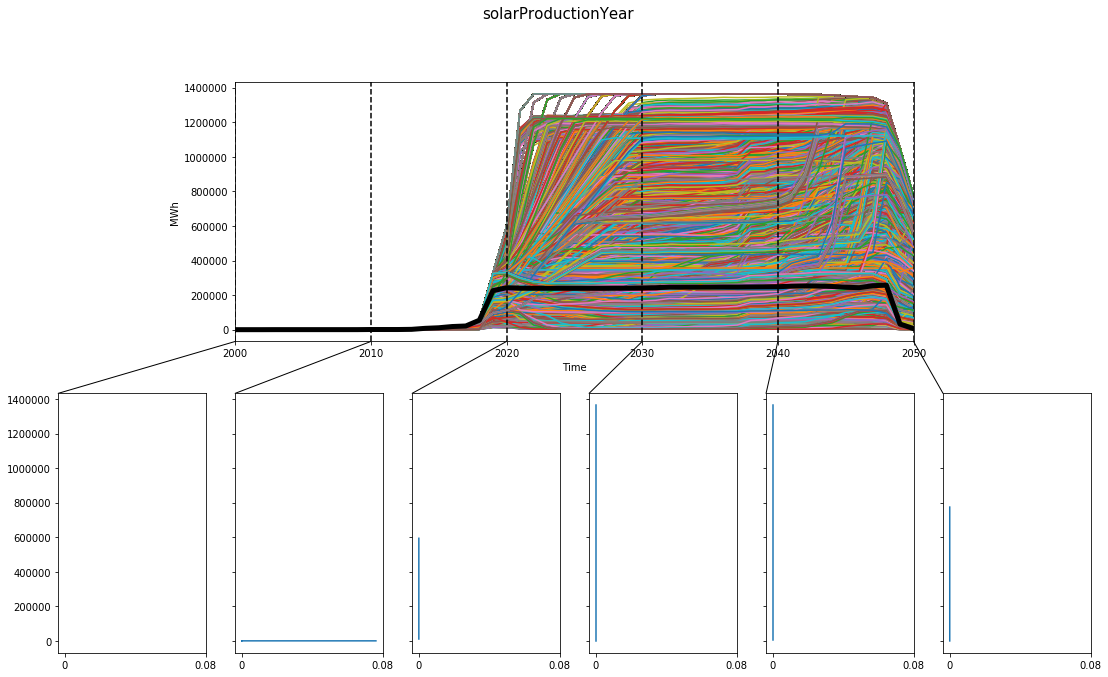

In [129]:
from EMAworkbench.ema_workbench.analysis.plotting import multiple_densities, PlotType
from EMAworkbench.ema_workbench.analysis.plotting_util import Density

fig, ax_env = multiple_densities(experiments, outcomes_filtered, outcomes_to_show = ooi,
                                 points_in_time=points_of_interest,  density = Density.KDE,
                                 grouping_specifiers=None , titles={ooi}, ylabels={ooi: "MWh"}, legend=True,
                                 fill=False, plot_type=PlotType.ENV_LIN)

#Change x labels to years
ax_env[ooi]['main plot'].set_xticklabels(time[range(0,len(time),10)])
#Add BAU in the plot with a black wide line
ax_env[ooi]['main plot'].plot(outcomes_filtered[ooi][-1], 'k-',linewidth=5 )

fig[0].suptitle("{}".format(ooi), fontsize=15)
fig[0].set_size_inches(18.5, 10.5)

plt.savefig('{}/fig{}.png'.format(r'C:\\Users\\angel\\Documents\\GitHub\\gr4sp\\experiments\\notebookGr4sp\\outputs\\figs', '_envelope_line_density_%s'%(ooi)),
                dpi=300, bbox_inches='tight')

singular matrix


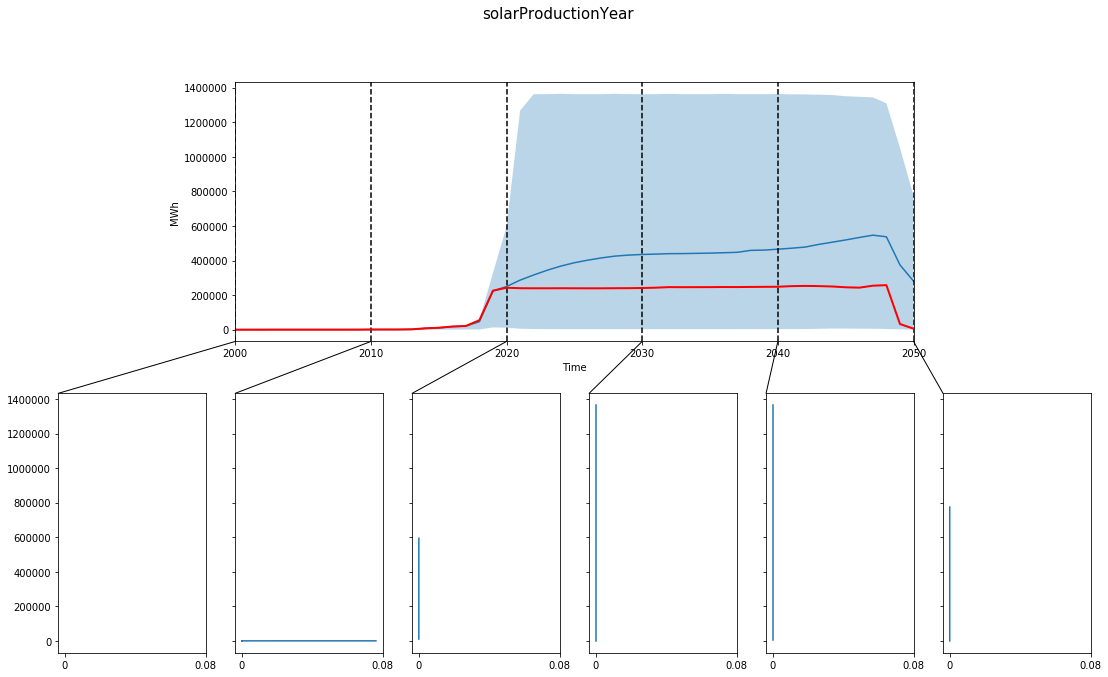

In [130]:
from EMAworkbench.ema_workbench.analysis.plotting import multiple_densities, PlotType
from EMAworkbench.ema_workbench.analysis.plotting_util import Density

fig, ax_env = multiple_densities(experiments, outcomes_filtered, outcomes_to_show = ooi,
                                 points_in_time=points_of_interest,  density = Density.KDE,
                                 grouping_specifiers=None , titles={ooi}, ylabels={ooi: "MWh"}, legend=True,
                                 fill=True, plot_type=PlotType.ENVELOPE)

#Change x labels to years
ax_env[ooi]['main plot'].set_xticklabels(time[range(0,len(time),10)])
#Add BAU in the plot with a red wide line
ax_env[ooi]['main plot'].plot(outcomes_filtered[ooi][-1], 'r-',linewidth=2 )

fig[0].suptitle("{}".format(ooi), fontsize=15)
fig[0].set_size_inches(18.5, 10.5)

plt.savefig('{}/fig{}.png'.format(r'C:\\Users\\angel\\Documents\\GitHub\\gr4sp\\experiments\\notebookGr4sp\\outputs\\figs', '_envelope_density_%s'%(ooi)),
                dpi=300, bbox_inches='tight')

In [ ]:
from EMAworkbench.ema_workbench.analysis import prim
from EMAworkbench.ema_workbench.util import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO);
 
x = exp
#y = out_avg_ooi > 40000000
y = target_at_year( outcomes_filtered, ooi, 2035, 40000000, False) #False is below target

prim_alg = prim.Prim(x, y, threshold=0.3)
box1 = prim_alg.find_box()

In [ ]:
box1.inspect_tradeoff()

In [ ]:
%matplotlib inline
box_1 = box1.inspect(2)
box_1 = box1.inspect(2, style='graph')

In [ ]:
box1.select(2)
fig = box1.show_pairs_scatter(2)
plt.show()

## Battery Production

In [ ]:
# Subset Sool levers
selected_uncertainties = list(['annualCpi','priceChangePercentageWind','priceChangePercentageWater',
                        'semiScheduleMinCapMarketGen'])    

selected_uncertainties = uncertainties

ooi = 'BatteryProductionYear'
data = outcomes_filtered[ooi]

num_exp = len(data)
out_avg_ooi = np.zeros(num_exp)

for i in range(num_exp):
    out_avg_ooi[i] = data[i].mean()

exp = pd.DataFrame(experiments)

exp = exp.loc[ :, selected_uncertainties] 

### Open Exploration: Visual Analysis

In [ ]:
from EMAworkbench.ema_workbench.analysis.plotting import multiple_densities, PlotType
from EMAworkbench.ema_workbench.analysis.plotting_util import Density

fig, ax_env = multiple_densities(experiments, outcomes_filtered, outcomes_to_show = ooi,
                                 points_in_time=points_of_interest,  density = Density.KDE,
                                 grouping_specifiers=None , titles={ooi}, ylabels={ooi: "MWh"}, legend=True,
                                 fill=False, plot_type=PlotType.ENV_LIN)

#Change x labels to years
ax_env[ooi]['main plot'].set_xticklabels(time[range(0,len(time),10)])

fig[0].suptitle("{}".format(ooi), fontsize=15)
fig[0].set_size_inches(18.5, 10.5)

plt.savefig('{}/fig{}.png'.format(r'C:\\Users\\angel\\Documents\\GitHub\\gr4sp\\experiments\\notebookGr4sp\\outputs\\figs', '_envelope_line_density_%s'%(ooi)),
                dpi=300, bbox_inches='tight')

In [ ]:
from EMAworkbench.ema_workbench.analysis.plotting import multiple_densities, PlotType
from EMAworkbench.ema_workbench.analysis.plotting_util import Density

fig, ax_env = multiple_densities(experiments, outcomes_filtered, outcomes_to_show = ooi,
                                 points_in_time=points_of_interest,  density = Density.KDE,
                                 grouping_specifiers=None , titles={ooi}, ylabels={ooi: "MWh"}, legend=True,
                                 fill=True, plot_type=PlotType.ENVELOPE)

#Change x labels to years
ax_env[ooi]['main plot'].set_xticklabels(time[range(0,len(time),10)])

fig[0].suptitle("{}".format(ooi), fontsize=15)
fig[0].set_size_inches(18.5, 10.5)

plt.savefig('{}/fig{}.png'.format(r'C:\\Users\\angel\\Documents\\GitHub\\gr4sp\\experiments\\notebookGr4sp\\outputs\\figs', '_envelope_density_%s'%(ooi)),
                dpi=300, bbox_inches='tight')

In [ ]:
from EMAworkbench.ema_workbench.analysis import prim
from EMAworkbench.ema_workbench.util import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO);
 
x = exp
#y = out_avg_ooi > 40000000
y = target_at_year( outcomes_filtered, ooi, 2035, 40000000, False) #False is below target

prim_alg = prim.Prim(x, y, threshold=0.3)
box1 = prim_alg.find_box()

In [ ]:
box1.inspect_tradeoff()

In [ ]:
%matplotlib inline
box_1 = box1.inspect(2)
box_1 = box1.inspect(2, style='graph')

In [ ]:
box1.select(2)
fig = box1.show_pairs_scatter(2)
plt.show()

## Consumption

In [ ]:
# Subset Sool levers
selected_uncertainties = uncertainties

ooi = 'consumptionYear'
data = outcomes_filtered[ooi]

num_exp = len(data)
out_avg_ooi = np.zeros(num_exp)

for i in range(num_exp):
    out_avg_ooi[i] = data[i].mean()

exp = pd.DataFrame(experiments)

exp = exp.loc[ :, selected_uncertainties] 

### Open Exploration: Visual Analysis

In [ ]:
from EMAworkbench.ema_workbench.analysis.plotting import multiple_densities, PlotType
from EMAworkbench.ema_workbench.analysis.plotting_util import Density

fig, ax_env = multiple_densities(experiments, outcomes_filtered, outcomes_to_show = ooi,
                                 points_in_time=points_of_interest,  density = Density.KDE,
                                 grouping_specifiers=None , titles={ooi}, ylabels={ooi: "MWh"}, legend=True,
                                 fill=False, plot_type=PlotType.ENV_LIN)

#Change x labels to years
ax_env[ooi]['main plot'].set_xticklabels(time[range(0,len(time),10)])
#Add BAU in the plot with a black wide line
ax_env[ooi]['main plot'].plot(outcomes_filtered[ooi][-1], 'k-',linewidth=5 )

fig[0].suptitle("{}".format(ooi), fontsize=15)
fig[0].set_size_inches(18.5, 10.5)

plt.savefig('{}/fig{}.png'.format(r'C:\\Users\\angel\\Documents\\GitHub\\gr4sp\\experiments\\notebookGr4sp\\outputs\\figs', '_envelope_line_density_%s'%(ooi)),
                dpi=300, bbox_inches='tight')

In [ ]:
from EMAworkbench.ema_workbench.analysis.plotting import multiple_densities, PlotType
from EMAworkbench.ema_workbench.analysis.plotting_util import Density

fig, ax_env = multiple_densities(experiments, outcomes_filtered, outcomes_to_show = ooi,
                                 points_in_time=points_of_interest,  density = Density.KDE,
                                 grouping_specifiers=None , titles={ooi}, ylabels={ooi: "MWh"}, legend=True,
                                 fill=True, plot_type=PlotType.ENVELOPE)

#Change x labels to years
ax_env[ooi]['main plot'].set_xticklabels(time[range(0,len(time),10)])
#Add BAU in the plot with a red wide line
ax_env[ooi]['main plot'].plot(outcomes_filtered[ooi][-1], 'r-',linewidth=2 )

fig[0].suptitle("{}".format(ooi), fontsize=15)
fig[0].set_size_inches(18.5, 10.5)

plt.savefig('{}/fig{}.png'.format(r'C:\\Users\\angel\\Documents\\GitHub\\gr4sp\\experiments\\notebookGr4sp\\outputs\\figs', '_envelope_density_%s'%(ooi)),
                dpi=300, bbox_inches='tight')

In [ ]:
from EMAworkbench.ema_workbench.analysis import prim
from EMAworkbench.ema_workbench.util import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO);
 
x = exp
#y = out_avg_ooi > 40000000
y = target_at_year( outcomes_filtered, ooi, 2035, 40000000, False) #False is below target

prim_alg = prim.Prim(x, y, threshold=0.3)
box1 = prim_alg.find_box()

In [ ]:
from EMAworkbench.ema_workbench.analysis.plotting import multiple_densities, PlotType
from EMAworkbench.ema_workbench.analysis.plotting_util import Density

fig, ax_env = multiple_densities(experiments, outcomes_filtered, outcomes_to_show = ooi,
                                 points_in_time=points_of_interest,  density = Density.KDE,
                                 grouping_specifiers=None , titles={ooi}, ylabels={ooi: "MWh"}, legend=True,
                                 fill=True, plot_type=PlotType.ENVELOPE)

#Change x labels to years
ax_env[ooi]['main plot'].set_xticklabels(time[range(0,len(time),10)])

fig[0].suptitle("{}".format(ooi), fontsize=15)
fig[0].set_size_inches(18.5, 10.5)

plt.savefig('{}/fig{}.png'.format(r'C:\\Users\\angel\\Documents\\GitHub\\gr4sp\\experiments\\notebookGr4sp\\outputs\\figs', '_envelope_density_%s'%(ooi)),
                dpi=300, bbox_inches='tight')

In [ ]:
from EMAworkbench.ema_workbench.analysis import prim
from EMAworkbench.ema_workbench.util import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO);
 
x = exp
#y = out_avg_ooi > 40000000
y = target_at_year( outcomes_filtered, ooi, 2035, 40000000, False) #False is below target

prim_alg = prim.Prim(x, y, threshold=0.3)
box1 = prim_alg.find_box()

In [ ]:
box1.inspect_tradeoff()

In [ ]:
%matplotlib inline
box_1 = box1.inspect(2)
box_1 = box1.inspect(2, style='graph')

In [ ]:
box1.select(2)
fig = box1.show_pairs_scatter(2)
plt.show()

## Unmet Demand - Primary Unmet demand in MWh 

In [154]:
# Subset Sool levers
selected_uncertainties = uncertainties

ooi = 'primaryUnmetDemandMwh'
data = outcomes_filtered[ooi]

num_exp = len(data)
out_avg_ooi = np.zeros(num_exp)

for i in range(num_exp):
    out_avg_ooi[i] = data[i].mean()

exp = pd.DataFrame(experiments)

exp = exp.loc[ :, selected_uncertainties] 

### Open Exploration: Visual Analysis

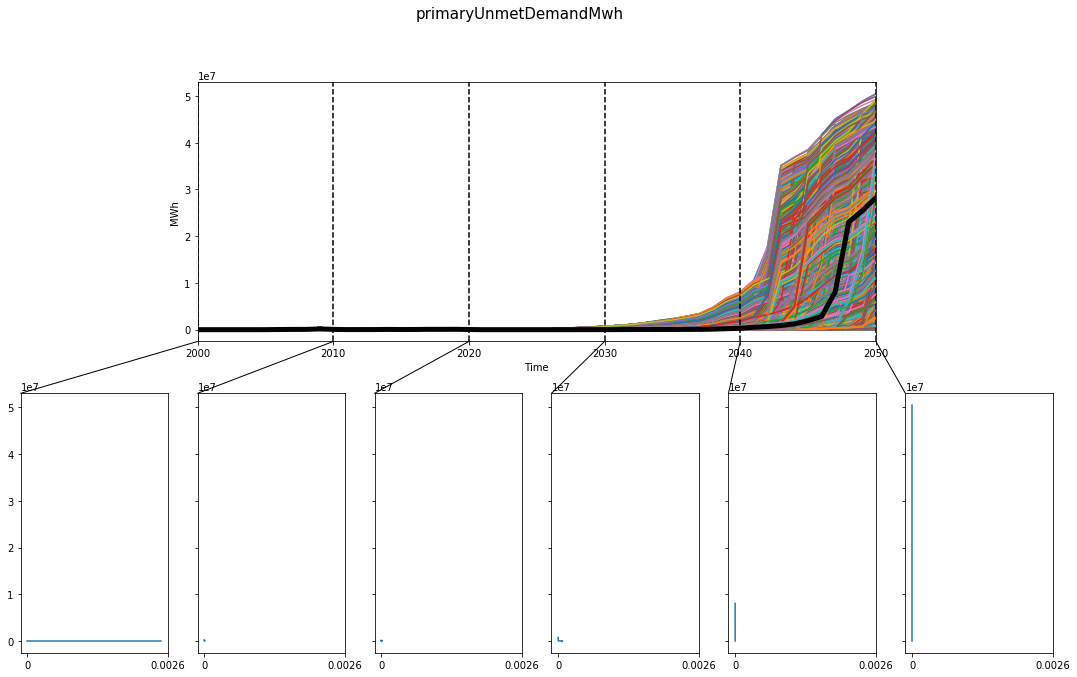

In [155]:
from EMAworkbench.ema_workbench.analysis.plotting import multiple_densities, PlotType
from EMAworkbench.ema_workbench.analysis.plotting_util import Density

fig, ax_env = multiple_densities(experiments, outcomes_filtered, outcomes_to_show = ooi,
                                 points_in_time=points_of_interest,  density = Density.KDE,
                                 grouping_specifiers=None , titles={ooi}, ylabels={ooi: "MWh"}, legend=True,
                                 fill=False, plot_type=PlotType.ENV_LIN)

#Change x labels to years
ax_env[ooi]['main plot'].set_xticklabels(time[range(0,len(time),10)])
#Add BAU in the plot with a black wide line
ax_env[ooi]['main plot'].plot(outcomes_filtered[ooi][-1], 'k-',linewidth=5 )

fig[0].suptitle("{}".format(ooi), fontsize=15)
fig[0].set_size_inches(18.5, 10.5)

plt.savefig('{}/fig{}.png'.format(r'C:\\Users\\angel\\Documents\\GitHub\\gr4sp\\experiments\\notebookGr4sp\\outputs\\figs', '_envelope_line_density_%s'%(ooi)),
                dpi=300, bbox_inches='tight')

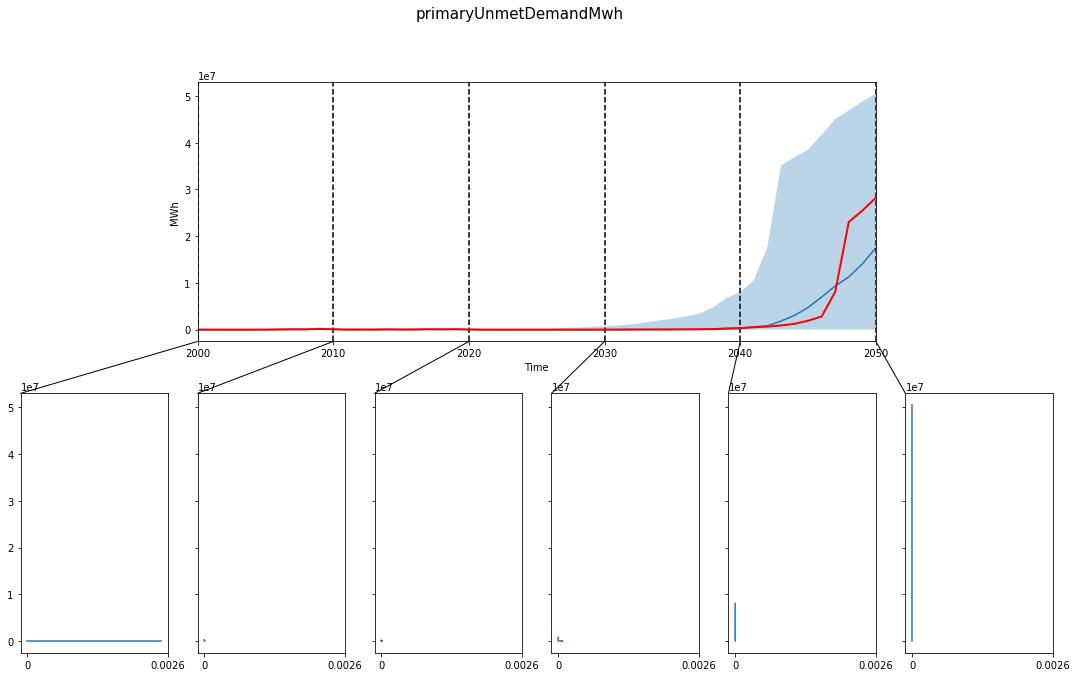

In [156]:
from EMAworkbench.ema_workbench.analysis.plotting import multiple_densities, PlotType
from EMAworkbench.ema_workbench.analysis.plotting_util import Density

fig, ax_env = multiple_densities(experiments, outcomes_filtered, outcomes_to_show = ooi,
                                 points_in_time=points_of_interest,  density = Density.KDE,
                                 grouping_specifiers=None , titles={ooi}, ylabels={ooi: "MWh"}, legend=True,
                                 fill=True, plot_type=PlotType.ENVELOPE)

#Change x labels to years
ax_env[ooi]['main plot'].set_xticklabels(time[range(0,len(time),10)])
#Add BAU in the plot with a red wide line
ax_env[ooi]['main plot'].plot(outcomes_filtered[ooi][-1], 'r-',linewidth=2 )

fig[0].suptitle("{}".format(ooi), fontsize=15)
fig[0].set_size_inches(18.5, 10.5)

plt.savefig('{}/fig{}.png'.format(r'C:\\Users\\angel\\Documents\\GitHub\\gr4sp\\experiments\\notebookGr4sp\\outputs\\figs', '_envelope_density_%s'%(ooi)),
                dpi=300, bbox_inches='tight')

In [ ]:
from EMAworkbench.ema_workbench.analysis import prim
from EMAworkbench.ema_workbench.util import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO);
 
x = exp
#y = out_avg_ooi > 40000000
y = target_at_year( outcomes_filtered, ooi, 2035, 40000000, False) #False is below target

prim_alg = prim.Prim(x, y, threshold=0.3)
box1 = prim_alg.find_box()

In [ ]:
box1.inspect_tradeoff()

In [ ]:
%matplotlib inline
box_1 = box1.inspect(2)
box_1 = box1.inspect(2, style='graph')

## Unmet Demand - Primary unmet demand (hours)

In [183]:
# Subset Sool levers
selected_uncertainties = uncertainties

ooi = 'primaryUnmetDemandHours'
data = outcomes_filtered[ooi]

num_exp = len(data)
out_avg_ooi = np.zeros(num_exp)

for i in range(num_exp):
    out_avg_ooi[i] = data[i].mean()

exp = pd.DataFrame(experiments)

exp = exp.loc[ :, selected_uncertainties] 

### Open Exploration: Visual Analysis

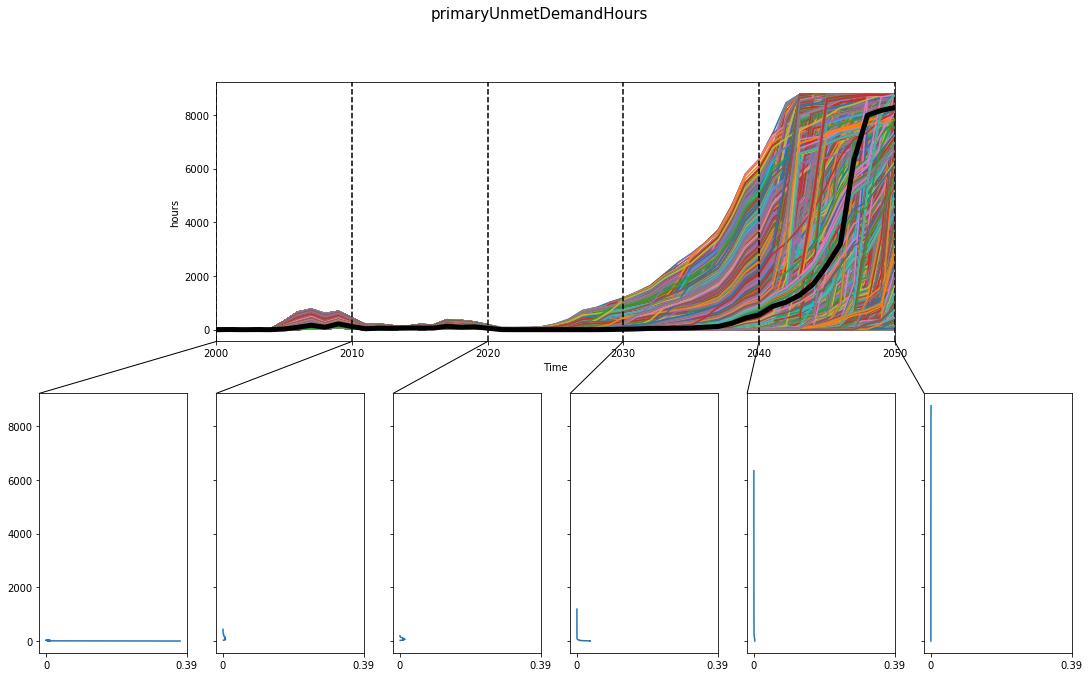

In [158]:
from EMAworkbench.ema_workbench.analysis.plotting import multiple_densities, PlotType
from EMAworkbench.ema_workbench.analysis.plotting_util import Density

fig, ax_env = multiple_densities(experiments, outcomes_filtered, outcomes_to_show = ooi,
                                 points_in_time=points_of_interest,  density = Density.KDE,
                                 grouping_specifiers=None , titles={ooi}, ylabels={ooi: "hours"}, legend=True,
                                 fill=False, plot_type=PlotType.ENV_LIN)

#Change x labels to years
ax_env[ooi]['main plot'].set_xticklabels(time[range(0,len(time),10)])
#Add BAU in the plot with a black wide line
ax_env[ooi]['main plot'].plot(outcomes_filtered[ooi][-1], 'k-',linewidth=5 )

fig[0].suptitle("{}".format(ooi), fontsize=15)
fig[0].set_size_inches(18.5, 10.5)

plt.savefig('{}/fig{}.png'.format(r'C:\\Users\\angel\\Documents\\GitHub\\gr4sp\\experiments\\notebookGr4sp\\outputs\\figs', '_envelope_line_density_%s'%(ooi)),
                dpi=300, bbox_inches='tight')

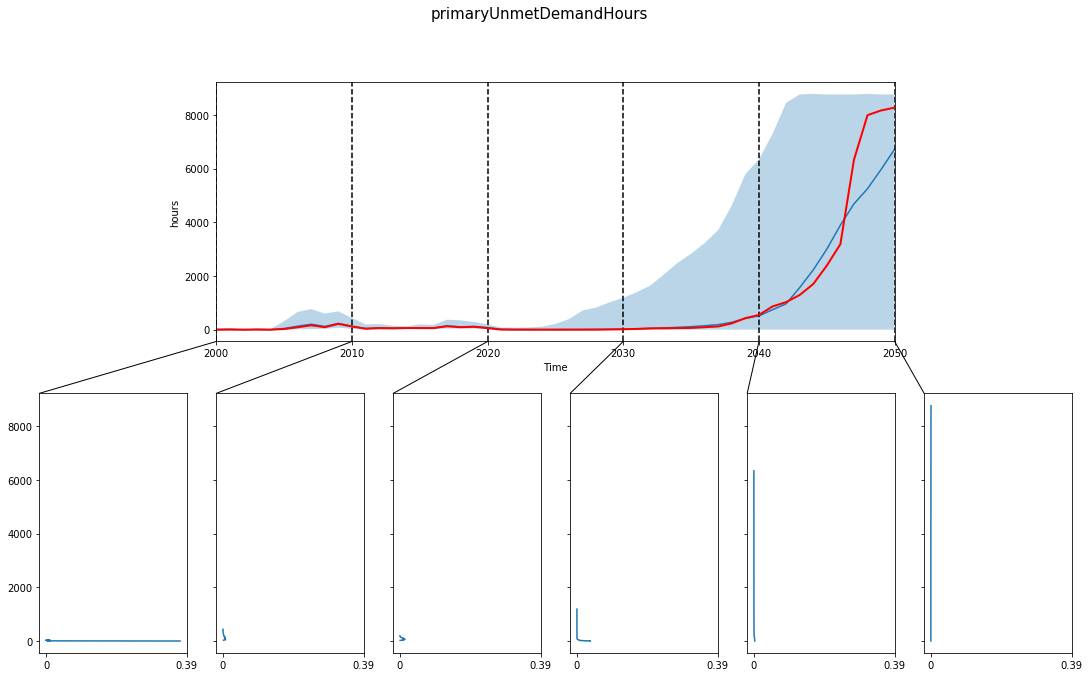

In [159]:
from EMAworkbench.ema_workbench.analysis.plotting import multiple_densities, PlotType
from EMAworkbench.ema_workbench.analysis.plotting_util import Density

fig, ax_env = multiple_densities(experiments, outcomes_filtered, outcomes_to_show = ooi,
                                 points_in_time=points_of_interest,  density = Density.KDE,
                                 grouping_specifiers=None , titles={ooi}, ylabels={ooi: "hours"}, legend=True,
                                 fill=True, plot_type=PlotType.ENVELOPE)

#Change x labels to years
ax_env[ooi]['main plot'].set_xticklabels(time[range(0,len(time),10)])
#Add BAU in the plot with a red wide line
ax_env[ooi]['main plot'].plot(outcomes_filtered[ooi][-1], 'r-',linewidth=2 )

fig[0].suptitle("{}".format(ooi), fontsize=15)
fig[0].set_size_inches(18.5, 10.5)

plt.savefig('{}/fig{}.png'.format(r'C:\\Users\\angel\\Documents\\GitHub\\gr4sp\\experiments\\notebookGr4sp\\outputs\\figs', '_envelope_density_%s'%(ooi)),
                dpi=300, bbox_inches='tight')

In [188]:
from EMAworkbench.ema_workbench.analysis import prim
from EMAworkbench.ema_workbench.util import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO);
 
x = exp
#y = out_avg_ooi > 40000000
y = target_at_year( outcomes_filtered, ooi, 2025, 5, False) #False is below target

prim_alg = prim.Prim(x, y, threshold=0.3)
box1 = prim_alg.find_box()

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] 130001 points remaining, containing 93992 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.23079053238052016, coverage: 0.31920801770363433, density: 1.0 restricted_dimensions: 6


In [189]:
box1.inspect_tradeoff()

alt.VConcatChart(...)

coverage    0.622564
density     0.991259
id                 2
mass        0.454089
mean        0.991259
res_dim            2
Name: 2, dtype: object

                              box 2                   
                                min   max    qp values
generationRolloutPeriod         0.5  10.0  [0.0, -1.0]
includePublicallyAnnouncedGen   0.5   1.0  [0.0, -1.0]



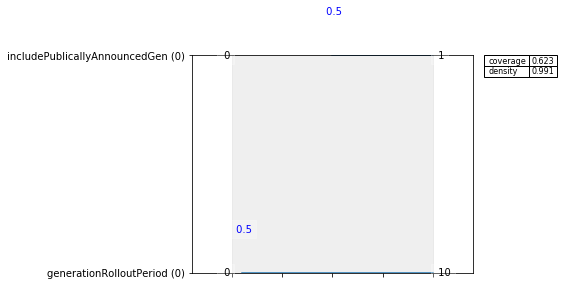

In [190]:
#%matplotlib inline
selected_box = 2

box_1 = box1.inspect(selected_box)
box_1 = box1.inspect(selected_box, style='graph')


## Feature scoring

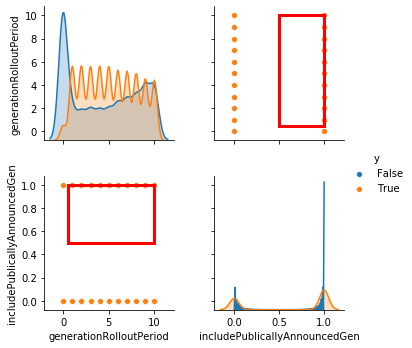

In [191]:
box1.select(selected_box)
fig = box1.show_pairs_scatter(selected_box)
plt.show()

In [174]:
from EMAworkbench.ema_workbench.analysis import feature_scoring

fs, alg = feature_scoring.get_ex_feature_scores(x, y, mode=feature_scoring.RuleInductionType.CLASSIFICATION)
fs.sort_values(ascending=False, by=1)



[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category


1
0                                       
semiScheduleGenSpotMarket       0.373941
nonScheduleGenSpotMarket        0.141363
generationRolloutPeriod         0.081688
priceChangePercentageWater      0.062490
includePublicallyAnnouncedGen   0.054581
priceChangePercentageBrownCoal  0.049735
domesticConsumptionPercentage   0.026635
capacityFactorChangeBrownCoal   0.025096
generatorRetirement             0.021531
capacityFactorChangeWater       0.018816
semiScheduleMinCapMarketGen     0.016801
nonScheduleMinCapMarketGen      0.013654
consumption                     0.012879
rooftopPV                       0.012113
priceChangePercentageOcgt       0.011773
learningCurve                   0.011664
capacityFactorChangeOcgt        0.011318
annualCpi                       0.011006
energyEfficiency                0.010943
annualInflation                 0.010838
scheduleMinCapMarketGen         0.010718
priceChangePercentageWind       0.010416

## Unmet Demand - Primary unmet demand (days)

In [148]:
# Subset Sool levers
selected_uncertainties = uncertainties

ooi = 'primaryUnmetDemandDays'
data = outcomes_filtered[ooi]

num_exp = len(data)
out_avg_ooi = np.zeros(num_exp)

for i in range(num_exp):
    out_avg_ooi[i] = data[i].mean()

exp = pd.DataFrame(experiments)

exp = exp.loc[ :, selected_uncertainties] 

### Open Exploration: Visual Analysis

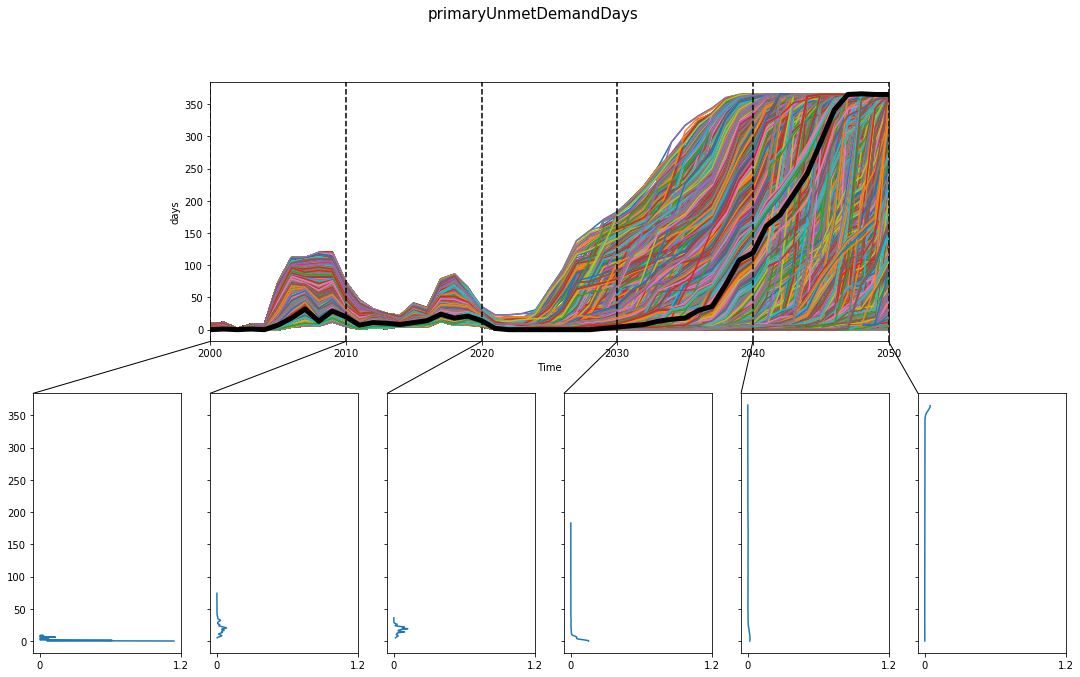

In [149]:
from EMAworkbench.ema_workbench.analysis.plotting import multiple_densities, PlotType
from EMAworkbench.ema_workbench.analysis.plotting_util import Density

fig, ax_env = multiple_densities(experiments, outcomes_filtered, outcomes_to_show = ooi,
                                 points_in_time=points_of_interest,  density = Density.KDE,
                                 grouping_specifiers=None , titles={ooi}, ylabels={ooi: "days"}, legend=True,
                                 fill=False, plot_type=PlotType.ENV_LIN)

#Change x labels to years
ax_env[ooi]['main plot'].set_xticklabels(time[range(0,len(time),10)])
#Add BAU in the plot with a black wide line
ax_env[ooi]['main plot'].plot(outcomes_filtered[ooi][-1], 'k-',linewidth=5 )

fig[0].suptitle("{}".format(ooi), fontsize=15)
fig[0].set_size_inches(18.5, 10.5)

plt.savefig('{}/fig{}.png'.format(r'C:\\Users\\angel\\Documents\\GitHub\\gr4sp\\experiments\\notebookGr4sp\\outputs\\figs', '_envelope_line_density_%s'%(ooi)),
                dpi=300, bbox_inches='tight')

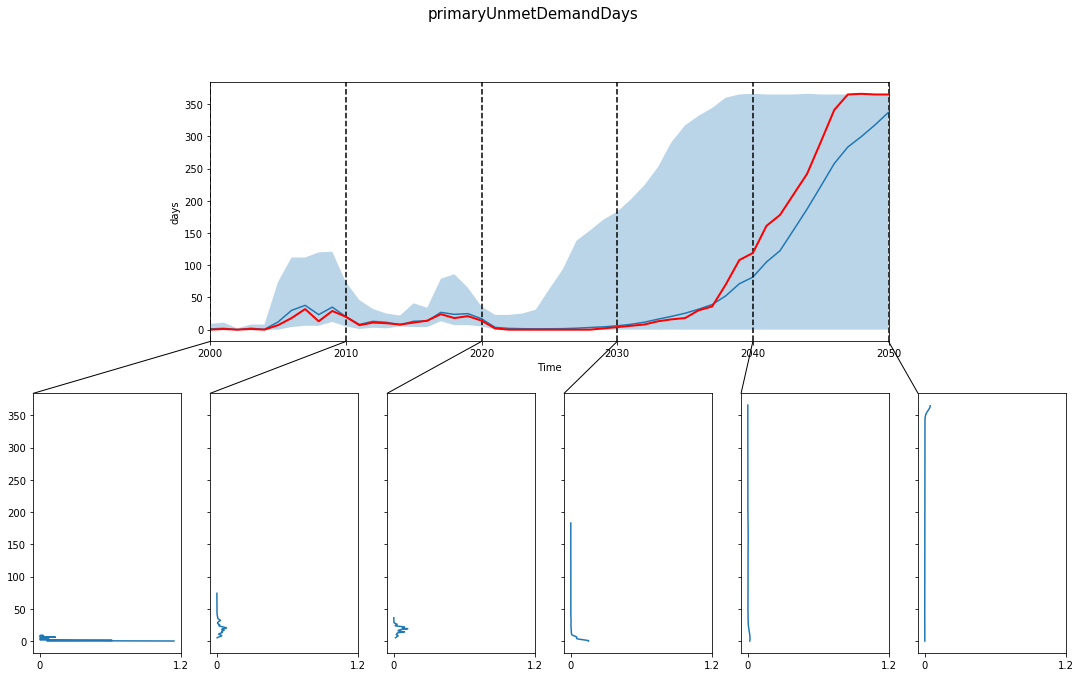

In [150]:
from EMAworkbench.ema_workbench.analysis.plotting import multiple_densities, PlotType
from EMAworkbench.ema_workbench.analysis.plotting_util import Density

fig, ax_env = multiple_densities(experiments, outcomes_filtered, outcomes_to_show = ooi,
                                 points_in_time=points_of_interest,  density = Density.KDE,
                                 grouping_specifiers=None , titles={ooi}, ylabels={ooi: "days"}, legend=True,
                                 fill=True, plot_type=PlotType.ENVELOPE)

#Change x labels to years
ax_env[ooi]['main plot'].set_xticklabels(time[range(0,len(time),10)])
#Add BAU in the plot with a red wide line
ax_env[ooi]['main plot'].plot(outcomes_filtered[ooi][-1], 'r-',linewidth=2 )

fig[0].suptitle("{}".format(ooi), fontsize=15)
fig[0].set_size_inches(18.5, 10.5)

plt.savefig('{}/fig{}.png'.format(r'C:\\Users\\angel\\Documents\\GitHub\\gr4sp\\experiments\\notebookGr4sp\\outputs\\figs', '_envelope_density_%s'%(ooi)),
                dpi=300, bbox_inches='tight')

In [ ]:
from EMAworkbench.ema_workbench.analysis import prim
from EMAworkbench.ema_workbench.util import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO);
 
x = exp
#y = out_avg_ooi > 40000000
y = target_at_year( outcomes_filtered, ooi, 2035, 40000000, False) #False is below target

prim_alg = prim.Prim(x, y, threshold=0.3)
box1 = prim_alg.find_box()

In [ ]:
box1.inspect_tradeoff()

In [ ]:
%matplotlib inline
box_1 = box1.inspect(2)
box_1 = box1.inspect(2, style='graph')

In [ ]:
box1.select(2)
fig = box1.show_pairs_scatter(2)
plt.show()

## Unmet Demand - Primary max unmet demand per hour

In [151]:
# Subset Sool levers
selected_uncertainties = uncertainties

ooi = 'primaryMaxUnmetDemandMwhPerHour'
data = outcomes_filtered[ooi]

num_exp = len(data)
out_avg_ooi = np.zeros(num_exp)

for i in range(num_exp):
    out_avg_ooi[i] = data[i].mean()

exp = pd.DataFrame(experiments)

exp = exp.loc[ :, selected_uncertainties] 

### Open Exploration: Visual Analysis

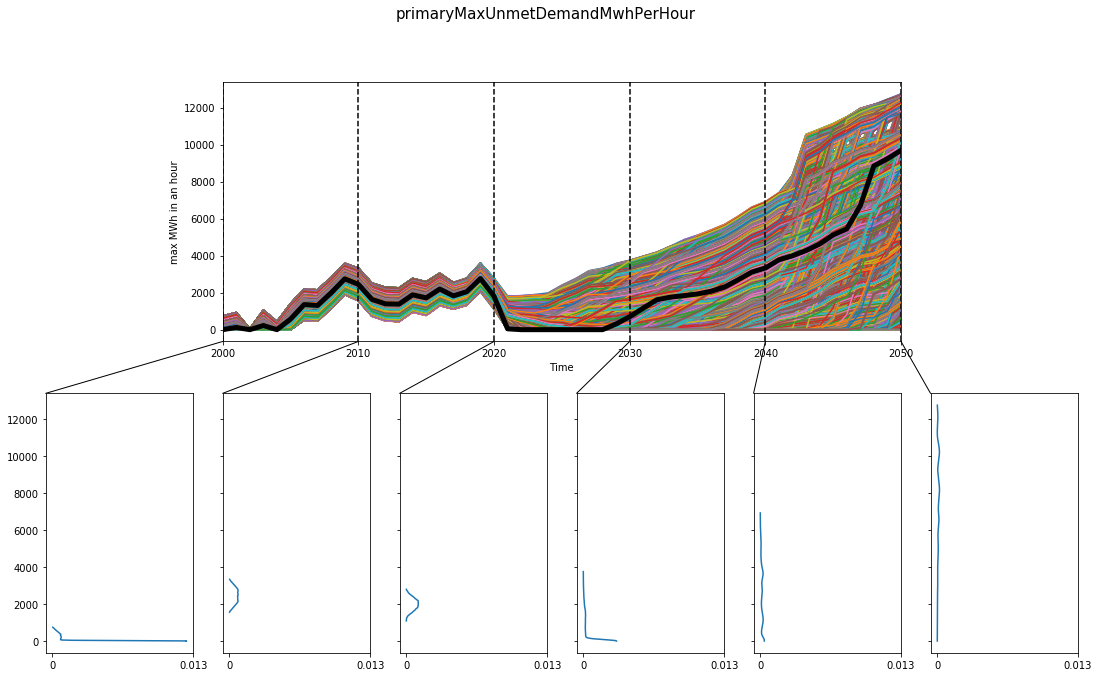

In [152]:
from EMAworkbench.ema_workbench.analysis.plotting import multiple_densities, PlotType
from EMAworkbench.ema_workbench.analysis.plotting_util import Density

fig, ax_env = multiple_densities(experiments, outcomes_filtered, outcomes_to_show = ooi,
                                 points_in_time=points_of_interest,  density = Density.KDE,
                                 grouping_specifiers=None , titles={ooi}, ylabels={ooi: "max MWh in an hour"}, legend=True,
                                 fill=False, plot_type=PlotType.ENV_LIN)

#Change x labels to years
ax_env[ooi]['main plot'].set_xticklabels(time[range(0,len(time),10)])
#Add BAU in the plot with a black wide line
ax_env[ooi]['main plot'].plot(outcomes_filtered[ooi][-1], 'k-',linewidth=5 )

fig[0].suptitle("{}".format(ooi), fontsize=15)
fig[0].set_size_inches(18.5, 10.5)

plt.savefig('{}/fig{}.png'.format(r'C:\\Users\\angel\\Documents\\GitHub\\gr4sp\\experiments\\notebookGr4sp\\outputs\\figs', '_envelope_line_density_%s'%(ooi)),
                dpi=300, bbox_inches='tight')

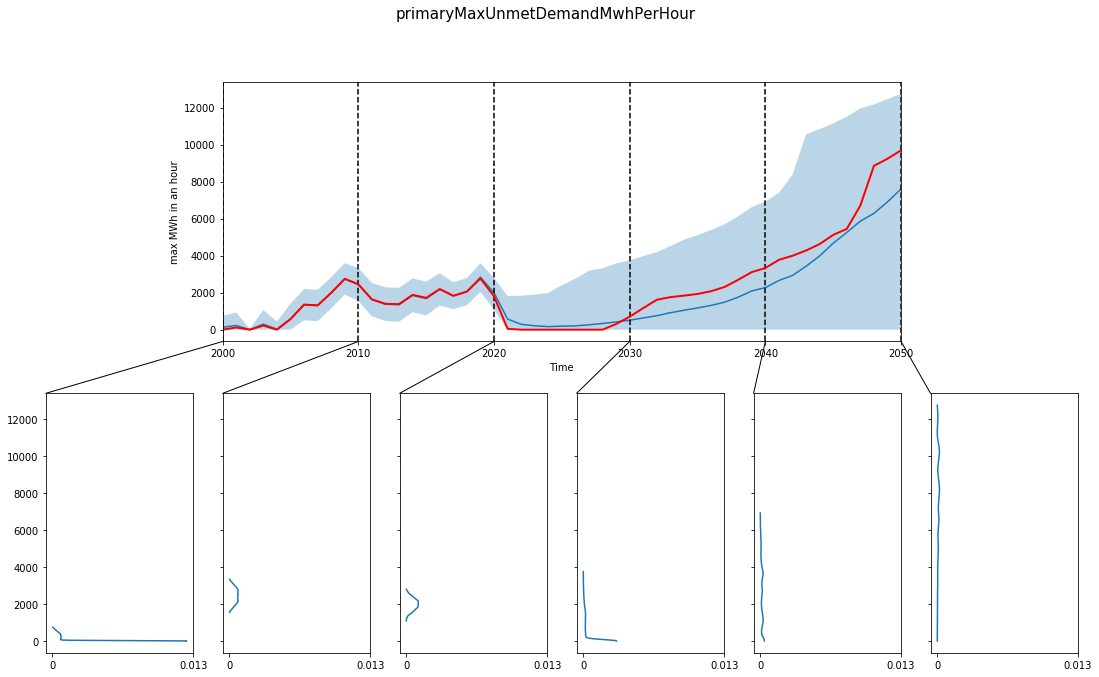

In [153]:
from EMAworkbench.ema_workbench.analysis.plotting import multiple_densities, PlotType
from EMAworkbench.ema_workbench.analysis.plotting_util import Density

fig, ax_env = multiple_densities(experiments, outcomes_filtered, outcomes_to_show = ooi,
                                 points_in_time=points_of_interest,  density = Density.KDE,
                                 grouping_specifiers=None , titles={ooi}, ylabels={ooi: "max MWh in an hour"}, legend=True,
                                 fill=True, plot_type=PlotType.ENVELOPE)

#Change x labels to years
ax_env[ooi]['main plot'].set_xticklabels(time[range(0,len(time),10)])
#Add BAU in the plot with a red wide line
ax_env[ooi]['main plot'].plot(outcomes_filtered[ooi][-1], 'r-',linewidth=2 )


fig[0].suptitle("{}".format(ooi), fontsize=15)
fig[0].set_size_inches(18.5, 10.5)

plt.savefig('{}/fig{}.png'.format(r'C:\\Users\\angel\\Documents\\GitHub\\gr4sp\\experiments\\notebookGr4sp\\outputs\\figs', '_envelope_density_%s'%(ooi)),
                dpi=300, bbox_inches='tight')

In [ ]:
from EMAworkbench.ema_workbench.analysis import prim
from EMAworkbench.ema_workbench.util import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO);
 
x = exp
#y = out_avg_ooi > 40000000
y = target_at_year( outcomes_filtered, ooi, 2035, 40000000, False) #False is below target

prim_alg = prim.Prim(x, y, threshold=0.3)
box1 = prim_alg.find_box()

In [ ]:
box1.inspect_tradeoff()

In [ ]:
%matplotlib inline
box_1 = box1.inspect(2)
box_1 = box1.inspect(2, style='graph')

In [ ]:
box1.select(2)
fig = box1.show_pairs_scatter(2)
plt.show()

## Unmet Demand - Secondary market unmet demand MWh

In [160]:
# Subset Sool levers
selected_uncertainties = uncertainties

ooi = 'secondaryUnmetDemandMwh'
data = outcomes_filtered[ooi]

num_exp = len(data)
out_avg_ooi = np.zeros(num_exp)

for i in range(num_exp):
    out_avg_ooi[i] = data[i].mean()

exp = pd.DataFrame(experiments)

exp = exp.loc[ :, selected_uncertainties] 

### Open Exploration: Visual Analysis

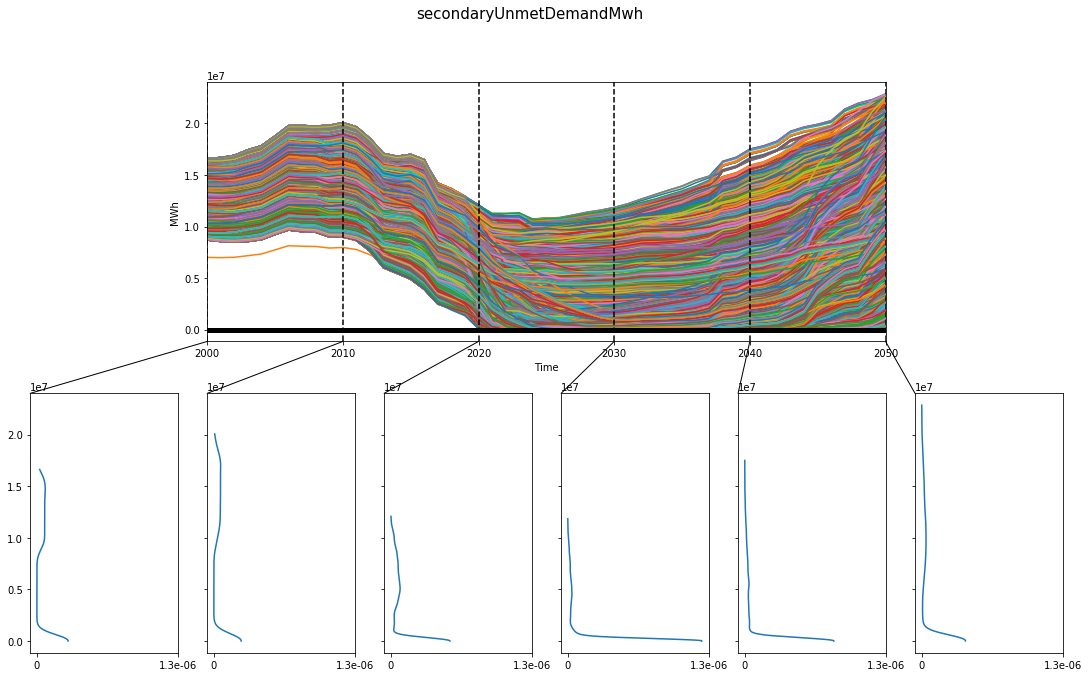

In [161]:
from EMAworkbench.ema_workbench.analysis.plotting import multiple_densities, PlotType
from EMAworkbench.ema_workbench.analysis.plotting_util import Density

fig, ax_env = multiple_densities(experiments, outcomes_filtered, outcomes_to_show = ooi,
                                 points_in_time=points_of_interest,  density = Density.KDE,
                                 grouping_specifiers=None , titles={ooi}, ylabels={ooi: "MWh"}, legend=True,
                                 fill=False, plot_type=PlotType.ENV_LIN)

#Change x labels to years
ax_env[ooi]['main plot'].set_xticklabels(time[range(0,len(time),10)])
#Add BAU in the plot with a black wide line
ax_env[ooi]['main plot'].plot(outcomes_filtered[ooi][-1], 'k-',linewidth=5 )

fig[0].suptitle("{}".format(ooi), fontsize=15)
fig[0].set_size_inches(18.5, 10.5)

plt.savefig('{}/fig{}.png'.format(r'C:\\Users\\angel\\Documents\\GitHub\\gr4sp\\experiments\\notebookGr4sp\\outputs\\figs', '_envelope_line_density_%s'%(ooi)),
                dpi=300, bbox_inches='tight')

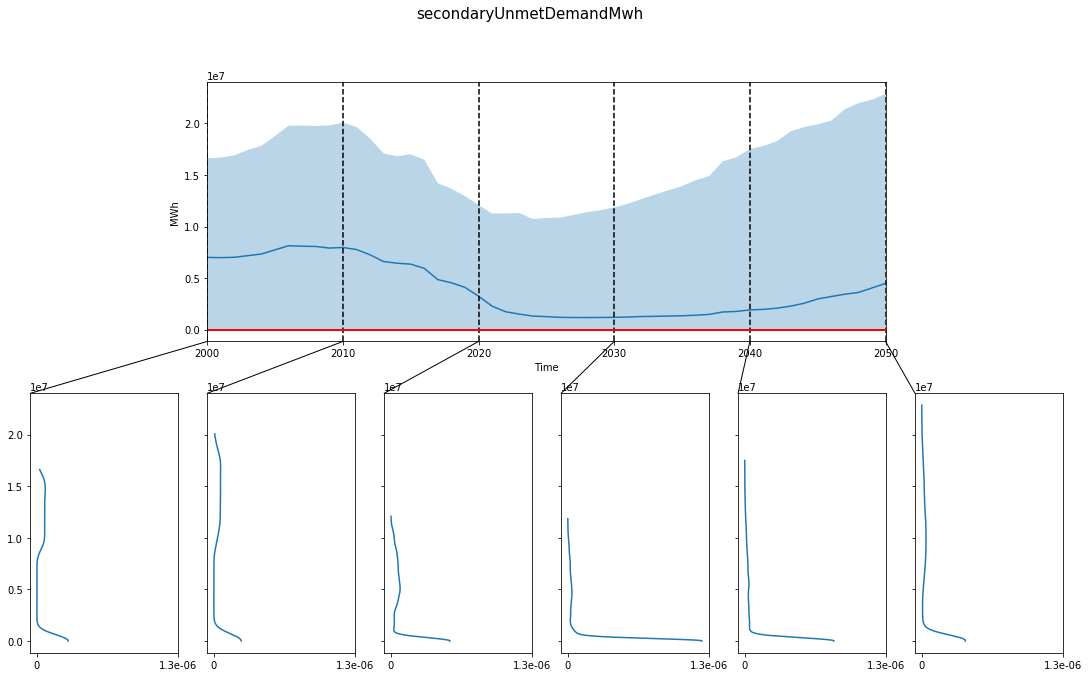

In [162]:
from EMAworkbench.ema_workbench.analysis.plotting import multiple_densities, PlotType
from EMAworkbench.ema_workbench.analysis.plotting_util import Density

fig, ax_env = multiple_densities(experiments, outcomes_filtered, outcomes_to_show = ooi,
                                 points_in_time=points_of_interest,  density = Density.KDE,
                                 grouping_specifiers=None , titles={ooi}, ylabels={ooi: "MWh"}, legend=True,
                                 fill=True, plot_type=PlotType.ENVELOPE)

#Change x labels to years
ax_env[ooi]['main plot'].set_xticklabels(time[range(0,len(time),10)])
#Add BAU in the plot with a red wide line
ax_env[ooi]['main plot'].plot(outcomes_filtered[ooi][-1], 'r-',linewidth=2 )

fig[0].suptitle("{}".format(ooi), fontsize=15)
fig[0].set_size_inches(18.5, 10.5)

plt.savefig('{}/fig{}.png'.format(r'C:\\Users\\angel\\Documents\\GitHub\\gr4sp\\experiments\\notebookGr4sp\\outputs\\figs', '_envelope_density_%s'%(ooi)),
                dpi=300, bbox_inches='tight')

In [ ]:
from EMAworkbench.ema_workbench.analysis import prim
from EMAworkbench.ema_workbench.util import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO);
 
x = exp
#y = out_avg_ooi > 40000000
y = target_at_year( outcomes_filtered, ooi, 2035, 40000000, False) #False is below target

prim_alg = prim.Prim(x, y, threshold=0.3)
box1 = prim_alg.find_box()

In [ ]:
box1.inspect_tradeoff()

In [ ]:
%matplotlib inline
box_1 = box1.inspect(2)
box_1 = box1.inspect(2, style='graph')

In [ ]:
box1.select(2)
fig = box1.show_pairs_scatter(2)
plt.show()

## Unmet Demand - Secondary market unmet demand (hours)

In [163]:
# Subset Sool levers
selected_uncertainties = uncertainties

ooi = 'secondaryUnmetDemandHours'
data = outcomes_filtered[ooi]

num_exp = len(data)
out_avg_ooi = np.zeros(num_exp)

for i in range(num_exp):
    out_avg_ooi[i] = data[i].mean()

exp = pd.DataFrame(experiments)

exp = exp.loc[ :, selected_uncertainties] 

### Open Exploration: Visual Analysis

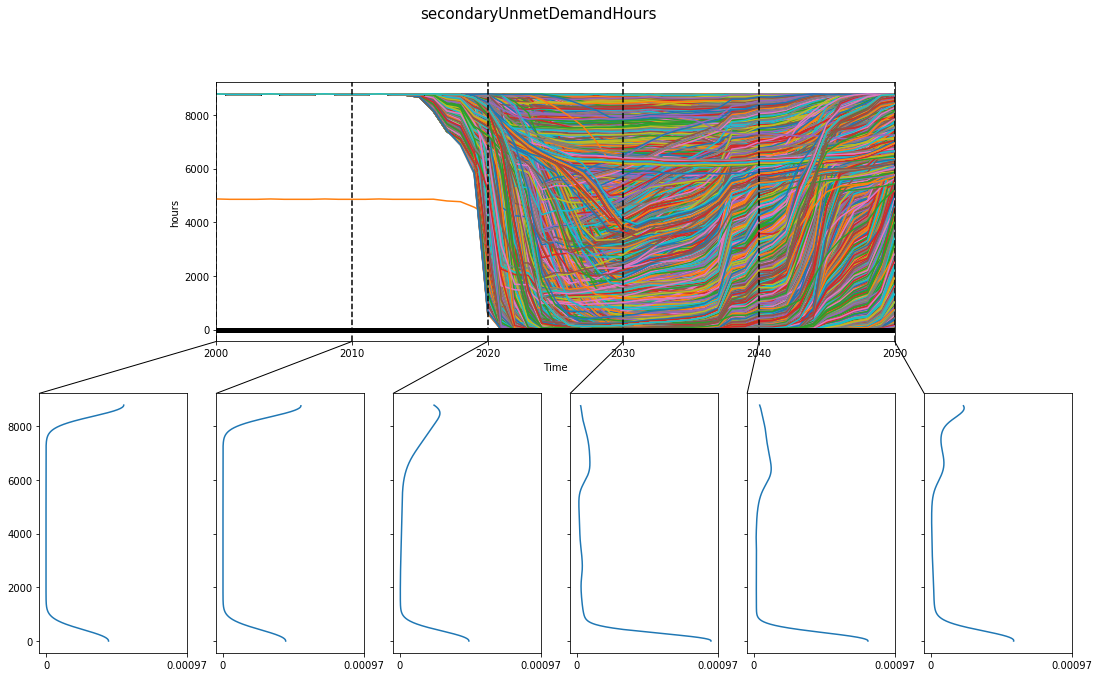

In [164]:
from EMAworkbench.ema_workbench.analysis.plotting import multiple_densities, PlotType
from EMAworkbench.ema_workbench.analysis.plotting_util import Density

fig, ax_env = multiple_densities(experiments, outcomes_filtered, outcomes_to_show = ooi,
                                 points_in_time=points_of_interest,  density = Density.KDE,
                                 grouping_specifiers=None , titles={ooi}, ylabels={ooi: "hours"}, legend=True,
                                 fill=False, plot_type=PlotType.ENV_LIN)

#Change x labels to years
ax_env[ooi]['main plot'].set_xticklabels(time[range(0,len(time),10)])
#Add BAU in the plot with a black wide line
ax_env[ooi]['main plot'].plot(outcomes_filtered[ooi][-1], 'k-',linewidth=5 )

fig[0].suptitle("{}".format(ooi), fontsize=15)
fig[0].set_size_inches(18.5, 10.5)

plt.savefig('{}/fig{}.png'.format(r'C:\\Users\\angel\\Documents\\GitHub\\gr4sp\\experiments\\notebookGr4sp\\outputs\\figs', '_envelope_line_density_%s'%(ooi)),
                dpi=300, bbox_inches='tight')

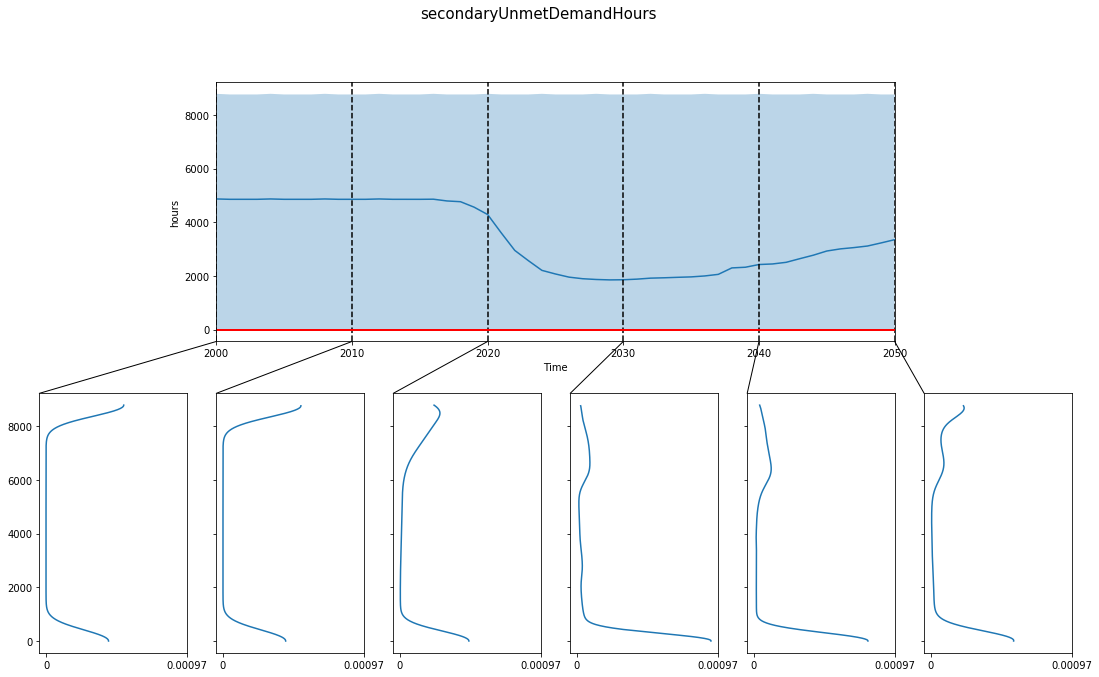

In [165]:
from EMAworkbench.ema_workbench.analysis.plotting import multiple_densities, PlotType
from EMAworkbench.ema_workbench.analysis.plotting_util import Density

fig, ax_env = multiple_densities(experiments, outcomes_filtered, outcomes_to_show = ooi,
                                 points_in_time=points_of_interest,  density = Density.KDE,
                                 grouping_specifiers=None , titles={ooi}, ylabels={ooi: "hours"}, legend=True,
                                 fill=True, plot_type=PlotType.ENVELOPE)

#Change x labels to years
ax_env[ooi]['main plot'].set_xticklabels(time[range(0,len(time),10)])
#Add BAU in the plot with a red wide line
ax_env[ooi]['main plot'].plot(outcomes_filtered[ooi][-1], 'r-',linewidth=2 )

fig[0].suptitle("{}".format(ooi), fontsize=15)
fig[0].set_size_inches(18.5, 10.5)

plt.savefig('{}/fig{}.png'.format(r'C:\\Users\\angel\\Documents\\GitHub\\gr4sp\\experiments\\notebookGr4sp\\outputs\\figs', '_envelope_density_%s'%(ooi)),
                dpi=300, bbox_inches='tight')

In [ ]:
from EMAworkbench.ema_workbench.analysis import prim
from EMAworkbench.ema_workbench.util import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO);
 
x = exp
#y = out_avg_ooi > 40000000
y = target_at_year( outcomes_filtered, ooi, 2035, 40000000, False) #False is below target

prim_alg = prim.Prim(x, y, threshold=0.3)
box1 = prim_alg.find_box()

In [ ]:
box1.inspect_tradeoff()

In [ ]:
%matplotlib inline
box_1 = box1.inspect(2)
box_1 = box1.inspect(2, style='graph')

In [ ]:
box1.select(2)
fig = box1.show_pairs_scatter(2)
plt.show()

## Unmet Demand - Secondary unmet demand (days)

In [166]:
# Subset Sool levers
selected_uncertainties = uncertainties

ooi = 'secondaryUnmetDemandDays'
data = outcomes_filtered[ooi]

num_exp = len(data)
out_avg_ooi = np.zeros(num_exp)

for i in range(num_exp):
    out_avg_ooi[i] = data[i].mean()

exp = pd.DataFrame(experiments)

exp = exp.loc[ :, selected_uncertainties] 

### Open Exploration: Visual Analysis

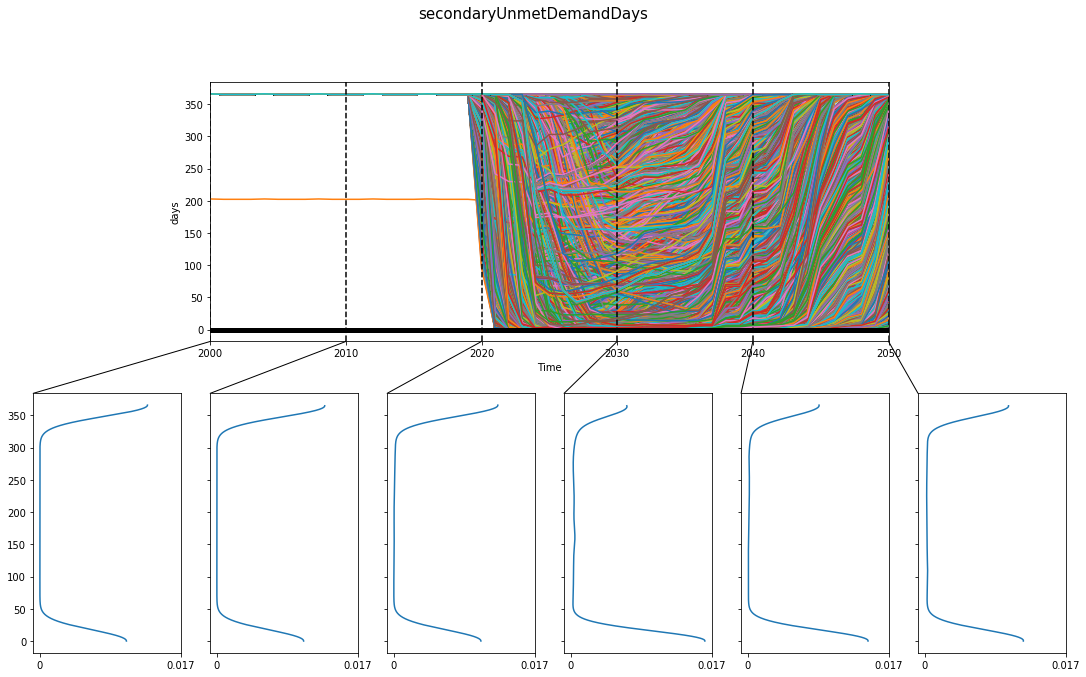

In [167]:
from EMAworkbench.ema_workbench.analysis.plotting import multiple_densities, PlotType
from EMAworkbench.ema_workbench.analysis.plotting_util import Density

fig, ax_env = multiple_densities(experiments, outcomes_filtered, outcomes_to_show = ooi,
                                 points_in_time=points_of_interest,  density = Density.KDE,
                                 grouping_specifiers=None , titles={ooi}, ylabels={ooi: "days"}, legend=True,
                                 fill=False, plot_type=PlotType.ENV_LIN)

#Change x labels to years
ax_env[ooi]['main plot'].set_xticklabels(time[range(0,len(time),10)])
#Add BAU in the plot with a black wide line
ax_env[ooi]['main plot'].plot(outcomes_filtered[ooi][-1], 'k-',linewidth=5 )

fig[0].suptitle("{}".format(ooi), fontsize=15)
fig[0].set_size_inches(18.5, 10.5)

plt.savefig('{}/fig{}.png'.format(r'C:\\Users\\angel\\Documents\\GitHub\\gr4sp\\experiments\\notebookGr4sp\\outputs\\figs', '_envelope_line_density_%s'%(ooi)),
                dpi=300, bbox_inches='tight')

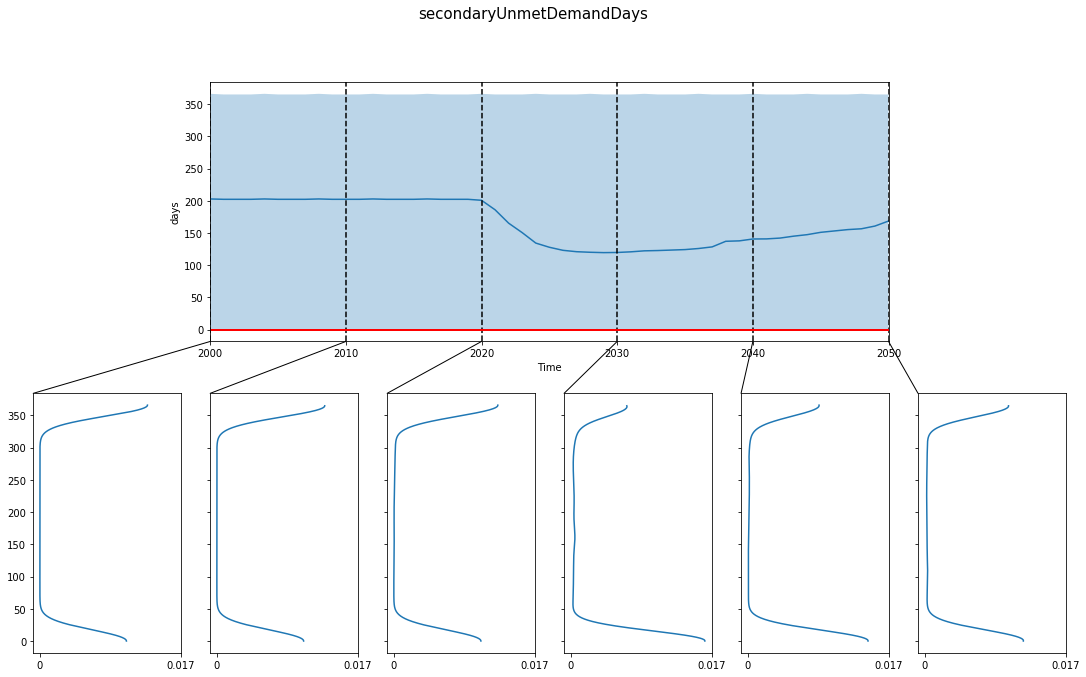

In [168]:
from EMAworkbench.ema_workbench.analysis.plotting import multiple_densities, PlotType
from EMAworkbench.ema_workbench.analysis.plotting_util import Density

fig, ax_env = multiple_densities(experiments, outcomes_filtered, outcomes_to_show = ooi,
                                 points_in_time=points_of_interest,  density = Density.KDE,
                                 grouping_specifiers=None , titles={ooi}, ylabels={ooi: "days"}, legend=True,
                                 fill=True, plot_type=PlotType.ENVELOPE)

#Change x labels to years
ax_env[ooi]['main plot'].set_xticklabels(time[range(0,len(time),10)])
#Add BAU in the plot with a red wide line
ax_env[ooi]['main plot'].plot(outcomes_filtered[ooi][-1], 'r-',linewidth=2 )

fig[0].suptitle("{}".format(ooi), fontsize=15)
fig[0].set_size_inches(18.5, 10.5)

plt.savefig('{}/fig{}.png'.format(r'C:\\Users\\angel\\Documents\\GitHub\\gr4sp\\experiments\\notebookGr4sp\\outputs\\figs', '_envelope_density_%s'%(ooi)),
                dpi=300, bbox_inches='tight')

In [ ]:
from EMAworkbench.ema_workbench.analysis import prim
from EMAworkbench.ema_workbench.util import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO);
 
x = exp
#y = out_avg_ooi > 40000000
y = target_at_year( outcomes_filtered, ooi, 2035, 40000000, False) #False is below target

prim_alg = prim.Prim(x, y, threshold=0.3)
box1 = prim_alg.find_box()

In [ ]:
box1.inspect_tradeoff()

In [ ]:
%matplotlib inline
box_1 = box1.inspect(2)
box_1 = box1.inspect(2, style='graph')

In [ ]:
box1.select(2)
fig = box1.show_pairs_scatter(2)
plt.show()

## Unmet Demand - Secondary market max unmet demand per hour

In [169]:
# Subset Sool levers
selected_uncertainties = uncertainties

ooi = 'secondaryMaxUnmetDemandMwhPerHour'
data = outcomes_filtered[ooi]

num_exp = len(data)
out_avg_ooi = np.zeros(num_exp)

for i in range(num_exp):
    out_avg_ooi[i] = data[i].mean()

exp = pd.DataFrame(experiments)

exp = exp.loc[ :, selected_uncertainties] 

### Open Exploration: Visual Analysis

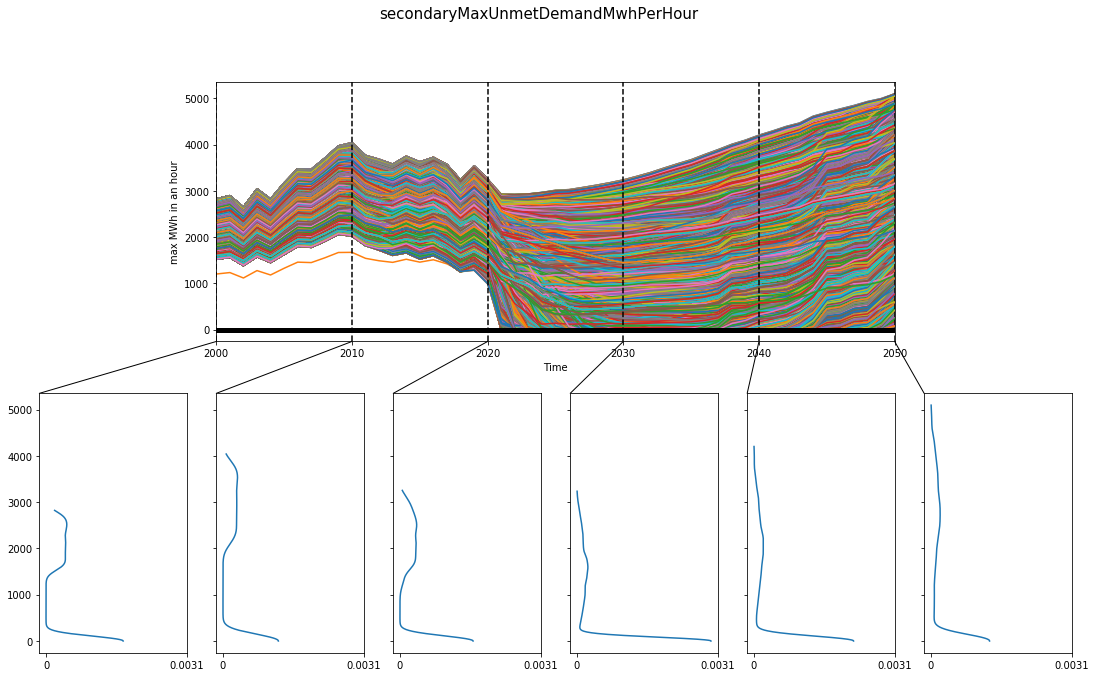

In [170]:
from EMAworkbench.ema_workbench.analysis.plotting import multiple_densities, PlotType
from EMAworkbench.ema_workbench.analysis.plotting_util import Density

fig, ax_env = multiple_densities(experiments, outcomes_filtered, outcomes_to_show = ooi,
                                 points_in_time=points_of_interest,  density = Density.KDE,
                                 grouping_specifiers=None , titles={ooi}, ylabels={ooi: "max MWh in an hour"}, legend=True,
                                 fill=False, plot_type=PlotType.ENV_LIN)

#Change x labels to years
ax_env[ooi]['main plot'].set_xticklabels(time[range(0,len(time),10)])
#Add BAU in the plot with a black wide line
ax_env[ooi]['main plot'].plot(outcomes_filtered[ooi][-1], 'k-',linewidth=5 )

fig[0].suptitle("{}".format(ooi), fontsize=15)
fig[0].set_size_inches(18.5, 10.5)

plt.savefig('{}/fig{}.png'.format(r'C:\\Users\\angel\\Documents\\GitHub\\gr4sp\\experiments\\notebookGr4sp\\outputs\\figs', '_envelope_line_density_%s'%(ooi)),
                dpi=300, bbox_inches='tight')

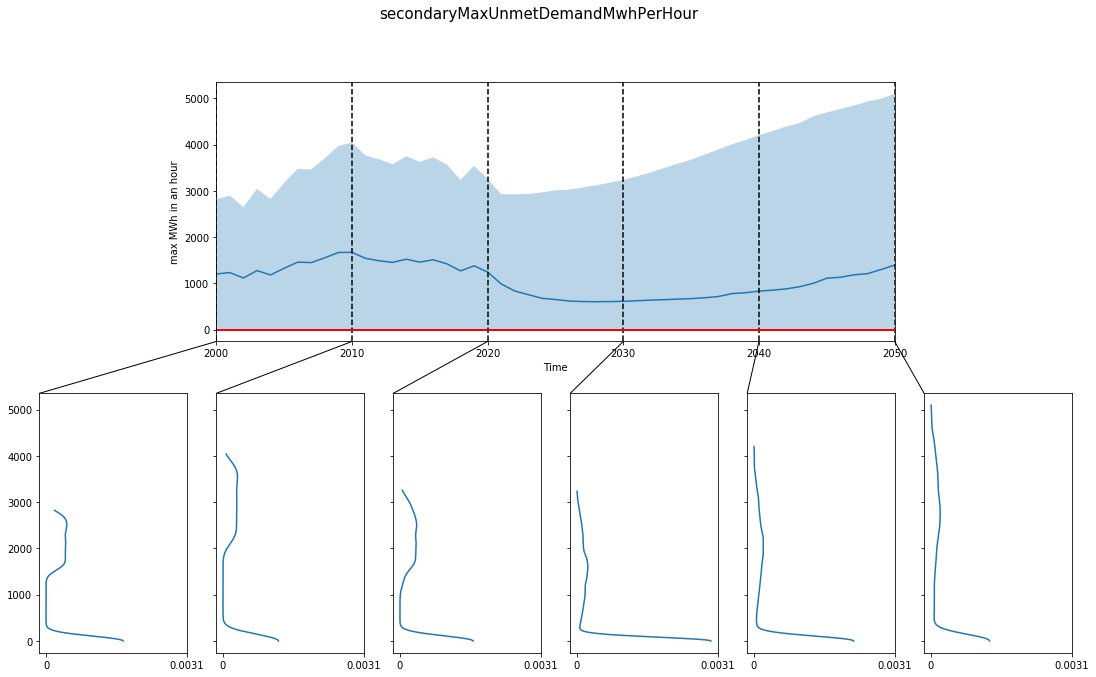

In [171]:
from EMAworkbench.ema_workbench.analysis.plotting import multiple_densities, PlotType
from EMAworkbench.ema_workbench.analysis.plotting_util import Density

fig, ax_env = multiple_densities(experiments, outcomes_filtered, outcomes_to_show = ooi,
                                 points_in_time=points_of_interest,  density = Density.KDE,
                                 grouping_specifiers=None , titles={ooi}, ylabels={ooi: "max MWh in an hour"}, legend=True,
                                 fill=True, plot_type=PlotType.ENVELOPE)

#Change x labels to years
ax_env[ooi]['main plot'].set_xticklabels(time[range(0,len(time),10)])
#Add BAU in the plot with a red wide line
ax_env[ooi]['main plot'].plot(outcomes_filtered[ooi][-1], 'r-',linewidth=2 )

fig[0].suptitle("{}".format(ooi), fontsize=15)
fig[0].set_size_inches(18.5, 10.5)

plt.savefig('{}/fig{}.png'.format(r'C:\\Users\\angel\\Documents\\GitHub\\gr4sp\\experiments\\notebookGr4sp\\outputs\\figs', '_envelope_density_%s'%(ooi)),
                dpi=300, bbox_inches='tight')

In [ ]:
from EMAworkbench.ema_workbench.analysis import prim
from EMAworkbench.ema_workbench.util import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO);
 
x = exp
#y = out_avg_ooi > 40000000
y = target_at_year( outcomes_filtered, ooi, 2035, 40000000, False) #False is below target

prim_alg = prim.Prim(x, y, threshold=0.3)
box1 = prim_alg.find_box()

In [ ]:
box1.inspect_tradeoff()

In [ ]:
%matplotlib inline
box_1 = box1.inspect(2)
box_1 = box1.inspect(2, style='graph')

In [ ]:
box1.select(2)
fig = box1.show_pairs_scatter(2)
plt.show()